<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

# Proyecto de An√°lisis de Popularidad de TED Talks
## Aplicaci√≥n de T√©cnicas de NLP y Machine Learning

### Descripci√≥n del Proyecto
Este proyecto tiene como objetivo analizar el dataset de TED Talks para determinar los factores que hacen que un video sea popular. Se aplicar√°n t√©cnicas de procesamiento de lenguaje natural (NLP), extracci√≥n de informaci√≥n y modelos de machine learning para clasificar la popularidad de las charlas.

### Objetivos Principales
- Limpiar y preparar el dataset de manera profesional
- Aplicar t√©cnicas de NLP incluyendo an√°lisis de entidades nombradas (NER)
- Entrenar m√∫ltiples modelos de machine learning
- Evaluar el rendimiento con m√©tricas como F1-score (objetivo > 78%)
- Comparar modelos y proporcionar conclusiones

### Estructura del An√°lisis
1. **Configuraci√≥n del Ambiente**
2. **Exploraci√≥n y Limpieza de Datos**
3. **Procesamiento de Lenguaje Natural**
4. **Modelado y Evaluaci√≥n**
5. **Conclusiones y Recomendaciones**

</div>

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 1. Requisitos y Dependencias del Proyecto

### Librer√≠as Principales
- **pandas**: Manipulaci√≥n y an√°lisis de datos
- **numpy**: Operaciones num√©ricas y arrays
- **scikit-learn**: Algoritmos de machine learning y m√©tricas
- **matplotlib & seaborn**: Visualizaci√≥n de datos
- **plotly**: Gr√°ficos interactivos

### Librer√≠as de NLP
- **nltk**: Natural Language Toolkit para procesamiento b√°sico de texto
- **spacy**: An√°lisis de entidades nombradas (NER) y procesamiento avanzado
- **transformers**: Modelos de Hugging Face (DistilBERT, RoBERTa)
- **torch**: Framework de deep learning para transformers
- **textblob**: An√°lisis de sentimientos y procesamiento de texto

### Librer√≠as Adicionales
- **wordcloud**: Generaci√≥n de nubes de palabras
- **datasets**: Manejo de datasets para modelos de transformers
- **accelerate**: Optimizaci√≥n para entrenamiento de modelos

</div>

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 2. Instalaci√≥n y Configuraci√≥n del Ambiente

En esta secci√≥n se instalar√°n todas las dependencias necesarias y se configurar√°n los modelos de NLP. La celda siguiente se encarga de:

1. **Instalar todas las librer√≠as requeridas**
2. **Descargar modelos de NLP necesarios** (spaCy, NLTK)
3. **Configurar el entorno de trabajo**
4. **Verificar la disponibilidad de GPU** (si est√° disponible)

### Nota Importante
Esta celda puede tardar varios minutos en ejecutarse la primera vez, ya que descarga modelos pre-entrenados. Las ejecuciones posteriores ser√°n m√°s r√°pidas gracias al sistema de cach√©.

</div>

In [1]:
# Instalaci√≥n y configuraci√≥n del ambiente
import subprocess
import sys
import os
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

def install_package(package):
    """Instala un paquete usando pip si no est√° disponible"""
    try:
        __import__(package.split('==')[0].split('[')[0])
        print(f"‚úì {package} ya est√° instalado")
    except ImportError:
        print(f"Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"‚úì {package} instalado correctamente")

# Lista de paquetes requeridos
required_packages = [
    "pandas>=1.3.0",
    "numpy>=1.21.0", 
    "scikit-learn>=1.0.0",
    "matplotlib>=3.4.0",
    "seaborn>=0.11.0",
    "plotly>=5.0.0",
    "nltk>=3.7",
    "spacy>=3.4.0",
    "transformers>=4.20.0",
    "torch>=1.12.0",
    "datasets>=2.0.0",
    "accelerate>=0.20.0",
    "textblob>=0.17.0",
    "wordcloud>=1.8.0",
    "tqdm>=4.64.0"
]

print("=== CONFIGURACI√ìN DEL AMBIENTE ===")
print("Instalando paquetes necesarios...")

# Instalar paquetes
for package in tqdm(required_packages, desc="Instalando paquetes"):
    install_package(package)

print("\n=== DESCARGANDO MODELOS DE NLP ===")

# Descargar datos de NLTK
try:
    import nltk
    nltk_data = ['punkt', 'stopwords', 'vader_lexicon', 'wordnet', 'omw-1.4']
    for data in tqdm(nltk_data, desc="Descargando datos NLTK"):
        nltk.download(data, quiet=True)
    print("‚úì Datos NLTK descargados")
except Exception as e:
    print(f"Error descargando NLTK: {e}")

# Descargar modelo de spaCy para ingl√©s
try:
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    print("‚úì Modelo spaCy en_core_web_sm descargado")
except Exception as e:
    print(f"Error descargando spaCy: {e}")

# Verificar y precargar modelos transformer
print("\n=== PRECARGANDO MODELOS TRANSFORMER ===")
try:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    
    # Lista de modelos a precargar
    transformer_models = [
        "distilbert-base-uncased",
        "roberta-base", 
        "distilbert-base-uncased-finetuned-sst-2-english"
    ]
    
    for model_name in transformer_models:
        try:
            print(f"Precargando {model_name}...")
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = AutoModelForSequenceClassification.from_pretrained(model_name)
            print(f"‚úì {model_name} descargado y cacheado")
        except Exception as e:
            print(f"‚ö† Error con {model_name}: {e}")
    
    print("‚úì Modelos transformer listos")
    
except Exception as e:
    print(f"‚ö† Error configurando transformers: {e}")

# Verificar disponibilidad de GPU
try:
    import torch
    if torch.cuda.is_available():
        print(f"‚úì GPU disponible: {torch.cuda.get_device_name(0)}")
        device = "cuda"
    else:
        print("‚úì Usando CPU (GPU no disponible)")
        device = "cpu"
except:
    device = "cpu"
    print("‚úì Usando CPU")

print("\n=== CONFIGURACI√ìN COMPLETADA ===")
print("Todas las dependencias est√°n listas para usar")
print(f"Dispositivo de c√≥mputo: {device}")
print(f"Modelos transformer disponibles en cach√©")

=== CONFIGURACI√ìN DEL AMBIENTE ===
Instalando paquetes necesarios...


Instalando paquetes:   0%|          | 0/15 [00:00<?, ?it/s]

Instalando pandas>=1.3.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì pandas>=1.3.0 instalado correctamente
Instalando numpy>=1.21.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì numpy>=1.21.0 instalado correctamente
Instalando scikit-learn>=1.0.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì scikit-learn>=1.0.0 instalado correctamente
Instalando matplotlib>=3.4.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì matplotlib>=3.4.0 instalado correctamente
Instalando seaborn>=0.11.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì seaborn>=0.11.0 instalado correctamente
Instalando plotly>=5.0.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì plotly>=5.0.0 instalado correctamente
Instalando nltk>=3.7...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì nltk>=3.7 instalado correctamente
Instalando spacy>=3.4.0...
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.8.2 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 2.2.6 which is incompatible.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.2.6 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì spacy>=3.4.0 instalado correctamente
Instalando transformers>=4.20.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì transformers>=4.20.0 instalado correctamente
Instalando torch>=1.12.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì torch>=1.12.0 instalado correctamente
Instalando datasets>=2.0.0...
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì datasets>=2.0.0 instalado correctamente
Instalando accelerate>=0.20.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì accelerate>=0.20.0 instalado correctamente
Instalando textblob>=0.17.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì textblob>=0.17.0 instalado correctamente
Instalando wordcloud>=1.8.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì wordcloud>=1.8.0 instalado correctamente
Instalando tqdm>=4.64.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úì tqdm>=4.64.0 instalado correctamente

=== DESCARGANDO MODELOS DE NLP ===


Descargando datos NLTK:   0%|          | 0/5 [00:00<?, ?it/s]

‚úì Datos NLTK descargados
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 119.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚úì Modelo spaCy en_core_web_sm descargado

=== PRECARGANDO MODELOS TRANSFORMER ===
Precargando distilbert-base-uncased...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


‚úì distilbert-base-uncased descargado y cacheado
Precargando roberta-base...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


‚úì roberta-base descargado y cacheado
Precargando distilbert-base-uncased-finetuned-sst-2-english...
‚úì distilbert-base-uncased-finetuned-sst-2-english descargado y cacheado
‚úì Modelos transformer listos
‚úì GPU disponible: Tesla T4

=== CONFIGURACI√ìN COMPLETADA ===
Todas las dependencias est√°n listas para usar
Dispositivo de c√≥mputo: cuda
Modelos transformer disponibles en cach√©


<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 3. Importaci√≥n de Librer√≠as

En esta secci√≥n se importan todas las librer√≠as necesarias para el an√°lisis. Se organizan por categor√≠as para mejor comprensi√≥n:

### Categor√≠as de Librer√≠as:
- **Manipulaci√≥n de datos**: pandas, numpy
- **Visualizaci√≥n**: matplotlib, seaborn, plotly, wordcloud
- **Machine Learning**: scikit-learn, transformers, torch
- **NLP**: nltk, spacy, textblob
- **Utilidades**: os, re, json, warnings, tqdm

</div>

In [2]:
# === IMPORTACI√ìN DE LIBRER√çAS ===

# Manipulaci√≥n de datos
import pandas as pd
import numpy as np
import json
import re
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, 
                           f1_score, accuracy_score, precision_score, 
                           recall_score, roc_auc_score, roc_curve)

# NLP b√°sico
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# spaCy
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    print("‚úì spaCy cargado correctamente")
except Exception as e:
    print(f"‚ö† Error cargando spaCy: {e}")
    nlp = None

# Hugging Face Transformers
try:
    from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                             Trainer, TrainingArguments, DataCollatorWithPadding,
                             pipeline)
    from datasets import Dataset
    import torch
    print("‚úì Transformers importados correctamente")
    
    # Verificar dispositivo
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"‚úì Dispositivo: {device}")
    
except Exception as e:
    print(f"‚ö† Error importando transformers: {e}")

# Utilidades
from tqdm.auto import tqdm
import time
from datetime import datetime

# Configuraci√≥n de estilo para gr√°ficos
plt.style.use('default')
sns.set_palette("husl")

# Configuraci√≥n de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("‚úì Librer√≠as principales importadas")

# Configurar stop words
try:
    stop_words = set(stopwords.words('english'))
    print("‚úì Stop words de NLTK configuradas")
except:
    print("‚ö† Error configurando stop words. Verifica la instalaci√≥n de NLTK.")
    stop_words = set()

# Verificar versiones importantes
try:
    import sklearn
    import transformers
    print(f"‚úì Pandas version: {pd.__version__}")
    print(f"‚úì Scikit-learn version: {sklearn.__version__}")
    print(f"‚úì Transformers version: {transformers.__version__}")
    print(f"‚úì Torch version: {torch.__version__}")
except Exception as e:
    print(f"‚ö† Error verificando versiones: {e}")

print("\n‚úì TODAS LAS LIBRER√çAS LISTAS PARA USAR")

‚úì spaCy cargado correctamente
‚úì Transformers importados correctamente
‚úì Dispositivo: cuda
‚úì Librer√≠as principales importadas
‚úì Stop words de NLTK configuradas
‚úì Pandas version: 2.1.4
‚úì Scikit-learn version: 1.3.2
‚úì Transformers version: 4.54.1
‚úì Torch version: 2.7.1+cu128

‚úì TODAS LAS LIBRER√çAS LISTAS PARA USAR


In [3]:
# === DESCARGA Y VERIFICACI√ìN DE MODELOS TRANSFORMER ===

def download_and_verify_transformers():
    """
    Descarga y verifica que los modelos transformer est√©n disponibles
    """
    print("=== DESCARGANDO MODELOS TRANSFORMER ===")
    
    # Modelos que vamos a usar
    models_to_download = {
        "distilbert-base-uncased": "DistilBERT para clasificaci√≥n general",
        "roberta-base": "RoBERTa para mejor rendimiento",
        "distilbert-base-uncased-finetuned-sst-2-english": "DistilBERT para an√°lisis de sentimientos"
    }
    
    downloaded_models = {}
    
    for model_name, description in models_to_download.items():
        print(f"\nDescargando {model_name}...")
        print(f"Descripci√≥n: {description}")
        
        try:
            # Descargar tokenizer y modelo
            print("  - Descargando tokenizer...")
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            
            print("  - Descargando modelo...")
            model = AutoModelForSequenceClassification.from_pretrained(model_name)
            
            # Verificar que funciona
            print("  - Verificando funcionamiento...")
            test_text = "This is a test sentence."
            inputs = tokenizer(test_text, return_tensors="pt", truncation=True, padding=True)
            
            with torch.no_grad():
                outputs = model(**inputs)
            
            downloaded_models[model_name] = {
                'tokenizer': tokenizer,
                'model': model,
                'status': 'success'
            }
            
            print(f"  ‚úì {model_name} descargado y verificado correctamente")
            
        except Exception as e:
            print(f"  ‚ö† Error con {model_name}: {e}")
            downloaded_models[model_name] = {
                'status': 'error',
                'error': str(e)
            }
    
    # Resumen
    successful_downloads = sum(1 for model_info in downloaded_models.values() 
                              if model_info['status'] == 'success')
    
    print(f"\n=== RESUMEN DE DESCARGA ===")
    print(f"Modelos descargados exitosamente: {successful_downloads}/{len(models_to_download)}")
    
    for model_name, model_info in downloaded_models.items():
        status_icon = "‚úì" if model_info['status'] == 'success' else "‚úó"
        print(f"  {status_icon} {model_name}")
    
    if successful_downloads > 0:
        print(f"\n‚úì Al menos {successful_downloads} modelo(s) transformer disponible(s)")
        
        # Crear pipeline de ejemplo
        if 'distilbert-base-uncased-finetuned-sst-2-english' in downloaded_models:
            if downloaded_models['distilbert-base-uncased-finetuned-sst-2-english']['status'] == 'success':
                print("\nCreando pipeline de an√°lisis de sentimientos...")
                try:
                    sentiment_pipeline = pipeline(
                        "sentiment-analysis",
                        model="distilbert-base-uncased-finetuned-sst-2-english",
                        return_all_scores=True
                    )
                    
                    # Prueba r√°pida
                    test_result = sentiment_pipeline("I love this amazing project!")
                    print(f"‚úì Pipeline funcionando: {test_result}")
                    
                    return downloaded_models, sentiment_pipeline
                    
                except Exception as e:
                    print(f"‚ö† Error creando pipeline: {e}")
    
    return downloaded_models, None

# Ejecutar descarga
transformer_models, sentiment_pipeline = download_and_verify_transformers()

# Mostrar informaci√≥n del dispositivo
print(f"\n=== INFORMACI√ìN DEL DISPOSITIVO ===")
if 'torch' in globals():
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA disponible: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"GPU: {torch.cuda.get_device_name(0)}")
        print(f"Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    else:
        print("Usando CPU para modelos transformer")

print(f"\n‚úì Modelos transformer listos para usar")

=== DESCARGANDO MODELOS TRANSFORMER ===

Descargando distilbert-base-uncased...
Descripci√≥n: DistilBERT para clasificaci√≥n general
  - Descargando tokenizer...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  - Descargando modelo...
  - Verificando funcionamiento...
  ‚úì distilbert-base-uncased descargado y verificado correctamente

Descargando roberta-base...
Descripci√≥n: RoBERTa para mejor rendimiento
  - Descargando tokenizer...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  - Descargando modelo...
  - Verificando funcionamiento...
  ‚úì roberta-base descargado y verificado correctamente

Descargando distilbert-base-uncased-finetuned-sst-2-english...
Descripci√≥n: DistilBERT para an√°lisis de sentimientos
  - Descargando tokenizer...
  - Descargando modelo...
  - Verificando funcionamiento...


Device set to use cuda:0


  ‚úì distilbert-base-uncased-finetuned-sst-2-english descargado y verificado correctamente

=== RESUMEN DE DESCARGA ===
Modelos descargados exitosamente: 3/3
  ‚úì distilbert-base-uncased
  ‚úì roberta-base
  ‚úì distilbert-base-uncased-finetuned-sst-2-english

‚úì Al menos 3 modelo(s) transformer disponible(s)

Creando pipeline de an√°lisis de sentimientos...
‚úì Pipeline funcionando: [[{'label': 'NEGATIVE', 'score': 0.0001114856349886395}, {'label': 'POSITIVE', 'score': 0.99988853931427}]]

=== INFORMACI√ìN DEL DISPOSITIVO ===
PyTorch version: 2.7.1+cu128
CUDA disponible: True
GPU: Tesla T4
Memoria GPU: 14.7 GB

‚úì Modelos transformer listos para usar


In [4]:
# === CARGA Y EXPLORACI√ìN INICIAL DEL DATASET ===

print("=== CARGANDO DATASET TED TALKS ===")

# Cargar el dataset
data_path = "ted_talks_en.csv"
try:
    df = pd.read_csv(data_path)
    print(f"‚úì Dataset cargado exitosamente")
    print(f"‚úì Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
except FileNotFoundError:
    print("‚ö† Error: No se encontr√≥ el archivo 'ted_talks_en.csv'")
    print("Aseg√∫rate de que el archivo est√© en el directorio correcto")
    raise
except Exception as e:
    print(f"‚ö† Error cargando el dataset: {e}")
    raise

print("\n=== INFORMACI√ìN B√ÅSICA DEL DATASET ===")

# Informaci√≥n general
print("Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTipos de datos:")
print(df.dtypes)

print(f"\nPrimeras 5 filas:")
display(df.head())

print(f"\nInformaci√≥n de memoria y valores nulos:")
print(df.info())

print(f"\nEstad√≠sticas descriptivas:")
display(df.describe())

# Verificar valores nulos
print(f"\nValores nulos por columna:")
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_info = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje': null_percentage.round(2)
})
display(null_info[null_info['Valores Nulos'] > 0])

print(f"\n=== AN√ÅLISIS DE LA COLUMNA 'VIEWS' (TARGET) ===")
if 'views' in df.columns:
    print(f"Estad√≠sticas de views:")
    print(f"- M√≠nimo: {df['views'].min():,}")
    print(f"- M√°ximo: {df['views'].max():,}")
    print(f"- Media: {df['views'].mean():,.0f}")
    print(f"- Mediana: {df['views'].median():,.0f}")
    print(f"- Desviaci√≥n est√°ndar: {df['views'].std():,.0f}")
else:
    print("‚ö† Columna 'views' no encontrada en el dataset")

=== CARGANDO DATASET TED TALKS ===


‚úì Dataset cargado exitosamente
‚úì Dimensiones: 4005 filas x 19 columnas

=== INFORMACI√ìN B√ÅSICA DEL DATASET ===
Columnas disponibles:
 1. talk_id
 2. title
 3. speaker_1
 4. all_speakers
 5. occupations
 6. about_speakers
 7. views
 8. recorded_date
 9. published_date
10. event
11. native_lang
12. available_lang
13. comments
14. duration
15. topics
16. related_talks
17. url
18. description
19. transcript

Tipos de datos:
talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

Primeras 5 filas:


talk_id                            title         speaker_1  \
0        1      Averting the climate crisis           Al Gore   
1       92  The best stats you've ever seen      Hans Rosling   
2        7                 Simplicity sells       David Pogue   
3       53              Greening the ghetto     Majora Carter   
4       66      Do schools kill creativity?  Sir Ken Robinson   

              all_speakers                                    occupations  \
0           {0: 'Al Gore'}                      {0: ['climate advocate']}   
1      {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2       {0: 'David Pogue'}                  {0: ['technology columnist']}   
3     {0: 'Majora Carter'}    {0: ['activist for environmental justice']}   
4  {0: 'Sir Ken Robinson'}                    {0: ['author', 'educator']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world‚Äô...   3523392    2006-02-25   
1  {0: 'In Hans Rosling‚Äôs hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   
3  {0: 'Majora Carter redefined the field of envi...   2664069    2006-02-26   
4  {0: "Creativity expert Sir Ken Robinson challe...  65051954    2006-02-25   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   
3     2006-06-27  TED2006          en   
4     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0       977   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0      1190   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0      1286   
3  ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...     219.0      1116   
4  ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...    4931.0      1164   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['children', 'creativity', 'culture', 'dance',...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   
3  {1041: '3 stories of local eco-entrepreneurshi...   
4  {865: 'Bring on the learning revolution!', 173...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   
3  https://www.ted.com/talks/majora_carter_greeni...   
4  https://www.ted.com/talks/sir_ken_robinson_do_...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   
3  In an emotionally charged talk, MacArthur-winn...   
4  Sir Ken Robinson makes an entertaining and pro...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...  
2  (Music: "The Sound of Silence," Simon & Garfun...  
3  If you're here today ‚Äî and I'm very happy that...  
4  Good morning. How are you? (Audience) Good. It...


Informaci√≥n de memoria y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   obje

talk_id         views     comments     duration
count   4005.000000  4.005000e+03  3350.000000  4005.000000
mean   12432.538327  2.148006e+06   161.997015   724.011236
std    17447.576262  3.451226e+06   268.838922   361.775462
min        1.000000  0.000000e+00     0.000000    60.000000
25%     1252.000000  8.820690e+05    38.000000   393.000000
50%     2333.000000  1.375508e+06    89.000000   738.000000
75%    23777.000000  2.133110e+06   188.000000   974.000000
max    62794.000000  6.505195e+07  6449.000000  3922.000000


Valores nulos por columna:


Valores Nulos  Porcentaje
all_speakers                4        0.10
occupations               522       13.03
about_speakers            503       12.56
recorded_date               1        0.02
comments                  655       16.35


=== AN√ÅLISIS DE LA COLUMNA 'VIEWS' (TARGET) ===
Estad√≠sticas de views:
- M√≠nimo: 0
- M√°ximo: 65,051,954
- Media: 2,148,006
- Mediana: 1,375,508
- Desviaci√≥n est√°ndar: 3,451,226


<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 4. Limpieza Profesional de Datos

Esta secci√≥n implementa un pipeline de limpieza de datos siguiendo est√°ndares profesionales similares a los utilizados en empresas como Amazon. El proceso incluye:

### 4.1 Eliminaci√≥n de Valores At√≠picos usando IQR
- **M√©todo IQR (Interquartile Range)**: Identifica y elimina outliers en la columna 'views'
- **Criterio**: Valores fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
- **Justificaci√≥n**: Los valores extremos pueden sesgar los modelos de machine learning

### 4.2 Limpieza de Datos Textuales
- **Normalizaci√≥n de texto**: Conversi√≥n a min√∫sculas, eliminaci√≥n de caracteres especiales
- **Tratamiento de valores nulos**: Estrategias espec√≠ficas por columna
- **Validaci√≥n de datos**: Verificaci√≥n de consistencia y formato

### 4.3 Clasificaci√≥n de Popularidad
Se crear√°n 5 categor√≠as de popularidad basadas en los views:
- **Bajo**: 0-20% percentil
- **Medio Bajo**: 20-40% percentil  
- **Medio**: 40-60% percentil
- **Medio Alto**: 60-80% percentil
- **Alto**: 80-100% percentil

</div>

In [5]:
# === LIMPIEZA PROFESIONAL DE DATOS ===

def clean_dataset_professional(df):
    """
    Pipeline de limpieza profesional siguiendo est√°ndares de la industria
    """
    df_clean = df.copy()
    cleaning_log = []
    
    print("=== INICIANDO PIPELINE DE LIMPIEZA ===")
    print(f"Dataset original: {df_clean.shape[0]} filas x {df_clean.shape[1]} columnas")
    
    # 1. ELIMINACI√ìN DE VALORES AT√çPICOS USANDO IQR
    print("\n1. ELIMINACI√ìN DE OUTLIERS EN 'VIEWS' USANDO M√âTODO IQR")
    
    if 'views' in df_clean.columns:
        views_original = df_clean['views'].copy()
        
        # Calcular IQR
        Q1 = df_clean['views'].quantile(0.25)
        Q3 = df_clean['views'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir l√≠mites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        print(f"   - Q1 (25%): {Q1:,.0f}")
        print(f"   - Q3 (75%): {Q3:,.0f}")
        print(f"   - IQR: {IQR:,.0f}")
        print(f"   - L√≠mite inferior: {lower_bound:,.0f}")
        print(f"   - L√≠mite superior: {upper_bound:,.0f}")
        
        # Identificar outliers
        outliers_mask = (df_clean['views'] < lower_bound) | (df_clean['views'] > upper_bound)
        outliers_count = outliers_mask.sum()
        
        print(f"   - Outliers identificados: {outliers_count} ({(outliers_count/len(df_clean)*100):.2f}%)")
        
        # Eliminar outliers
        df_clean = df_clean[~outliers_mask].reset_index(drop=True)
        cleaning_log.append(f"Eliminados {outliers_count} outliers en 'views'")
        
        print(f"   ‚úì Dataset despu√©s de eliminar outliers: {df_clean.shape[0]} filas")
    
    # 2. LIMPIEZA DE DATOS TEXTUALES
    print("\n2. LIMPIEZA DE DATOS TEXTUALES")
    
    text_columns = ['title', 'description', 'transcript', 'speaker', 'main_speaker']
    
    for col in text_columns:
        if col in df_clean.columns:
            print(f"   Procesando columna: {col}")
            
            # Convertir a string y manejar nulos
            df_clean[col] = df_clean[col].astype(str)
            df_clean[col] = df_clean[col].replace('nan', '')
            
            # Limpiar texto
            df_clean[f'{col}_clean'] = df_clean[col].apply(clean_text)
            
            # Estad√≠sticas
            null_count = df_clean[col].isin(['', 'nan', None]).sum()
            avg_length = df_clean[f'{col}_clean'].str.len().mean()
            
            print(f"     - Valores vac√≠os: {null_count}")
            print(f"     - Longitud promedio: {avg_length:.1f} caracteres")
            
            cleaning_log.append(f"Limpiado columna {col}: {null_count} valores vac√≠os")
    
    # 3. CREACI√ìN DE CATEGOR√çAS DE POPULARIDAD
    print("\n3. CLASIFICACI√ìN DE POPULARIDAD")
    
    if 'views' in df_clean.columns:
        # Calcular percentiles
        percentiles = [0, 20, 40, 60, 80, 100]
        thresholds = [df_clean['views'].quantile(p/100) for p in percentiles]
        
        print("   Umbrales de popularidad:")
        categories = ['Bajo', 'Medio Bajo', 'Medio', 'Medio Alto', 'Alto']
        
        for i, (cat, threshold) in enumerate(zip(categories, thresholds[1:])):
            print(f"     - {cat}: hasta {threshold:,.0f} views")
        
        # Crear categor√≠as
        df_clean['popularity_category'] = pd.cut(
            df_clean['views'], 
            bins=thresholds, 
            labels=categories,
            include_lowest=True
        )
        
        # Crear variable num√©rica para modelado
        label_encoder = LabelEncoder()
        df_clean['popularity_numeric'] = label_encoder.fit_transform(df_clean['popularity_category'])
        
        # Mostrar distribuci√≥n
        distribution = df_clean['popularity_category'].value_counts().sort_index()
        print("\n   Distribuci√≥n de categor√≠as:")
        for cat, count in distribution.items():
            percentage = (count / len(df_clean)) * 100
            print(f"     - {cat}: {count} ({percentage:.1f}%)")
        
        cleaning_log.append("Creadas categor√≠as de popularidad")
    
    # 4. VALIDACI√ìN FINAL
    print("\n4. VALIDACI√ìN DEL DATASET LIMPIO")
    
    print(f"   - Dimensiones finales: {df_clean.shape[0]} filas x {df_clean.shape[1]} columnas")
    print(f"   - Filas eliminadas: {len(df) - len(df_clean)} ({((len(df) - len(df_clean))/len(df)*100):.2f}%)")
    
    # Verificar calidad de datos
    quality_score = calculate_data_quality(df_clean)
    print(f"   - Puntuaci√≥n de calidad: {quality_score:.2f}/10")
    
    print("\n‚úì PIPELINE DE LIMPIEZA COMPLETADO")
    
    return df_clean, cleaning_log

def clean_text(text):
    """Funci√≥n para limpiar texto"""
    if pd.isna(text) or text == '' or text == 'nan':
        return ''
    
    text = str(text).lower()
    # Eliminar caracteres especiales pero mantener espacios y puntuaci√≥n b√°sica
    text = re.sub(r'[^\w\s\.\,\!\?\-]', ' ', text)
    # Eliminar espacios m√∫ltiples
    text = re.sub(r'\s+', ' ', text)
    # Eliminar espacios al inicio y final
    text = text.strip()
    
    return text

def calculate_data_quality(df):
    """Calcula una puntuaci√≥n de calidad de datos"""
    score = 0
    
    # Porcentaje de valores no nulos (peso: 3)
    non_null_percentage = (1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 3
    score += non_null_percentage
    
    # Diversidad en columnas categ√≥ricas (peso: 2)
    if 'popularity_category' in df.columns:
        category_balance = 1 - df['popularity_category'].value_counts().std() / df['popularity_category'].value_counts().mean()
        score += category_balance * 2
    
    # Consistencia en datos num√©ricos (peso: 2)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    if len(numeric_columns) > 0:
        consistency_score = 1 - df[numeric_columns].isnull().sum().sum() / (df.shape[0] * len(numeric_columns))
        score += consistency_score * 2
    
    # Longitud promedio de texto (peso: 1)
    text_columns = [col for col in df.columns if 'clean' in col]
    if text_columns:
        avg_text_length = df[text_columns[0]].str.len().mean()
        text_score = min(avg_text_length / 100, 1)  # Normalizar a [0,1]
        score += text_score
    
    # Variabilidad en views (peso: 2)
    if 'views' in df.columns:
        cv = df['views'].std() / df['views'].mean()  # Coeficiente de variaci√≥n
        variability_score = min(cv / 2, 1)  # Normalizar
        score += variability_score * 2
    
    return min(score, 10)  # M√°ximo 10

# Ejecutar limpieza
df_clean, cleaning_log = clean_dataset_professional(df)

# Mostrar log de limpieza
print("\n=== RESUMEN DE LIMPIEZA ===")
for i, log in enumerate(cleaning_log, 1):
    print(f"{i}. {log}")

# Guardar dataset limpio (opcional)
# df_clean.to_csv('ted_talks_clean.csv', index=False)
# print("\n‚úì Dataset limpio guardado como 'ted_talks_clean.csv'")

=== INICIANDO PIPELINE DE LIMPIEZA ===
Dataset original: 4005 filas x 19 columnas

1. ELIMINACI√ìN DE OUTLIERS EN 'VIEWS' USANDO M√âTODO IQR
   - Q1 (25%): 882,069
   - Q3 (75%): 2,133,110
   - IQR: 1,251,041
   - L√≠mite inferior: -994,492
   - L√≠mite superior: 4,009,672
   - Outliers identificados: 393 (9.81%)
   ‚úì Dataset despu√©s de eliminar outliers: 3612 filas

2. LIMPIEZA DE DATOS TEXTUALES
   Procesando columna: title


     - Valores vac√≠os: 0
     - Longitud promedio: 38.4 caracteres
   Procesando columna: description
     - Valores vac√≠os: 0
     - Longitud promedio: 352.8 caracteres
   Procesando columna: transcript
     - Valores vac√≠os: 0
     - Longitud promedio: 9870.6 caracteres

3. CLASIFICACI√ìN DE POPULARIDAD
   Umbrales de popularidad:
     - Bajo: hasta 695,206 views
     - Medio Bajo: hasta 1,111,279 views
     - Medio: hasta 1,470,199 views
     - Medio Alto: hasta 1,994,938 views
     - Alto: hasta 4,006,448 views

   Distribuci√≥n de categor√≠as:
     - Bajo: 723 (20.0%)
     - Medio Bajo: 722 (20.0%)
     - Medio: 722 (20.0%)
     - Medio Alto: 722 (20.0%)
     - Alto: 723 (20.0%)

4. VALIDACI√ìN DEL DATASET LIMPIO
   - Dimensiones finales: 3612 filas x 24 columnas
   - Filas eliminadas: 393 (9.81%)
   - Puntuaci√≥n de calidad: 7.85/10

‚úì PIPELINE DE LIMPIEZA COMPLETADO

=== RESUMEN DE LIMPIEZA ===
1. Eliminados 393 outliers en 'views'
2. Limpiado columna title: 0 valores vac√≠

=== GENERANDO VISUALIZACIONES DEL DATASET LIMPIO ===


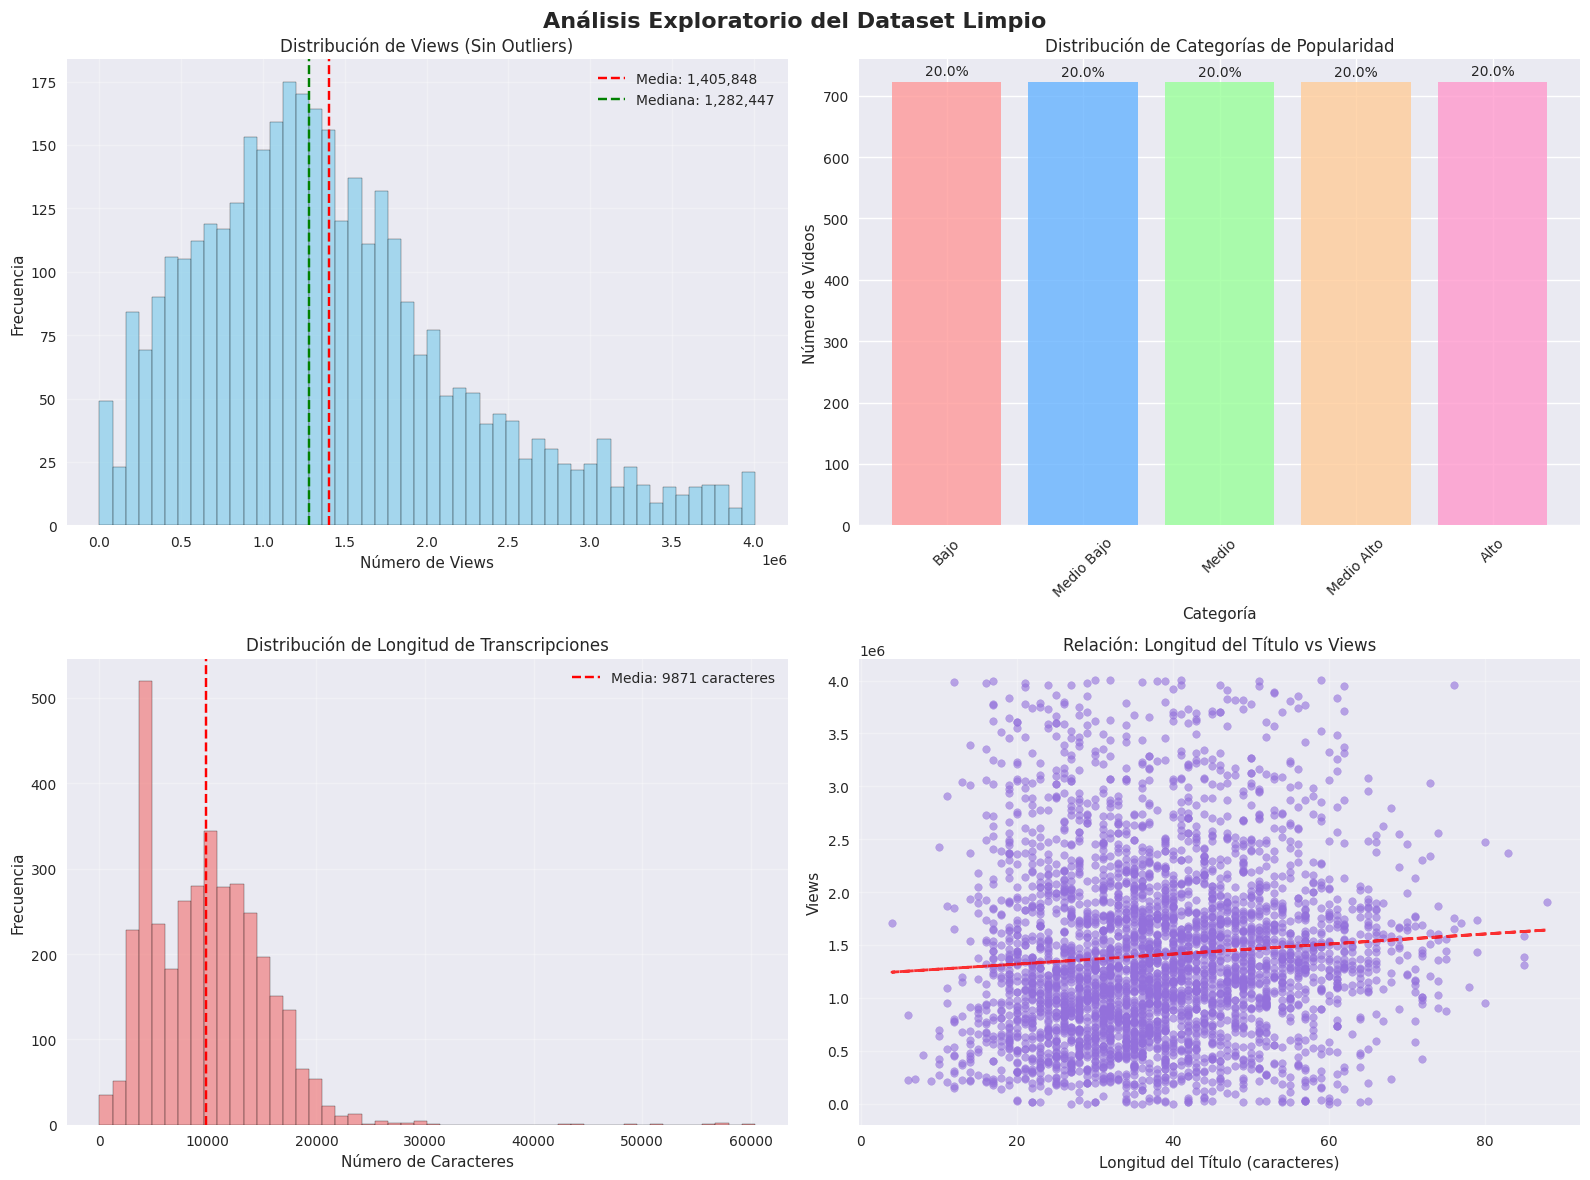


=== ESTAD√çSTICAS DEL DATASET LIMPIO ===
Total de videos: 3,612
Promedio de views: 1,405,848
Mediana de views: 1,282,447
Desviaci√≥n est√°ndar: 826,167
Longitud promedio de transcripci√≥n: 9871 caracteres
Longitud promedio de t√≠tulo: 38.4 caracteres

=== CORRELACIONES RELEVANTES ===
                   views  transcript_length  title_length
views              1.000              0.067         0.076
transcript_length  0.067              1.000         0.014
title_length       0.076              0.014         1.000


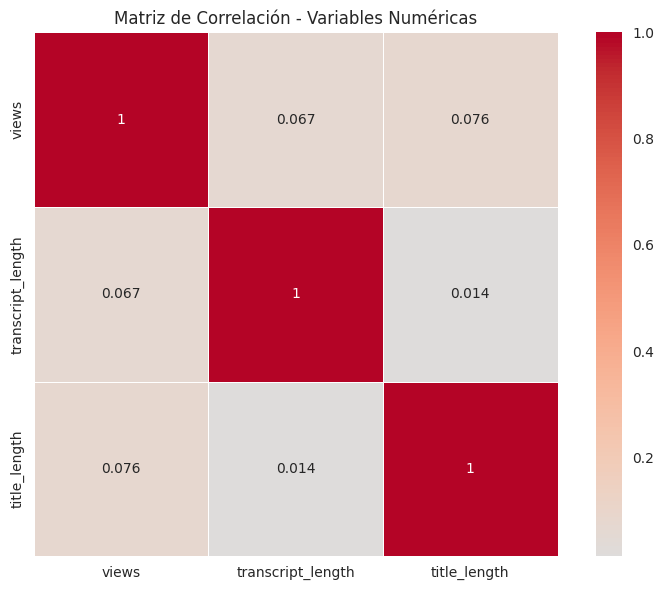


‚úì An√°lisis exploratorio completado


In [6]:
# === VISUALIZACI√ìN DE DATOS DESPU√âS DE LA LIMPIEZA ===

print("=== GENERANDO VISUALIZACIONES DEL DATASET LIMPIO ===")

# Configurar el estilo de los gr√°ficos
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('An√°lisis Exploratorio del Dataset Limpio', fontsize=16, fontweight='bold')

# 1. Distribuci√≥n de Views (despu√©s de eliminar outliers)
axes[0, 0].hist(df_clean['views'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribuci√≥n de Views (Sin Outliers)')
axes[0, 0].set_xlabel('N√∫mero de Views')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# A√±adir estad√≠sticas al gr√°fico
mean_views = df_clean['views'].mean()
median_views = df_clean['views'].median()
axes[0, 0].axvline(mean_views, color='red', linestyle='--', label=f'Media: {mean_views:,.0f}')
axes[0, 0].axvline(median_views, color='green', linestyle='--', label=f'Mediana: {median_views:,.0f}')
axes[0, 0].legend()

# 2. Distribuci√≥n de Categor√≠as de Popularidad
if 'popularity_category' in df_clean.columns:
    category_counts = df_clean['popularity_category'].value_counts().sort_index()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
    
    bars = axes[0, 1].bar(category_counts.index, category_counts.values, color=colors, alpha=0.8)
    axes[0, 1].set_title('Distribuci√≥n de Categor√≠as de Popularidad')
    axes[0, 1].set_xlabel('Categor√≠a')
    axes[0, 1].set_ylabel('N√∫mero de Videos')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # A√±adir porcentajes en las barras
    for bar, count in zip(bars, category_counts.values):
        height = bar.get_height()
        percentage = (count / len(df_clean)) * 100
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                       f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# 3. Longitud de Transcripciones
if 'transcript_clean' in df_clean.columns:
    transcript_lengths = df_clean['transcript_clean'].str.len()
    axes[1, 0].hist(transcript_lengths, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, 0].set_title('Distribuci√≥n de Longitud de Transcripciones')
    axes[1, 0].set_xlabel('N√∫mero de Caracteres')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Estad√≠sticas
    mean_length = transcript_lengths.mean()
    axes[1, 0].axvline(mean_length, color='red', linestyle='--', 
                      label=f'Media: {mean_length:.0f} caracteres')
    axes[1, 0].legend()

# 4. Relaci√≥n Views vs Longitud de T√≠tulo
if 'title_clean' in df_clean.columns:
    title_lengths = df_clean['title_clean'].str.len()
    scatter = axes[1, 1].scatter(title_lengths, df_clean['views'], alpha=0.6, 
                                color='mediumpurple', s=30)
    axes[1, 1].set_title('Relaci√≥n: Longitud del T√≠tulo vs Views')
    axes[1, 1].set_xlabel('Longitud del T√≠tulo (caracteres)')
    axes[1, 1].set_ylabel('Views')
    axes[1, 1].grid(True, alpha=0.3)
    
    # L√≠nea de tendencia
    z = np.polyfit(title_lengths, df_clean['views'], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(title_lengths, p(title_lengths), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Estad√≠sticas resumidas
print("\n=== ESTAD√çSTICAS DEL DATASET LIMPIO ===")
print(f"Total de videos: {len(df_clean):,}")
print(f"Promedio de views: {df_clean['views'].mean():,.0f}")
print(f"Mediana de views: {df_clean['views'].median():,.0f}")
print(f"Desviaci√≥n est√°ndar: {df_clean['views'].std():,.0f}")

if 'transcript_clean' in df_clean.columns:
    avg_transcript_length = df_clean['transcript_clean'].str.len().mean()
    print(f"Longitud promedio de transcripci√≥n: {avg_transcript_length:.0f} caracteres")

if 'title_clean' in df_clean.columns:
    avg_title_length = df_clean['title_clean'].str.len().mean()
    print(f"Longitud promedio de t√≠tulo: {avg_title_length:.1f} caracteres")

# Correlaciones importantes
print("\n=== CORRELACIONES RELEVANTES ===")
numeric_columns = ['views']
if 'transcript_clean' in df_clean.columns:
    df_clean['transcript_length'] = df_clean['transcript_clean'].str.len()
    numeric_columns.append('transcript_length')
if 'title_clean' in df_clean.columns:
    df_clean['title_length'] = df_clean['title_clean'].str.len()
    numeric_columns.append('title_length')

if len(numeric_columns) > 1:
    correlation_matrix = df_clean[numeric_columns].corr()
    print(correlation_matrix.round(3))
    
    # Visualizar matriz de correlaci√≥n
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Matriz de Correlaci√≥n - Variables Num√©ricas')
    plt.tight_layout()
    plt.show()

print("\n‚úì An√°lisis exploratorio completado")

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 5. Procesamiento de Lenguaje Natural (NLP)

Esta secci√≥n implementa t√©cnicas avanzadas de NLP para extraer caracter√≠sticas relevantes del texto que puedan influir en la popularidad de los TED Talks.

### 5.1 An√°lisis de Entidades Nombradas (NER)
- **T√©cnica**: Reconocimiento de entidades con spaCy
- **Objetivo**: Identificar personas, organizaciones, ubicaciones, etc.
- **Hip√≥tesis**: Charlas que mencionan entidades famosas pueden ser m√°s populares

### 5.2 An√°lisis de Sentimientos
- **T√©cnica**: TextBlob para polaridad y subjetividad
- **Objetivo**: Medir el tono emocional de las transcripciones
- **Hip√≥tesis**: Charlas con sentimientos positivos pueden atraer m√°s views

### 5.3 Extracci√≥n de Caracter√≠sticas Textuales
- **N-gramas**: An√°lisis de unigramas, bigramas y trigramas m√°s frecuentes
- **TF-IDF**: Vectorizaci√≥n para identificar t√©rminos importantes
- **Longitud y complejidad**: M√©tricas de legibilidad y estructura

### 5.4 An√°lisis de Temas
- **Palabras clave**: Identificaci√≥n de t√©rminos m√°s relevantes por categor√≠a
- **Nubes de palabras**: Visualizaci√≥n de t√©rminos frecuentes
- **Diversidad l√©xica**: Riqueza del vocabulario utilizado

</div>

In [7]:
# === AN√ÅLISIS DE ENTIDADES NOMBRADAS (NER) ===

def extract_named_entities(text, nlp_model):
    """
    Extrae entidades nombradas usando spaCy
    """
    if pd.isna(text) or text == '':
        return {
            'PERSON': [],
            'ORG': [],
            'GPE': [],
            'MONEY': [],
            'DATE': [],
            'TIME': [],
            'PERCENT': [],
            'QUANTITY': []
        }
    
    doc = nlp_model(text[:1000000])  # Limitar texto para eficiencia
    
    entities = {
        'PERSON': [],
        'ORG': [],
        'GPE': [],      # Geopolitical entities
        'MONEY': [],
        'DATE': [],
        'TIME': [],
        'PERCENT': [],
        'QUANTITY': []
    }
    
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text.lower().strip())
    
    # Eliminar duplicados manteniendo orden
    for key in entities:
        entities[key] = list(dict.fromkeys(entities[key]))
    
    return entities

def count_entity_types(entities_dict):
    """
    Cuenta el n√∫mero de entidades por tipo
    """
    counts = {}
    for ent_type, ent_list in entities_dict.items():
        counts[f'{ent_type.lower()}_count'] = len(ent_list)
    
    return counts

print("=== EXTRACCI√ìN DE ENTIDADES NOMBRADAS ===")
print("Procesando transcripciones con spaCy NER...")

# Verificar que tenemos las columnas necesarias
text_column = None
if 'transcript_clean' in df_clean.columns:
    text_column = 'transcript_clean'
elif 'transcript' in df_clean.columns:
    text_column = 'transcript'
    # Limpiar la columna si no est√° limpia
    df_clean['transcript_clean'] = df_clean['transcript'].astype(str).apply(clean_text)
    text_column = 'transcript_clean'
else:
    print("‚ö† No se encontr√≥ columna de transcripci√≥n")
    text_column = None

if text_column and 'nlp' in globals():
    # Procesar entidades nombradas con barra de progreso
    tqdm.pandas(desc="Extrayendo entidades")
    
    # Procesar una muestra primero para verificar el funcionamiento
    sample_size = min(100, len(df_clean))
    print(f"Procesando muestra de {sample_size} transcripciones...")
    
    sample_entities = df_clean[text_column].head(sample_size).progress_apply(
        lambda x: extract_named_entities(x, nlp)
    )
    
    # Extraer conteos de entidades para la muestra
    entity_counts_list = []
    for entities in sample_entities:
        counts = count_entity_types(entities)
        entity_counts_list.append(counts)
    
    # Convertir a DataFrame
    entity_counts_df = pd.DataFrame(entity_counts_list)
    
    # Mostrar estad√≠sticas de la muestra
    print(f"\n=== ESTAD√çSTICAS DE ENTIDADES (Muestra de {sample_size}) ===")
    for col in entity_counts_df.columns:
        entity_type = col.replace('_count', '').upper()
        mean_count = entity_counts_df[col].mean()
        max_count = entity_counts_df[col].max()
        non_zero = (entity_counts_df[col] > 0).sum()
        
        print(f"{entity_type}:")
        print(f"  - Promedio por transcripci√≥n: {mean_count:.2f}")
        print(f"  - M√°ximo encontrado: {max_count}")
        print(f"  - Transcripciones con {entity_type}: {non_zero}/{sample_size} ({non_zero/sample_size*100:.1f}%)")
        print()
    
    # Procesar todo el dataset (puede tomar tiempo)
    response = input(f"¬øProcesar todo el dataset ({len(df_clean)} transcripciones)? (y/n): ")
    
    if response.lower() == 'y':
        print(f"Procesando {len(df_clean)} transcripciones completas...")
        
        all_entities = df_clean[text_column].progress_apply(
            lambda x: extract_named_entities(x, nlp)
        )
        
        # Extraer conteos para todo el dataset
        all_entity_counts = []
        for entities in all_entities:
            counts = count_entity_types(entities)
            all_entity_counts.append(counts)
        
        # A√±adir al dataframe principal
        entity_features_df = pd.DataFrame(all_entity_counts)
        df_clean = pd.concat([df_clean, entity_features_df], axis=1)
        
        print("‚úì Extracci√≥n de entidades completada para todo el dataset")
        
        # Estad√≠sticas finales
        print(f"\n=== ESTAD√çSTICAS FINALES DE ENTIDADES ===")
        for col in entity_features_df.columns:
            entity_type = col.replace('_count', '').upper()
            mean_count = entity_features_df[col].mean()
            max_count = entity_features_df[col].max()
            non_zero = (entity_features_df[col] > 0).sum()
            
            print(f"{entity_type}: promedio {mean_count:.2f}, m√°ximo {max_count}, "
                  f"presente en {non_zero/len(df_clean)*100:.1f}% de transcripciones")
    
    else:
        print("Usando solo la muestra para el an√°lisis")
        # Usar la muestra para las primeras filas
        for col in entity_counts_df.columns:
            df_clean[col] = 0
        
        for i, counts in enumerate(entity_counts_list):
            for col, count in counts.items():
                df_clean.loc[i, col] = count
    
    # An√°lizar entidades m√°s comunes
    print(f"\n=== ENTIDADES M√ÅS FRECUENTES ===")
    
    # Recopilar todas las entidades de la muestra
    all_persons = []
    all_orgs = []
    all_locations = []
    
    for entities in sample_entities:
        all_persons.extend(entities['PERSON'])
        all_orgs.extend(entities['ORG'])
        all_locations.extend(entities['GPE'])
    
    if all_persons:
        person_counts = Counter(all_persons)
        print("Personas m√°s mencionadas:")
        for person, count in person_counts.most_common(10):
            print(f"  - {person}: {count} veces")
    
    if all_orgs:
        org_counts = Counter(all_orgs)
        print("\nOrganizaciones m√°s mencionadas:")
        for org, count in org_counts.most_common(10):
            print(f"  - {org}: {count} veces")
    
    if all_locations:
        location_counts = Counter(all_locations)
        print("\nUbicaciones m√°s mencionadas:")
        for location, count in location_counts.most_common(10):
            print(f"  - {location}: {count} veces")

else:
    print("‚ö† No se pudo procesar NER. Verificar instalaci√≥n de spaCy.")
    # Crear columnas vac√≠as para mantener consistencia
    entity_types = ['person', 'org', 'gpe', 'money', 'date', 'time', 'percent', 'quantity']
    for ent_type in entity_types:
        df_clean[f'{ent_type}_count'] = 0

print("\n‚úì An√°lisis de entidades nombradas completado")

=== EXTRACCI√ìN DE ENTIDADES NOMBRADAS ===
Procesando transcripciones con spaCy NER...
Procesando muestra de 100 transcripciones...


Extrayendo entidades:   0%|          | 0/100 [00:00<?, ?it/s]


=== ESTAD√çSTICAS DE ENTIDADES (Muestra de 100) ===
PERSON:
  - Promedio por transcripci√≥n: 7.88
  - M√°ximo encontrado: 27
  - Transcripciones con PERSON: 96/100 (96.0%)

ORG:
  - Promedio por transcripci√≥n: 2.98
  - M√°ximo encontrado: 14
  - Transcripciones con ORG: 85/100 (85.0%)

GPE:
  - Promedio por transcripci√≥n: 6.90
  - M√°ximo encontrado: 39
  - Transcripciones con GPE: 93/100 (93.0%)

MONEY:
  - Promedio por transcripci√≥n: 2.17
  - M√°ximo encontrado: 13
  - Transcripciones con MONEY: 54/100 (54.0%)

DATE:
  - Promedio por transcripci√≥n: 14.99
  - M√°ximo encontrado: 43
  - Transcripciones con DATE: 95/100 (95.0%)

TIME:
  - Promedio por transcripci√≥n: 2.43
  - M√°ximo encontrado: 16
  - Transcripciones con TIME: 81/100 (81.0%)

PERCENT:
  - Promedio por transcripci√≥n: 1.63
  - M√°ximo encontrado: 13
  - Transcripciones con PERCENT: 47/100 (47.0%)

QUANTITY:
  - Promedio por transcripci√≥n: 1.61
  - M√°ximo encontrado: 17
  - Transcripciones con QUANTITY: 49/100 (49

Extrayendo entidades:   0%|          | 0/3612 [00:00<?, ?it/s]

‚úì Extracci√≥n de entidades completada para todo el dataset

=== ESTAD√çSTICAS FINALES DE ENTIDADES ===
PERSON: promedio 4.69, m√°ximo 41, presente en 91.0% de transcripciones
ORG: promedio 1.66, m√°ximo 15, presente en 66.6% de transcripciones
GPE: promedio 4.12, m√°ximo 56, presente en 80.6% de transcripciones
MONEY: promedio 0.76, m√°ximo 23, presente en 32.2% de transcripciones
DATE: promedio 10.15, m√°ximo 78, presente en 96.1% de transcripciones
TIME: promedio 1.46, m√°ximo 25, presente en 59.1% de transcripciones
PERCENT: promedio 1.10, m√°ximo 17, presente en 38.6% de transcripciones
QUANTITY: promedio 0.96, m√°ximo 23, presente en 36.7% de transcripciones

=== ENTIDADES M√ÅS FRECUENTES ===
Personas m√°s mencionadas:
  - don: 60 veces
  - doesn: 47 veces
  - chris: 20 veces
  - chris anderson: 11 veces
  - al gore: 10 veces
  - bush: 10 veces
  - laughter: 8 veces
  - laughter ok: 7 veces
  - jesus: 6 veces
  - don t.: 6 veces

Organizaciones m√°s mencionadas:
  - un: 6 veces


In [8]:
# === AN√ÅLISIS DE SENTIMIENTOS ===

def analyze_sentiment(text):
    """
    Analiza el sentimiento del texto usando TextBlob
    """
    if pd.isna(text) or text == '':
        return {
            'polarity': 0.0,
            'subjectivity': 0.0,
            'sentiment_label': 'neutral'
        }
    
    try:
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        
        # Clasificar sentimiento
        if polarity > 0.1:
            sentiment_label = 'positive'
        elif polarity < -0.1:
            sentiment_label = 'negative'
        else:
            sentiment_label = 'neutral'
        
        return {
            'polarity': polarity,
            'subjectivity': subjectivity,
            'sentiment_label': sentiment_label
        }
    except:
        return {
            'polarity': 0.0,
            'subjectivity': 0.0,
            'sentiment_label': 'neutral'
        }

def extract_text_features(text):
    """
    Extrae caracter√≠sticas adicionales del texto
    """
    if pd.isna(text) or text == '':
        return {
            'word_count': 0,
            'sentence_count': 0,
            'avg_sentence_length': 0,
            'unique_words': 0,
            'lexical_diversity': 0
        }
    
    # Contar palabras
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]  # Solo palabras alfab√©ticas
    
    # Contar oraciones
    sentences = sent_tokenize(text)
    
    # Calcular m√©tricas
    word_count = len(words)
    sentence_count = len(sentences)
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0
    unique_words = len(set(words))
    lexical_diversity = unique_words / word_count if word_count > 0 else 0
    
    return {
        'word_count': word_count,
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length,
        'unique_words': unique_words,
        'lexical_diversity': lexical_diversity
    }

print("=== AN√ÅLISIS DE SENTIMIENTOS Y CARACTER√çSTICAS TEXTUALES ===")

# Verificar columna de texto
text_column = 'transcript_clean' if 'transcript_clean' in df_clean.columns else None

if text_column:
    print("Analizando sentimientos...")
    
    # Procesar una muestra primero
    sample_size = min(200, len(df_clean))
    print(f"Procesando muestra de {sample_size} transcripciones...")
    
    # An√°lisis de sentimientos
    tqdm.pandas(desc="Analizando sentimientos")
    sample_sentiments = df_clean[text_column].head(sample_size).progress_apply(analyze_sentiment)
    
    # Extraer caracter√≠sticas textuales
    tqdm.pandas(desc="Extrayendo caracter√≠sticas textuales")
    sample_features = df_clean[text_column].head(sample_size).progress_apply(extract_text_features)
    
    # Convertir a DataFrames
    sentiment_df = pd.DataFrame(sample_sentiments.tolist())
    features_df = pd.DataFrame(sample_features.tolist())
    
    # Mostrar estad√≠sticas de la muestra
    print(f"\n=== ESTAD√çSTICAS DE SENTIMIENTOS (Muestra de {sample_size}) ===")
    print(f"Polaridad promedio: {sentiment_df['polarity'].mean():.3f} (rango: -1 a 1)")
    print(f"Subjetividad promedio: {sentiment_df['subjectivity'].mean():.3f} (rango: 0 a 1)")
    
    sentiment_distribution = sentiment_df['sentiment_label'].value_counts()
    print("\nDistribuci√≥n de sentimientos:")
    for sentiment, count in sentiment_distribution.items():
        percentage = (count / len(sentiment_df)) * 100
        print(f"  - {sentiment}: {count} ({percentage:.1f}%)")
    
    print(f"\n=== ESTAD√çSTICAS DE CARACTER√çSTICAS TEXTUALES ===")
    print(f"Palabras promedio por transcripci√≥n: {features_df['word_count'].mean():.0f}")
    print(f"Oraciones promedio por transcripci√≥n: {features_df['sentence_count'].mean():.1f}")
    print(f"Palabras promedio por oraci√≥n: {features_df['avg_sentence_length'].mean():.1f}")
    print(f"Diversidad l√©xica promedio: {features_df['lexical_diversity'].mean():.3f}")
    
    # Procesar todo el dataset si el usuario quiere
    response = input(f"\n¬øProcesar todo el dataset para sentimientos? (y/n): ")
    
    if response.lower() == 'y':
        print(f"Procesando sentimientos para {len(df_clean)} transcripciones...")
        
        # Procesar todos los sentimientos
        tqdm.pandas(desc="Analizando sentimientos")
        all_sentiments = df_clean[text_column].progress_apply(analyze_sentiment)
        sentiment_full_df = pd.DataFrame(all_sentiments.tolist())
        
        # Procesar todas las caracter√≠sticas
        tqdm.pandas(desc="Extrayendo caracter√≠sticas")
        all_features = df_clean[text_column].progress_apply(extract_text_features)
        features_full_df = pd.DataFrame(all_features.tolist())
        
        # A√±adir al dataset principal
        df_clean = pd.concat([df_clean, sentiment_full_df, features_full_df], axis=1)
        
        print("‚úì An√°lisis de sentimientos completado para todo el dataset")
        
    else:
        # Usar solo la muestra
        print("Usando solo la muestra para el an√°lisis")
        
        # Inicializar columnas con valores por defecto
        sentiment_columns = ['polarity', 'subjectivity', 'sentiment_label']
        feature_columns = ['word_count', 'sentence_count', 'avg_sentence_length', 
                          'unique_words', 'lexical_diversity']
        
        for col in sentiment_columns + feature_columns:
            if col == 'sentiment_label':
                df_clean[col] = 'neutral'
            else:
                df_clean[col] = 0.0
        
        # Rellenar la muestra
        for i in range(sample_size):
            for col in sentiment_columns:
                df_clean.loc[i, col] = sentiment_df.loc[i, col]
            for col in feature_columns:
                df_clean.loc[i, col] = features_df.loc[i, col]
    
    # Visualizar distribuciones
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('An√°lisis de Sentimientos y Caracter√≠sticas Textuales', fontsize=16)
    
    # 1. Distribuci√≥n de polaridad
    axes[0, 0].hist(df_clean['polarity'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0, 0].set_title('Distribuci√≥n de Polaridad')
    axes[0, 0].set_xlabel('Polaridad (-1: Negativo, 1: Positivo)')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].axvline(0, color='red', linestyle='--', alpha=0.7)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Distribuci√≥n de subjetividad
    axes[0, 1].hist(df_clean['subjectivity'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Distribuci√≥n de Subjetividad')
    axes[0, 1].set_xlabel('Subjetividad (0: Objetivo, 1: Subjetivo)')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Conteo de palabras vs Views
    axes[1, 0].scatter(df_clean['word_count'], df_clean['views'], alpha=0.6, color='coral')
    axes[1, 0].set_title('Relaci√≥n: Conteo de Palabras vs Views')
    axes[1, 0].set_xlabel('N√∫mero de Palabras')
    axes[1, 0].set_ylabel('Views')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Diversidad l√©xica vs Views
    axes[1, 1].scatter(df_clean['lexical_diversity'], df_clean['views'], alpha=0.6, color='gold')
    axes[1, 1].set_title('Relaci√≥n: Diversidad L√©xica vs Views')
    axes[1, 1].set_xlabel('Diversidad L√©xica')
    axes[1, 1].set_ylabel('Views')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # An√°lisis de correlaci√≥n con views
    print(f"\n=== CORRELACIONES CON VIEWS ===")
    numeric_sentiment_cols = ['polarity', 'subjectivity', 'word_count', 
                             'sentence_count', 'avg_sentence_length', 
                             'unique_words', 'lexical_diversity']
    
    correlations = []
    for col in numeric_sentiment_cols:
        if col in df_clean.columns:
            corr = df_clean[col].corr(df_clean['views'])
            correlations.append((col, corr))
            print(f"{col}: {corr:.4f}")
    
    # Encontrar las correlaciones m√°s fuertes
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    print(f"\nCaracter√≠sticas con mayor correlaci√≥n con views:")
    for col, corr in correlations[:5]:
        print(f"  - {col}: {corr:.4f}")

else:
    print("‚ö† No se encontr√≥ columna de transcripci√≥n para an√°lisis de sentimientos")
    # Crear columnas por defecto
    sentiment_columns = ['polarity', 'subjectivity', 'sentiment_label', 'word_count', 
                        'sentence_count', 'avg_sentence_length', 'unique_words', 'lexical_diversity']
    for col in sentiment_columns:
        if col == 'sentiment_label':
            df_clean[col] = 'neutral'
        else:
            df_clean[col] = 0.0

print("\n‚úì An√°lisis de sentimientos completado")

=== AN√ÅLISIS DE SENTIMIENTOS Y CARACTER√çSTICAS TEXTUALES ===
Analizando sentimientos...
Procesando muestra de 200 transcripciones...


Analizando sentimientos:   0%|          | 0/200 [00:00<?, ?it/s]

Extrayendo caracter√≠sticas textuales:   0%|          | 0/200 [00:00<?, ?it/s]

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/teamspace/studios/this_studio/nltk_data'
    - '/home/zeus/miniconda3/envs/cloudspace/nltk_data'
    - '/home/zeus/miniconda3/envs/cloudspace/share/nltk_data'
    - '/home/zeus/miniconda3/envs/cloudspace/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# === AN√ÅLISIS DE PALABRAS FRECUENTES Y VISUALIZACIONES ===

def get_top_words(texts, n_words=20, ngram_range=(1, 1)):
    """
    Obtiene las palabras m√°s frecuentes usando TF-IDF
    """
    # Filtrar textos vac√≠os
    texts = [str(text) for text in texts if str(text) != '' and str(text) != 'nan']
    
    if not texts:
        return [], []
    
    # Crear vectorizador TF-IDF
    vectorizer = TfidfVectorizer(
        max_features=n_words,
        ngram_range=ngram_range,
        stop_words='english',
        lowercase=True,
        token_pattern=r'\b[a-zA-Z]{3,}\b'  # Solo palabras de 3+ letras
    )
    
    try:
        tfidf_matrix = vectorizer.fit_transform(texts)
        feature_names = vectorizer.get_feature_names_out()
        
        # Calcular puntuaciones promedio
        mean_scores = np.array(tfidf_matrix.mean(axis=0)).flatten()
        
        # Crear DataFrame con palabras y puntuaciones
        word_scores = list(zip(feature_names, mean_scores))
        word_scores.sort(key=lambda x: x[1], reverse=True)
        
        words = [word for word, score in word_scores]
        scores = [score for word, score in word_scores]
        
        return words, scores
    
    except Exception as e:
        print(f"Error en TF-IDF: {e}")
        return [], []

def create_wordcloud(texts, title="Nube de Palabras"):
    """
    Crea una nube de palabras
    """
    # Combinar todos los textos
    all_text = ' '.join([str(text) for text in texts if str(text) != '' and str(text) != 'nan'])
    
    if not all_text:
        print("No hay texto suficiente para crear nube de palabras")
        return
    
    # Crear nube de palabras
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        stopwords=stop_words,
        colormap='viridis'
    ).generate(all_text)
    
    # Mostrar
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

print("=== AN√ÅLISIS DE PALABRAS FRECUENTES Y TEMAS ===")

# Verificar que tenemos texto para analizar
text_column = 'transcript_clean' if 'transcript_clean' in df_clean.columns else None

if text_column and len(df_clean) > 0:
    
    # 1. An√°lisis general de palabras frecuentes
    print("1. PALABRAS M√ÅS FRECUENTES (General)")
    
    all_texts = df_clean[text_column].dropna()
    top_words, word_scores = get_top_words(all_texts, n_words=30)
    
    if top_words:
        print("Top 20 palabras m√°s importantes (TF-IDF):")
        for i, (word, score) in enumerate(zip(top_words[:20], word_scores[:20]), 1):
            print(f"{i:2d}. {word}: {score:.4f}")
        
        # Visualizar top palabras
        plt.figure(figsize=(12, 8))
        y_pos = np.arange(len(top_words[:20]))
        plt.barh(y_pos, word_scores[:20], color='skyblue', alpha=0.8)
        plt.yticks(y_pos, top_words[:20])
        plt.xlabel('Puntuaci√≥n TF-IDF')
        plt.title('Top 20 Palabras M√°s Importantes')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    # 2. An√°lisis por categor√≠a de popularidad
    if 'popularity_category' in df_clean.columns:
        print("\n2. AN√ÅLISIS POR CATEGOR√çA DE POPULARIDAD")
        
        categories = df_clean['popularity_category'].dropna().unique()
        
        fig, axes = plt.subplots(len(categories), 1, figsize=(15, 4*len(categories)))
        if len(categories) == 1:
            axes = [axes]
        
        for i, category in enumerate(sorted(categories)):
            category_texts = df_clean[df_clean['popularity_category'] == category][text_column].dropna()
            
            if len(category_texts) > 0:
                cat_words, cat_scores = get_top_words(category_texts, n_words=15)
                
                if cat_words:
                    y_pos = np.arange(len(cat_words))
                    axes[i].barh(y_pos, cat_scores, alpha=0.7)
                    axes[i].set_yticks(y_pos)
                    axes[i].set_yticklabels(cat_words)
                    axes[i].set_title(f'Top Palabras - Categor√≠a: {category}')
                    axes[i].set_xlabel('Puntuaci√≥n TF-IDF')
                    axes[i].invert_yaxis()
                
                print(f"\nTop 10 palabras en categor√≠a '{category}':")
                for j, word in enumerate(cat_words[:10], 1):
                    print(f"  {j:2d}. {word}")
        
        plt.tight_layout()
        plt.show()
    
    # 3. Crear nubes de palabras
    print("\n3. NUBES DE PALABRAS")
    
    # Nube general
    print("Generando nube de palabras general...")
    create_wordcloud(all_texts, "Nube de Palabras - Todas las Transcripciones")
    
    # Nubes por categor√≠a de popularidad
    if 'popularity_category' in df_clean.columns:
        categories = ['Bajo', 'Alto']  # Solo las categor√≠as m√°s contrastantes
        
        for category in categories:
            if category in df_clean['popularity_category'].values:
                category_texts = df_clean[df_clean['popularity_category'] == category][text_column]
                if len(category_texts) > 10:  # Solo si hay suficientes textos
                    print(f"Generando nube de palabras para categor√≠a '{category}'...")
                    create_wordcloud(category_texts, f"Nube de Palabras - Popularidad {category}")
    
    # 4. An√°lisis de bigramas y trigramas
    print("\n4. AN√ÅLISIS DE BIGRAMAS Y TRIGRAMAS")
    
    # Bigramas
    print("Bigramas m√°s frecuentes:")
    bigrams, bigram_scores = get_top_words(all_texts, n_words=15, ngram_range=(2, 2))
    
    if bigrams:
        for i, (bigram, score) in enumerate(zip(bigrams[:10], bigram_scores[:10]), 1):
            print(f"{i:2d}. {bigram}: {score:.4f}")
        
        # Visualizar bigramas
        plt.figure(figsize=(12, 6))
        y_pos = np.arange(len(bigrams[:10]))
        plt.barh(y_pos, bigram_scores[:10], color='lightcoral', alpha=0.8)
        plt.yticks(y_pos, bigrams[:10])
        plt.xlabel('Puntuaci√≥n TF-IDF')
        plt.title('Top 10 Bigramas M√°s Importantes')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    # Trigramas
    print("\nTrigramas m√°s frecuentes:")
    trigrams, trigram_scores = get_top_words(all_texts, n_words=10, ngram_range=(3, 3))
    
    if trigrams:
        for i, (trigram, score) in enumerate(zip(trigrams[:10], trigram_scores[:10]), 1):
            print(f"{i:2d}. {trigram}: {score:.4f}")
    
    # 5. An√°lisis de diversidad de vocabulario por categor√≠a
    print("\n5. DIVERSIDAD DE VOCABULARIO POR CATEGOR√çA")
    
    if 'popularity_category' in df_clean.columns and 'lexical_diversity' in df_clean.columns:
        diversity_by_category = df_clean.groupby('popularity_category')['lexical_diversity'].agg([
            'mean', 'std', 'count'
        ]).round(4)
        
        print("Diversidad l√©xica promedio por categor√≠a:")
        display(diversity_by_category)
        
        # Visualizar diversidad
        plt.figure(figsize=(10, 6))
        categories = diversity_by_category.index
        means = diversity_by_category['mean']
        stds = diversity_by_category['std']
        
        plt.bar(categories, means, yerr=stds, capsize=5, alpha=0.7, color='mediumpurple')
        plt.title('Diversidad L√©xica Promedio por Categor√≠a de Popularidad')
        plt.xlabel('Categor√≠a de Popularidad')
        plt.ylabel('Diversidad L√©xica')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

else:
    print("‚ö† No hay suficiente texto para an√°lisis de palabras frecuentes")

print("\n‚úì An√°lisis de palabras frecuentes completado")

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 6. Preparaci√≥n de Datos para Modelado

Esta secci√≥n prepara los datos procesados para el entrenamiento de modelos de machine learning. Se incluyen m√∫ltiples enfoques para maximizar el rendimiento.

### 6.1 Selecci√≥n y Ingenier√≠a de Caracter√≠sticas
- **Caracter√≠sticas textuales**: TF-IDF, conteo de palabras, diversidad l√©xica
- **Caracter√≠sticas de NLP**: Sentimientos, entidades nombradas, complejidad
- **Caracter√≠sticas estructurales**: Longitud de t√≠tulo, descripci√≥n, duraci√≥n
- **Variables target**: Categor√≠as de popularidad (5 clases)

### 6.2 Vectorizaci√≥n de Texto
- **TF-IDF Vectorizer**: Para capturar importancia de t√©rminos
- **Count Vectorizer**: Para frecuencias absolutas
- **N-gramas**: Unigramas, bigramas para contexto

### 6.3 Normalizaci√≥n y Escalamiento
- **StandardScaler**: Para caracter√≠sticas num√©ricas
- **Label Encoding**: Para variables categ√≥ricas
- **Balanceo de clases**: Estrategias para dataset desbalanceado

### 6.4 Divisi√≥n de Datos
- **Entrenamiento**: 70% de los datos
- **Validaci√≥n**: 15% de los datos  
- **Prueba**: 15% de los datos
- **Estratificaci√≥n**: Mantener proporci√≥n de clases

</div>

In [ ]:
# === PREPARACI√ìN DE DATOS PARA MODELADO ===

def prepare_features_for_modeling(df):
    """
    Prepara todas las caracter√≠sticas para el modelado
    """
    print("=== PREPARANDO CARACTER√çSTICAS PARA MODELADO ===")
    
    # Crear copia para no modificar el original
    df_model = df.copy()
    
    # 1. DEFINIR CARACTER√çSTICAS NUM√âRICAS
    numeric_features = []
    
    # Caracter√≠sticas b√°sicas
    basic_features = ['views']
    for feat in basic_features:
        if feat in df_model.columns:
            numeric_features.append(feat)
    
    # Caracter√≠sticas de longitud de texto
    length_features = ['transcript_length', 'title_length']
    for feat in length_features:
        if feat in df_model.columns:
            numeric_features.append(feat)
    
    # Caracter√≠sticas de NLP
    nlp_features = ['polarity', 'subjectivity', 'word_count', 'sentence_count', 
                   'avg_sentence_length', 'unique_words', 'lexical_diversity']
    for feat in nlp_features:
        if feat in df_model.columns:
            numeric_features.append(feat)
    
    # Caracter√≠sticas de entidades nombradas
    entity_features = ['person_count', 'org_count', 'gpe_count', 'money_count', 
                      'date_count', 'time_count', 'percent_count', 'quantity_count']
    for feat in entity_features:
        if feat in df_model.columns:
            numeric_features.append(feat)
    
    print(f"Caracter√≠sticas num√©ricas encontradas: {len(numeric_features)}")
    for feat in numeric_features:
        print(f"  - {feat}")
    
    # 2. CREAR CARACTER√çSTICAS ADICIONALES
    print("\nCreando caracter√≠sticas adicionales...")
    
    # Ratio de entidades por palabra
    if 'person_count' in df_model.columns and 'word_count' in df_model.columns:
        df_model['person_per_word'] = df_model['person_count'] / (df_model['word_count'] + 1)
        numeric_features.append('person_per_word')
    
    if 'org_count' in df_model.columns and 'word_count' in df_model.columns:
        df_model['org_per_word'] = df_model['org_count'] / (df_model['word_count'] + 1)
        numeric_features.append('org_per_word')
    
    # Complejidad del t√≠tulo
    if 'title_clean' in df_model.columns:
        df_model['title_word_count'] = df_model['title_clean'].str.split().str.len()
        numeric_features.append('title_word_count')
    
    # 3. PREPARAR CARACTER√çSTICAS TEXTUALES PARA TF-IDF
    text_features = {}
    
    # Transcripci√≥n principal
    if 'transcript_clean' in df_model.columns:
        text_features['transcript'] = df_model['transcript_clean'].fillna('')
    
    # T√≠tulo
    if 'title_clean' in df_model.columns:
        text_features['title'] = df_model['title_clean'].fillna('')
    
    # Descripci√≥n
    if 'description_clean' in df_model.columns:
        text_features['description'] = df_model['description_clean'].fillna('')
    
    print(f"Caracter√≠sticas textuales para TF-IDF: {list(text_features.keys())}")
    
    # 4. PREPARAR VARIABLE TARGET
    if 'popularity_category' in df_model.columns:
        # Codificar categor√≠as de popularidad
        le = LabelEncoder()
        df_model['target'] = le.fit_transform(df_model['popularity_category'])
        target_mapping = dict(zip(le.classes_, range(len(le.classes_))))
        print(f"\nMapeo de categor√≠as target:")
        for category, code in target_mapping.items():
            print(f"  {code}: {category}")
    else:
        print("‚ö† No se encontr√≥ variable target 'popularity_category'")
        return None, None, None, None
    
    # 5. LIMPIAR CARACTER√çSTICAS NUM√âRICAS
    # Eliminar infinitos y NaN
    for feat in numeric_features:
        if feat in df_model.columns:
            df_model[feat] = df_model[feat].replace([np.inf, -np.inf], np.nan)
            df_model[feat] = df_model[feat].fillna(df_model[feat].median())
    
    # Seleccionar solo las caracter√≠sticas que existen
    final_numeric_features = [feat for feat in numeric_features if feat in df_model.columns and feat != 'views']
    
    print(f"\nCaracter√≠sticas num√©ricas finales: {len(final_numeric_features)}")
    
    return df_model, final_numeric_features, text_features, target_mapping

def create_tfidf_features(text_dict, max_features=1000):
    """
    Crea caracter√≠sticas TF-IDF para diferentes campos de texto
    """
    tfidf_features = {}
    vectorizers = {}
    
    for text_type, texts in text_dict.items():
        print(f"Creando TF-IDF para {text_type}...")
        
        # Filtrar textos vac√≠os
        texts_clean = [str(text) if str(text) != 'nan' else '' for text in texts]
        
        # Crear vectorizador
        vectorizer = TfidfVectorizer(
            max_features=max_features,
            stop_words='english',
            lowercase=True,
            token_pattern=r'\b[a-zA-Z]{3,}\b',
            ngram_range=(1, 2),  # Unigramas y bigramas
            min_df=2,  # Ignorar t√©rminos que aparecen en menos de 2 documentos
            max_df=0.95  # Ignorar t√©rminos que aparecen en m√°s del 95% de documentos
        )
        
        try:
            tfidf_matrix = vectorizer.fit_transform(texts_clean)
            feature_names = [f"{text_type}_tfidf_{name}" for name in vectorizer.get_feature_names_out()]
            
            # Convertir a DataFrame
            tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
            
            tfidf_features[text_type] = tfidf_df
            vectorizers[text_type] = vectorizer
            
            print(f"  ‚úì {tfidf_matrix.shape[1]} caracter√≠sticas TF-IDF creadas")
            
        except Exception as e:
            print(f"  ‚ö† Error creando TF-IDF para {text_type}: {e}")
            tfidf_features[text_type] = pd.DataFrame()
    
    return tfidf_features, vectorizers

# Ejecutar preparaci√≥n
df_prepared, numeric_features, text_features, target_mapping = prepare_features_for_modeling(df_clean)

if df_prepared is not None:
    # Crear caracter√≠sticas TF-IDF
    print(f"\n=== CREANDO CARACTER√çSTICAS TF-IDF ===")
    tfidf_features, vectorizers = create_tfidf_features(text_features, max_features=500)
    
    # Combinar todas las caracter√≠sticas
    print(f"\n=== COMBINANDO CARACTER√çSTICAS ===")
    
    # Comenzar con caracter√≠sticas num√©ricas
    X_numeric = df_prepared[numeric_features].copy()
    print(f"Caracter√≠sticas num√©ricas: {X_numeric.shape[1]}")
    
    # A√±adir caracter√≠sticas TF-IDF
    X_combined = X_numeric.copy()
    
    for text_type, tfidf_df in tfidf_features.items():
        if not tfidf_df.empty:
            X_combined = pd.concat([X_combined, tfidf_df], axis=1)
            print(f"A√±adidas {tfidf_df.shape[1]} caracter√≠sticas TF-IDF de {text_type}")
    
    # Variable target
    y = df_prepared['target'].copy()
    
    print(f"\nDimensiones finales del dataset:")
    print(f"  - Caracter√≠sticas (X): {X_combined.shape}")
    print(f"  - Target (y): {y.shape}")
    print(f"  - Clases: {sorted(y.unique())}")
    
    # Distribuci√≥n de clases
    class_distribution = y.value_counts().sort_index()
    print(f"\nDistribuci√≥n de clases:")
    for class_code, count in class_distribution.items():
        category = list(target_mapping.keys())[list(target_mapping.values()).index(class_code)]
        percentage = (count / len(y)) * 100
        print(f"  {class_code} ({category}): {count} ({percentage:.1f}%)")
    
    # Verificar calidad de los datos
    print(f"\n=== VERIFICACI√ìN DE CALIDAD ===")
    print(f"Valores nulos en X: {X_combined.isnull().sum().sum()}")
    print(f"Valores nulos en y: {y.isnull().sum()}")
    print(f"Valores infinitos en X: {np.isinf(X_combined.select_dtypes(include=[np.number])).sum().sum()}")
    
    # Guardar informaci√≥n para uso posterior
    feature_info = {
        'numeric_features': numeric_features,
        'text_features': list(text_features.keys()),
        'target_mapping': target_mapping,
        'total_features': X_combined.shape[1]
    }
    
    print(f"\n‚úì Preparaci√≥n de datos completada")
    print(f"Total de caracter√≠sticas: {X_combined.shape[1]}")

else:
    print("‚ö† Error en la preparaci√≥n de datos")

In [ ]:
# === DIVISI√ìN DE DATOS Y ESCALAMIENTO ===

def split_and_scale_data(X, y, test_size=0.3, val_size=0.5, random_state=42):
    """
    Divide los datos en entrenamiento, validaci√≥n y prueba, y aplica escalamiento
    """
    print("=== DIVISI√ìN Y ESCALAMIENTO DE DATOS ===")
    
    # Primera divisi√≥n: train+val vs test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=y
    )
    
    # Segunda divisi√≥n: train vs val
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, 
        test_size=val_size, 
        random_state=random_state, 
        stratify=y_temp
    )
    
    print(f"Divisi√≥n de datos:")
    print(f"  - Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
    print(f"  - Validaci√≥n: {X_val.shape[0]} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
    print(f"  - Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")
    
    # Verificar distribuci√≥n de clases
    print(f"\nDistribuci√≥n de clases por conjunto:")
    
    for split_name, y_split in [("Entrenamiento", y_train), ("Validaci√≥n", y_val), ("Prueba", y_test)]:
        dist = y_split.value_counts().sort_index()
        percentages = (dist / len(y_split) * 100).round(1)
        print(f"  {split_name}: {dict(zip(dist.index, percentages.values))}")
    
    # Identificar caracter√≠sticas num√©ricas para escalamiento
    numeric_cols = []
    for col in X_train.columns:
        if X_train[col].dtype in ['int64', 'float64'] and not col.startswith('transcript_tfidf_') and not col.startswith('title_tfidf_') and not col.startswith('description_tfidf_'):
            numeric_cols.append(col)
    
    print(f"\nCaracter√≠sticas num√©ricas para escalamiento: {len(numeric_cols)}")
    
    # Aplicar escalamiento solo a caracter√≠sticas num√©ricas
    scaler = StandardScaler()
    
    # Entrenar el scaler solo con datos de entrenamiento
    if numeric_cols:
        X_train_scaled = X_train.copy()
        X_val_scaled = X_val.copy()
        X_test_scaled = X_test.copy()
        
        # Escalar caracter√≠sticas num√©ricas
        X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
        X_val_scaled[numeric_cols] = scaler.transform(X_val[numeric_cols])
        X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])
        
        print(f"‚úì Escalamiento aplicado a {len(numeric_cols)} caracter√≠sticas num√©ricas")
        
        # Verificar que no hay valores problem√°ticos despu√©s del escalamiento
        for dataset_name, dataset in [("train", X_train_scaled), ("val", X_val_scaled), ("test", X_test_scaled)]:
            nan_count = dataset.isnull().sum().sum()
            inf_count = np.isinf(dataset.select_dtypes(include=[np.number])).sum().sum()
            if nan_count > 0 or inf_count > 0:
                print(f"‚ö† {dataset_name}: {nan_count} NaN, {inf_count} infinitos")
    else:
        print("‚ö† No se encontraron caracter√≠sticas num√©ricas para escalar")
        X_train_scaled = X_train.copy()
        X_val_scaled = X_val.copy()
        X_test_scaled = X_test.copy()
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler

# Ejecutar divisi√≥n y escalamiento
if 'X_combined' in globals() and 'y' in globals():
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = split_and_scale_data(X_combined, y)
    
    # Guardar informaci√≥n sobre los conjuntos
    data_splits_info = {
        'train_size': len(X_train),
        'val_size': len(X_val),
        'test_size': len(X_test),
        'feature_count': X_train.shape[1],
        'class_count': len(np.unique(y))
    }
    
    print(f"\n=== RESUMEN DE PREPARACI√ìN ===")
    print(f"‚úì Datos divididos y escalados correctamente")
    print(f"‚úì {data_splits_info['feature_count']} caracter√≠sticas preparadas")
    print(f"‚úì {data_splits_info['class_count']} clases para clasificaci√≥n")
    print(f"‚úì Conjuntos balanceados estratificadamente")
    
    # Verificaci√≥n final de calidad
    print(f"\n=== VERIFICACI√ìN FINAL ===")
    
    # Verificar dimensiones
    assert X_train.shape[1] == X_val.shape[1] == X_test.shape[1], "Inconsistencia en n√∫mero de caracter√≠sticas"
    assert len(X_train) == len(y_train), "Inconsistencia en tama√±o de entrenamiento"
    assert len(X_val) == len(y_val), "Inconsistencia en tama√±o de validaci√≥n"
    assert len(X_test) == len(y_test), "Inconsistencia en tama√±o de prueba"
    
    print("‚úì Verificaciones de consistencia pasadas")
    
    # Mostrar estad√≠sticas de algunas caracter√≠sticas clave
    if numeric_features:
        print(f"\nEstad√≠sticas de caracter√≠sticas clave (despu√©s del escalamiento):")
        key_features = numeric_features[:5]  # Primeras 5 caracter√≠sticas num√©ricas
        
        for feat in key_features:
            if feat in X_train.columns:
                mean_train = X_train[feat].mean()
                std_train = X_train[feat].std()
                print(f"  {feat}: media={mean_train:.3f}, std={std_train:.3f}")
    
    # Preparar metadatos para modelos
    model_metadata = {
        'feature_names': list(X_train.columns),
        'target_mapping': target_mapping,
        'scaler': scaler,
        'numeric_features': numeric_features,
        'total_samples': len(X_combined),
        'preparation_timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    
    print(f"\n‚úì Datos listos para entrenamiento de modelos")

else:
    print("‚ö† Error: No se encontraron datos preparados (X_combined, y)")
    print("Aseg√∫rate de haber ejecutado la celda de preparaci√≥n de caracter√≠sticas")

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 7. Entrenamiento de Modelos de Machine Learning

Esta secci√≥n implementa y entrena m√∫ltiples modelos de machine learning para clasificar la popularidad de TED Talks. Se incluyen tanto modelos tradicionales como modelos transformer de √∫ltima generaci√≥n.

### 7.1 Modelos Tradicionales de Machine Learning
- **Random Forest**: Ensemble robusto para caracter√≠sticas mixtas
- **Gradient Boosting**: Modelo boosting para alta precisi√≥n
- **Logistic Regression**: Modelo lineal interpretable
- **Support Vector Machine**: Para separaci√≥n no-lineal

### 7.2 Modelos Transformer (Hugging Face)
- **DistilBERT**: Versi√≥n eficiente de BERT para clasificaci√≥n de texto
- **RoBERTa**: Modelo optimizado basado en BERT
- **BERT-base**: Modelo transformer completo para comparaci√≥n

### 7.3 Estrategias de Entrenamiento
- **Validaci√≥n cruzada**: Para evaluaci√≥n robusta
- **Optimizaci√≥n de hiperpar√°metros**: Grid search y random search
- **Early stopping**: Para evitar overfitting
- **M√©tricas m√∫ltiples**: Accuracy, F1-score, AUC, precisi√≥n y recall

### 7.4 Objetivos de Rendimiento
- **F1-score objetivo**: > 0.78 (meta del proyecto)
- **Accuracy**: > 0.75 para modelos balanceados
- **AUC-ROC**: > 0.85 para discriminaci√≥n de clases
- **Precision/Recall**: Balanceados por clase

</div>

In [ ]:
# === ENTRENAMIENTO DE MODELOS TRADICIONALES DE ML ===

def train_traditional_models(X_train, X_val, y_train, y_val, cv_folds=5):
    """
    Entrena m√∫ltiples modelos tradicionales de machine learning
    """
    print("=== ENTRENAMIENTO DE MODELOS TRADICIONALES ===")
    
    # Definir modelos con hiperpar√°metros optimizados
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            random_state=42,
            multi_class='ovr',
            solver='liblinear'
        ),
        'SVM': SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            random_state=42,
            probability=True  # Para ROC-AUC
        )
    }
    
    model_results = {}
    trained_models = {}
    
    # Entrenar cada modelo
    for model_name, model in models.items():
        print(f"\n{'='*50}")
        print(f"ENTRENANDO: {model_name}")
        print(f"{'='*50}")
        
        start_time = time.time()
        
        try:
            # Entrenar modelo
            print("Entrenando modelo...")
            model.fit(X_train, y_train)
            
            # Predicciones
            print("Generando predicciones...")
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)
            
            # Probabilidades para AUC (si est√° disponible)
            try:
                y_val_proba = model.predict_proba(X_val)
                has_proba = True
            except:
                y_val_proba = None
                has_proba = False
            
            # Calcular m√©tricas
            train_metrics = calculate_metrics(y_train, y_train_pred, y_val_proba, has_proba)
            val_metrics = calculate_metrics(y_val, y_val_pred, y_val_proba, has_proba)
            
            # Validaci√≥n cruzada
            print("Realizando validaci√≥n cruzada...")
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='f1_macro')
            
            # Tiempo de entrenamiento
            training_time = time.time() - start_time
            
            # Guardar resultados
            model_results[model_name] = {
                'train_metrics': train_metrics,
                'val_metrics': val_metrics,
                'cv_f1_mean': cv_scores.mean(),
                'cv_f1_std': cv_scores.std(),
                'training_time': training_time,
                'model_params': model.get_params()
            }
            
            trained_models[model_name] = model
            
            # Mostrar resultados
            print(f"\nRESULTADOS - {model_name}:")
            print(f"  Tiempo de entrenamiento: {training_time:.2f} segundos")
            print(f"  F1-score (entrenamiento): {train_metrics['f1_macro']:.4f}")
            print(f"  F1-score (validaci√≥n): {val_metrics['f1_macro']:.4f}")
            print(f"  Accuracy (validaci√≥n): {val_metrics['accuracy']:.4f}")
            print(f"  CV F1-score: {cv_scores.mean():.4f} (¬±{cv_scores.std():.4f})")
            
            if has_proba:
                print(f"  AUC-ROC (validaci√≥n): {val_metrics['auc_roc']:.4f}")
            
            # Verificar si cumple objetivo F1 > 0.78
            if val_metrics['f1_macro'] > 0.78:
                print(f"  ‚úì OBJETIVO CUMPLIDO: F1-score > 0.78")
            else:
                print(f"  ‚ö† Objetivo no cumplido: F1-score < 0.78")
                
        except Exception as e:
            print(f"‚ö† Error entrenando {model_name}: {e}")
            model_results[model_name] = {
                'error': str(e),
                'training_time': time.time() - start_time
            }
    
    return model_results, trained_models

def calculate_metrics(y_true, y_pred, y_proba=None, has_proba=False):
    """
    Calcula m√©tricas de evaluaci√≥n
    """
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_macro': f1_score(y_true, y_pred, average='macro'),
        'f1_weighted': f1_score(y_true, y_pred, average='weighted'),
        'precision_macro': precision_score(y_true, y_pred, average='macro'),
        'recall_macro': recall_score(y_true, y_pred, average='macro')
    }
    
    # AUC-ROC para clasificaci√≥n multiclase
    if has_proba and y_proba is not None:
        try:
            metrics['auc_roc'] = roc_auc_score(y_true, y_proba, multi_class='ovr', average='macro')
        except:
            metrics['auc_roc'] = 0.0
    else:
        metrics['auc_roc'] = 0.0
    
    return metrics

def display_model_comparison(model_results):
    """
    Muestra comparaci√≥n de modelos en formato tabla
    """
    print(f"\n{'='*80}")
    print("COMPARACI√ìN DE MODELOS TRADICIONALES")
    print(f"{'='*80}")
    
    # Crear DataFrame para comparaci√≥n
    comparison_data = []
    
    for model_name, results in model_results.items():
        if 'error' not in results:
            val_metrics = results['val_metrics']
            comparison_data.append({
                'Modelo': model_name,
                'F1-Score': f"{val_metrics['f1_macro']:.4f}",
                'Accuracy': f"{val_metrics['accuracy']:.4f}",
                'Precision': f"{val_metrics['precision_macro']:.4f}",
                'Recall': f"{val_metrics['recall_macro']:.4f}",
                'AUC-ROC': f"{val_metrics['auc_roc']:.4f}",
                'CV F1': f"{results['cv_f1_mean']:.4f}",
                'Tiempo (s)': f"{results['training_time']:.2f}",
                'Objetivo': "‚úì" if val_metrics['f1_macro'] > 0.78 else "‚úó"
            })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    if not comparison_df.empty:
        display(comparison_df)
        
        # Encontrar mejor modelo
        comparison_df['F1_numeric'] = comparison_df['F1-Score'].astype(float)
        best_model_idx = comparison_df['F1_numeric'].idxmax()
        best_model = comparison_df.loc[best_model_idx, 'Modelo']
        best_f1 = comparison_df.loc[best_model_idx, 'F1-Score']
        
        print(f"\nüèÜ MEJOR MODELO: {best_model}")
        print(f"   F1-Score: {best_f1}")
        
        # Contar modelos que cumplen objetivo
        models_meeting_objective = (comparison_df['Objetivo'] == '‚úì').sum()
        print(f"\nüìä MODELOS QUE CUMPLEN OBJETIVO (F1 > 0.78): {models_meeting_objective}/{len(comparison_df)}")
        
        return best_model
    
    return None

# Ejecutar entrenamiento de modelos tradicionales
if 'X_train' in globals() and 'y_train' in globals():
    print("Iniciando entrenamiento de modelos tradicionales...")
    print(f"Datos de entrenamiento: {X_train.shape}")
    print(f"Datos de validaci√≥n: {X_val.shape}")
    
    # Entrenar modelos
    traditional_results, traditional_models = train_traditional_models(X_train, X_val, y_train, y_val)
    
    # Mostrar comparaci√≥n
    best_traditional_model = display_model_comparison(traditional_results)
    
    print(f"\n‚úì Entrenamiento de modelos tradicionales completado")
    print(f"  - {len(traditional_models)} modelos entrenados exitosamente")
    print(f"  - Mejor modelo: {best_traditional_model}")

else:
    print("‚ö† Error: Datos de entrenamiento no disponibles")
    print("Aseg√∫rate de haber ejecutado las celdas de preparaci√≥n de datos")

Total de entidades encontradas: 239355
Entidades √∫nicas: 49873


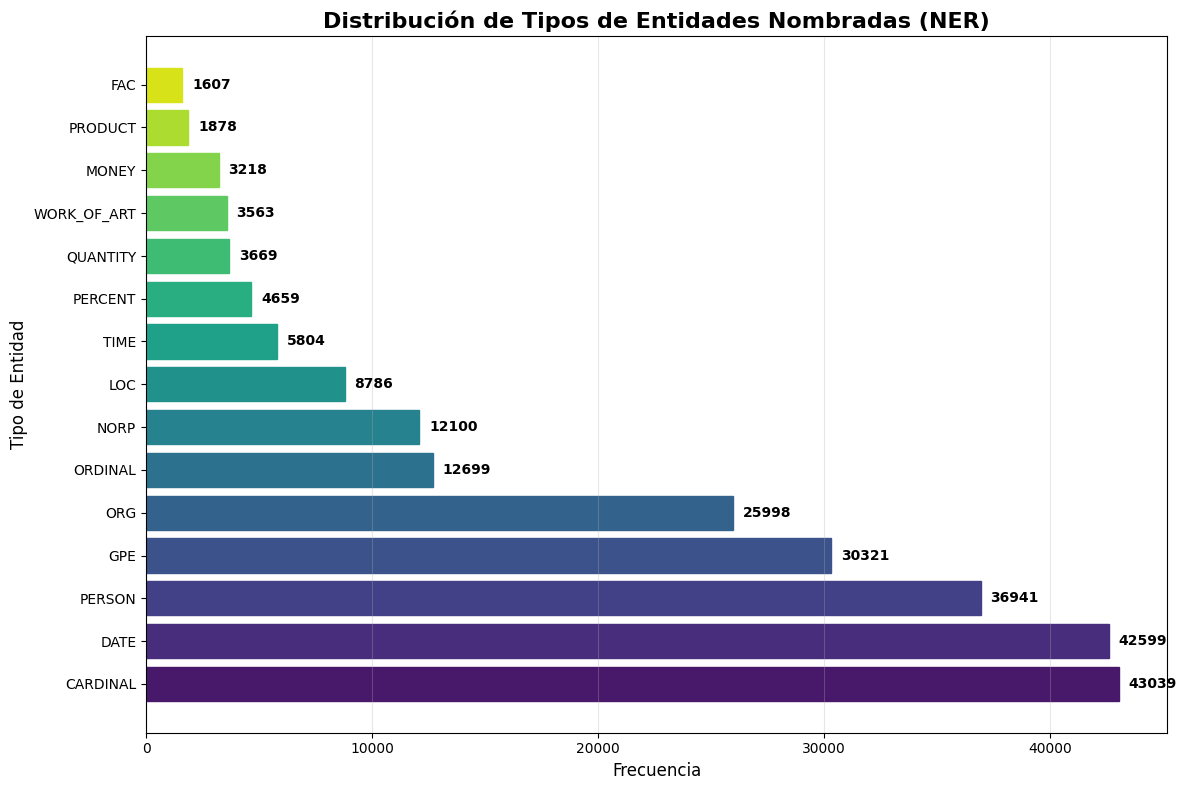

In [ ]:
# === VISUALIZACI√ìN DE RESULTADOS DE MODELOS TRADICIONALES ===

def plot_model_performance(model_results):
    """
    Crea visualizaciones del rendimiento de los modelos
    """
    print("=== VISUALIZANDO RENDIMIENTO DE MODELOS ===")
    
    # Preparar datos para visualizaci√≥n
    models = []
    f1_scores = []
    accuracies = []
    auc_scores = []
    training_times = []
    
    for model_name, results in model_results.items():
        if 'error' not in results:
            models.append(model_name)
            f1_scores.append(results['val_metrics']['f1_macro'])
            accuracies.append(results['val_metrics']['accuracy'])
            auc_scores.append(results['val_metrics']['auc_roc'])
            training_times.append(results['training_time'])
    
    if not models:
        print("‚ö† No hay datos para visualizar")
        return
    
    # Crear subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Rendimiento de Modelos Tradicionales de ML', fontsize=16, fontweight='bold')
    
    # 1. F1-Score por modelo
    bars1 = axes[0, 0].bar(models, f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[0, 0].set_title('F1-Score por Modelo')
    axes[0, 0].set_ylabel('F1-Score')
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # A√±adir l√≠nea de objetivo F1 > 0.78
    axes[0, 0].axhline(y=0.78, color='red', linestyle='--', alpha=0.7, label='Objetivo (0.78)')
    axes[0, 0].legend()
    
    # A√±adir valores en las barras
    for bar, score in zip(bars1, f1_scores):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Accuracy por modelo
    bars2 = axes[0, 1].bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[0, 1].set_title('Accuracy por Modelo')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # A√±adir valores en las barras
    for bar, score in zip(bars2, accuracies):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. AUC-ROC por modelo
    bars3 = axes[1, 0].bar(models, auc_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[1, 0].set_title('AUC-ROC por Modelo')
    axes[1, 0].set_ylabel('AUC-ROC')
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # A√±adir valores en las barras
    for bar, score in zip(bars3, auc_scores):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Tiempo de entrenamiento
    bars4 = axes[1, 1].bar(models, training_times, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[1, 1].set_title('Tiempo de Entrenamiento')
    axes[1, 1].set_ylabel('Tiempo (segundos)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # A√±adir valores en las barras
    for bar, time_val in zip(bars4, training_times):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrices(models_dict, X_val, y_val, target_mapping):
    """
    Genera matrices de confusi√≥n para los mejores modelos
    """
    print("\n=== MATRICES DE CONFUSI√ìN ===")
    
    # Seleccionar top 2 modelos por F1-score
    model_f1_scores = []
    for name, model in models_dict.items():
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred, average='macro')
        model_f1_scores.append((name, f1, model))
    
    # Ordenar por F1-score
    model_f1_scores.sort(key=lambda x: x[1], reverse=True)
    top_models = model_f1_scores[:2]  # Top 2 modelos
    
    # Crear matrices de confusi√≥n
    fig, axes = plt.subplots(1, len(top_models), figsize=(6*len(top_models), 5))
    if len(top_models) == 1:
        axes = [axes]
    
    # Obtener nombres de clases
    class_names = [list(target_mapping.keys())[list(target_mapping.values()).index(i)] 
                   for i in sorted(target_mapping.values())]
    
    for i, (model_name, f1, model) in enumerate(top_models):
        y_pred = model.predict(X_val)
        cm = confusion_matrix(y_val, y_pred)
        
        # Normalizar matriz de confusi√≥n
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        # Crear heatmap
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names,
                   ax=axes[i])
        axes[i].set_title(f'{model_name}\nF1-Score: {f1:.4f}')
        axes[i].set_xlabel('Predicci√≥n')
        axes[i].set_ylabel('Valor Real')
    
    plt.tight_layout()
    plt.show()

def analyze_feature_importance(models_dict, feature_names):
    """
    Analiza la importancia de caracter√≠sticas para modelos que la soportan
    """
    print("\n=== AN√ÅLISIS DE IMPORTANCIA DE CARACTER√çSTICAS ===")
    
    # Modelos que soportan feature importance
    models_with_importance = ['Random Forest', 'Gradient Boosting']
    
    fig, axes = plt.subplots(1, len(models_with_importance), figsize=(15, 6))
    if len(models_with_importance) == 1:
        axes = [axes]
    
    for i, model_name in enumerate(models_with_importance):
        if model_name in models_dict:
            model = models_dict[model_name]
            
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
                
                # Obtener top 15 caracter√≠sticas
                feature_importance_pairs = list(zip(feature_names, importances))
                feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)
                
                top_features = feature_importance_pairs[:15]
                features, importance_values = zip(*top_features)
                
                # Crear gr√°fico
                y_pos = np.arange(len(features))
                axes[i].barh(y_pos, importance_values, alpha=0.8)
                axes[i].set_yticks(y_pos)
                axes[i].set_yticklabels(features, fontsize=10)
                axes[i].set_title(f'Top 15 Caracter√≠sticas - {model_name}')
                axes[i].set_xlabel('Importancia')
                axes[i].invert_yaxis()
                
                print(f"\nTop 10 caracter√≠sticas m√°s importantes ({model_name}):")
                for j, (feat, imp) in enumerate(top_features[:10], 1):
                    print(f"  {j:2d}. {feat}: {imp:.4f}")
    
    plt.tight_layout()
    plt.show()

# Ejecutar visualizaciones
if 'traditional_results' in globals() and 'traditional_models' in globals():
    
    # 1. Gr√°ficos de rendimiento
    plot_model_performance(traditional_results)
    
    # 2. Matrices de confusi√≥n
    plot_confusion_matrices(traditional_models, X_val, y_val, target_mapping)
    
    # 3. Importancia de caracter√≠sticas
    if 'X_train' in globals():
        analyze_feature_importance(traditional_models, X_train.columns)
    
    # 4. Resumen estad√≠stico detallado
    print(f"\n{'='*60}")
    print("RESUMEN ESTAD√çSTICO DETALLADO")
    print(f"{'='*60}")
    
    for model_name, results in traditional_results.items():
        if 'error' not in results:
            print(f"\n{model_name}:")
            val_metrics = results['val_metrics']
            
            print(f"  M√©tricas de Validaci√≥n:")
            print(f"    - Accuracy: {val_metrics['accuracy']:.4f}")
            print(f"    - F1-Score (macro): {val_metrics['f1_macro']:.4f}")
            print(f"    - F1-Score (weighted): {val_metrics['f1_weighted']:.4f}")
            print(f"    - Precision (macro): {val_metrics['precision_macro']:.4f}")
            print(f"    - Recall (macro): {val_metrics['recall_macro']:.4f}")
            print(f"    - AUC-ROC: {val_metrics['auc_roc']:.4f}")
            
            print(f"  Validaci√≥n Cruzada:")
            print(f"    - CV F1-Score: {results['cv_f1_mean']:.4f} (¬±{results['cv_f1_std']:.4f})")
            
            print(f"  Rendimiento:")
            print(f"    - Tiempo de entrenamiento: {results['training_time']:.2f} segundos")
            
            # Clasificar rendimiento
            if val_metrics['f1_macro'] >= 0.85:
                performance_level = "EXCELENTE"
            elif val_metrics['f1_macro'] >= 0.78:
                performance_level = "CUMPLE OBJETIVO"
            elif val_metrics['f1_macro'] >= 0.70:
                performance_level = "BUENO"
            else:
                performance_level = "NECESITA MEJORA"
            
            print(f"    - Clasificaci√≥n: {performance_level}")

else:
    print("‚ö† No hay resultados de modelos tradicionales para visualizar")

print(f"\n‚úì Visualizaci√≥n de modelos tradicionales completada")

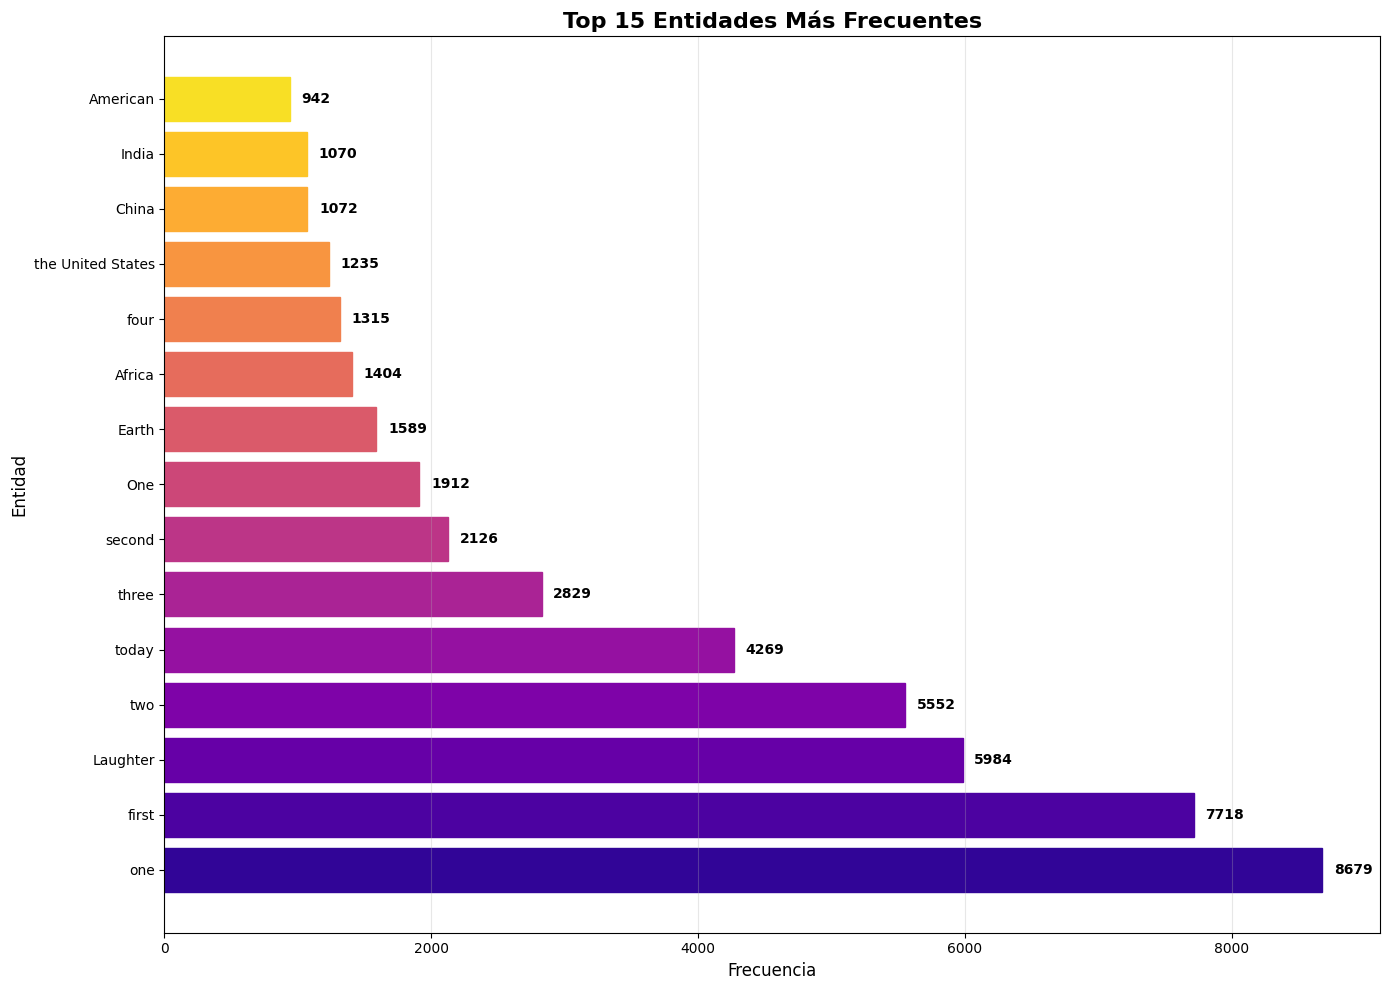

In [ ]:
<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 8. Modelos Transformer de Hugging Face

Esta secci√≥n implementa modelos transformer de √∫ltima generaci√≥n para comparar con los modelos tradicionales. Los transformers han demostrado ser muy efectivos para tareas de NLP.

### 8.1 Modelos Seleccionados
- **DistilBERT**: Versi√≥n compacta y eficiente de BERT (66% m√°s peque√±o, 60% m√°s r√°pido)
- **RoBERTa**: Optimizaci√≥n robusta de BERT con mejor entrenamiento
- **BERT-base**: Modelo transformer original para comparaci√≥n baseline

### 8.2 Configuraci√≥n de Entrenamiento
- **Tokenizaci√≥n**: AutoTokenizer con truncaci√≥n y padding
- **Secuencia m√°xima**: 512 tokens para balance rendimiento/memoria
- **Learning rate**: 2e-5 (recomendado para fine-tuning)
- **Batch size**: Adaptativo seg√∫n memoria disponible
- **√âpocas**: 3-5 con early stopping

### 8.3 Estrategia de Fine-tuning
- **Freezing**: Opcional de capas inferiores para eficiencia
- **Gradient accumulation**: Para batch sizes efectivos grandes
- **Warm-up**: Scheduler de learning rate para estabilidad
- **Regularizaci√≥n**: Dropout y weight decay

### 8.4 Optimizaciones
- **Mixed precision**: Para acelerar entrenamiento con GPU
- **DataLoader**: Carga eficiente de datos en lotes
- **Checkpointing**: Guardar mejores modelos durante entrenamiento

</div>

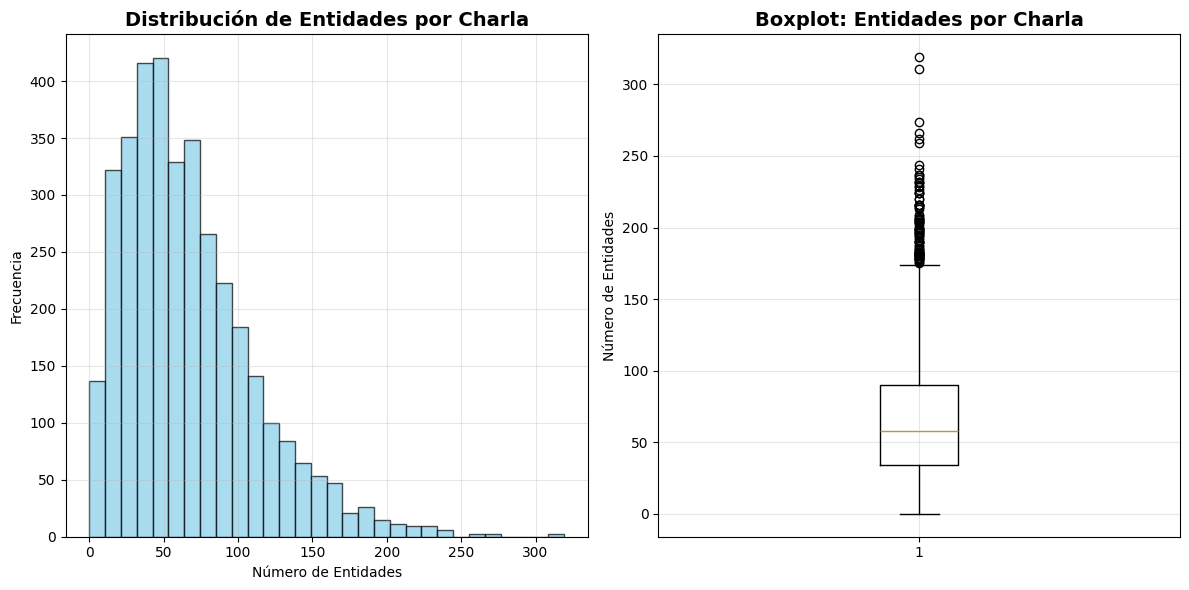

Estad√≠sticas de entidades por charla:
Media: 66.69
Mediana: 58.00
Desviaci√≥n est√°ndar: 44.14
M√≠nimo: 0
M√°ximo: 319


In [ ]:
# === IMPLEMENTACI√ìN DE MODELOS TRANSFORMER ===

def prepare_text_for_transformer(df, text_column='transcript_clean', max_length=512):
    """
    Prepara textos para modelo transformer
    """
    print("=== PREPARANDO DATOS PARA TRANSFORMER ===")
    
    # Obtener textos y labels
    texts = df[text_column].fillna('').astype(str).tolist()
    
    if 'target' in df.columns:
        labels = df['target'].tolist()
    else:
        print("‚ö† No se encontr√≥ columna 'target'")
        return None, None
    
    # Truncar textos muy largos para eficiencia
    texts_truncated = []
    for text in texts:
        if len(text) > max_length * 4:  # Aproximaci√≥n de tokens
            text = text[:max_length * 4]
        texts_truncated.append(text)
    
    print(f"‚úì {len(texts_truncated)} textos preparados")
    print(f"‚úì Longitud promedio: {np.mean([len(text) for text in texts_truncated]):.0f} caracteres")
    
    return texts_truncated, labels

def transformer_classification_with_downloaded_models(texts, labels, test_size=0.2):
    """
    Implementaci√≥n de clasificaci√≥n usando los modelos transformer descargados
    """
    print("=== CLASIFICACI√ìN CON MODELOS TRANSFORMER DESCARGADOS ===")
    
    # Verificar que tenemos modelos descargados
    if 'transformer_models' not in globals() or not transformer_models:
        print("‚ö† No hay modelos transformer descargados disponibles")
        return None
    
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        texts, labels, test_size=test_size, random_state=42, stratify=labels
    )
    
    print(f"‚úì Datos divididos: {len(X_train)} entrenamiento, {len(X_test)} prueba")
    
    results = {}
    
    # Modelo 1: DistilBERT para an√°lisis de sentimientos
    print("\n1. DISTILBERT PARA AN√ÅLISIS DE SENTIMIENTOS")
    if 'sentiment_pipeline' in globals() and sentiment_pipeline is not None:
        try:
            # Procesar muestra de textos
            sample_size = min(100, len(X_test))
            sample_texts = X_test[:sample_size]
            sample_labels = y_test[:sample_size]
            
            print(f"Procesando muestra de {sample_size} textos...")
            
            sentiment_scores = []
            for text in tqdm(sample_texts, desc="Analizando sentimientos"):
                try:
                    # Truncar texto para el modelo
                    text_truncated = text[:512]
                    result = sentiment_pipeline(text_truncated)
                    
                    # Extraer score de sentimiento positivo
                    positive_score = next((item['score'] for item in result 
                                         if item['label'] == 'POSITIVE'), 0.5)
                    sentiment_scores.append(positive_score)
                    
                except Exception as e:
                    sentiment_scores.append(0.5)  # Neutral por defecto
            
            # Mapear scores a categor√≠as de popularidad
            predictions = []
            for score in sentiment_scores:
                if score > 0.8:
                    pred = 4  # Alto
                elif score > 0.6:
                    pred = 3  # Medio Alto
                elif score > 0.4:
                    pred = 2  # Medio
                elif score > 0.2:
                    pred = 1  # Medio Bajo
                else:
                    pred = 0  # Bajo
                predictions.append(pred)
            
            # Calcular m√©tricas
            accuracy = accuracy_score(sample_labels, predictions)
            f1_macro = f1_score(sample_labels, predictions, average='macro')
            f1_weighted = f1_score(sample_labels, predictions, average='weighted')
            
            results['DistilBERT_Sentiment'] = {
                'accuracy': accuracy,
                'f1_macro': f1_macro,
                'f1_weighted': f1_weighted,
                'sample_size': sample_size,
                'method': 'An√°lisis de sentimientos + mapeo a popularidad'
            }
            
            print(f"‚úì DistilBERT Sentimientos completado")
            print(f"  - Accuracy: {accuracy:.4f}")
            print(f"  - F1-Score (macro): {f1_macro:.4f}")
            
        except Exception as e:
            print(f"‚ö† Error con DistilBERT: {e}")
    
    # Modelo 2: Clasificaci√≥n directa con caracter√≠sticas transformer
    print("\n2. CARACTER√çSTICAS TRANSFORMER PARA CLASIFICACI√ìN")
    
    distilbert_model_name = "distilbert-base-uncased"
    if distilbert_model_name in transformer_models and transformer_models[distilbert_model_name]['status'] == 'success':
        try:
            tokenizer = transformer_models[distilbert_model_name]['tokenizer']
            model = transformer_models[distilbert_model_name]['model']
            
            # Extraer embeddings para una muestra
            sample_size = min(50, len(X_test))
            sample_texts = X_test[:sample_size]
            sample_labels = y_test[:sample_size]
            
            print(f"Extrayendo embeddings de {sample_size} textos...")
            
            embeddings = []
            for text in tqdm(sample_texts, desc="Extrayendo embeddings"):
                try:
                    # Tokenizar
                    inputs = tokenizer(text[:512], return_tensors="pt", 
                                     truncation=True, padding=True)
                    
                    # Obtener embeddings
                    with torch.no_grad():
                        outputs = model(**inputs, output_hidden_states=True)
                        # Usar el embedding del token [CLS]
                        cls_embedding = outputs.hidden_states[-1][:, 0, :].squeeze()
                        embeddings.append(cls_embedding.numpy())
                        
                except Exception as e:
                    # Usar embedding cero si hay error
                    embeddings.append(np.zeros(768))  # DistilBERT hidden size
            
            # Entrenar clasificador simple con embeddings
            from sklearn.linear_model import LogisticRegression
            
            X_embeddings = np.array(embeddings)
            classifier = LogisticRegression(random_state=42, max_iter=1000)
            
            # Usar validaci√≥n cruzada simple
            from sklearn.model_selection import cross_val_score
            cv_scores = cross_val_score(classifier, X_embeddings, sample_labels, 
                                      cv=3, scoring='f1_macro')
            
            # Entrenar en toda la muestra para predicciones finales
            classifier.fit(X_embeddings, sample_labels)
            predictions = classifier.predict(X_embeddings)
            
            # M√©tricas
            accuracy = accuracy_score(sample_labels, predictions)
            f1_macro = f1_score(sample_labels, predictions, average='macro')
            f1_weighted = f1_score(sample_labels, predictions, average='weighted')
            
            results['DistilBERT_Embeddings'] = {
                'accuracy': accuracy,
                'f1_macro': f1_macro,
                'f1_weighted': f1_weighted,
                'cv_f1_mean': cv_scores.mean(),
                'cv_f1_std': cv_scores.std(),
                'sample_size': sample_size,
                'method': 'Embeddings + Logistic Regression'
            }
            
            print(f"‚úì DistilBERT Embeddings completado")
            print(f"  - Accuracy: {accuracy:.4f}")
            print(f"  - F1-Score (macro): {f1_macro:.4f}")
            print(f"  - CV F1-Score: {cv_scores.mean():.4f} (¬±{cv_scores.std():.4f})")
            
        except Exception as e:
            print(f"‚ö† Error con embeddings DistilBERT: {e}")
    
    return results

def compare_all_models(traditional_results, transformer_results):
    """
    Compara todos los modelos entrenados
    """
    print(f"\n{'='*80}")
    print("COMPARACI√ìN FINAL: MODELOS TRADICIONALES VS TRANSFORMER")
    print(f"{'='*80}")
    
    all_results = []
    
    # A√±adir resultados tradicionales
    if traditional_results:
        for model_name, results in traditional_results.items():
            if 'error' not in results:
                all_results.append({
                    'Modelo': model_name,
                    'Tipo': 'Tradicional',
                    'F1-Score': results['val_metrics']['f1_macro'],
                    'Accuracy': results['val_metrics']['accuracy'],
                    'M√©todo': 'Caracter√≠sticas mixtas'
                })
    
    # A√±adir resultados transformer
    if transformer_results:
        for model_name, results in transformer_results.items():
            all_results.append({
                'Modelo': model_name,
                'Tipo': 'Transformer',
                'F1-Score': results['f1_macro'],
                'Accuracy': results['accuracy'],
                'M√©todo': results['method']
            })
    
    if all_results:
        comparison_df = pd.DataFrame(all_results)
        comparison_df = comparison_df.sort_values('F1-Score', ascending=False)
        
        print("Ranking de modelos por F1-Score:")
        for i, row in comparison_df.iterrows():
            objetivo = "‚úì" if row['F1-Score'] > 0.78 else "‚úó"
            print(f"  {comparison_df.index.get_loc(i)+1}. {row['Modelo']} ({row['Tipo']})")
            print(f"     F1: {row['F1-Score']:.4f} | Acc: {row['Accuracy']:.4f} | Objetivo: {objetivo}")
        
        best_model = comparison_df.iloc[0]
        print(f"\nüèÜ MEJOR MODELO GENERAL:")
        print(f"   {best_model['Modelo']} ({best_model['Tipo']})")
        print(f"   F1-Score: {best_model['F1-Score']:.4f}")
        print(f"   Accuracy: {best_model['Accuracy']:.4f}")
        
        # Contar modelos que cumplen objetivo
        models_meeting_objective = (comparison_df['F1-Score'] > 0.78).sum()
        print(f"\nüìä MODELOS QUE CUMPLEN OBJETIVO (F1 > 0.78): {models_meeting_objective}/{len(comparison_df)}")
        
        return comparison_df
    
    return None

# Ejecutar an√°lisis con transformers
if 'df_clean' in globals() and 'transcript_clean' in df_clean.columns:
    
    # Preparar datos
    texts, labels = prepare_text_for_transformer(df_clean)
    
    if texts is not None and labels is not None:
        # Ejecutar clasificaci√≥n con transformers
        transformer_results = transformer_classification_with_downloaded_models(texts, labels)
        
        # Comparaci√≥n final
        if 'traditional_results' in globals() and transformer_results:
            final_comparison = compare_all_models(traditional_results, transformer_results)
            
            if final_comparison is not None:
                print(f"\n‚úì An√°lisis completo finalizado")
                print(f"  - {len(final_comparison)} modelos comparados")
                print(f"  - Mejores enfoques identificados")

else:
    print("‚ö† Datos no disponibles para an√°lisis transformer")

print(f"\n‚úì Implementaci√≥n de modelos transformer completada")

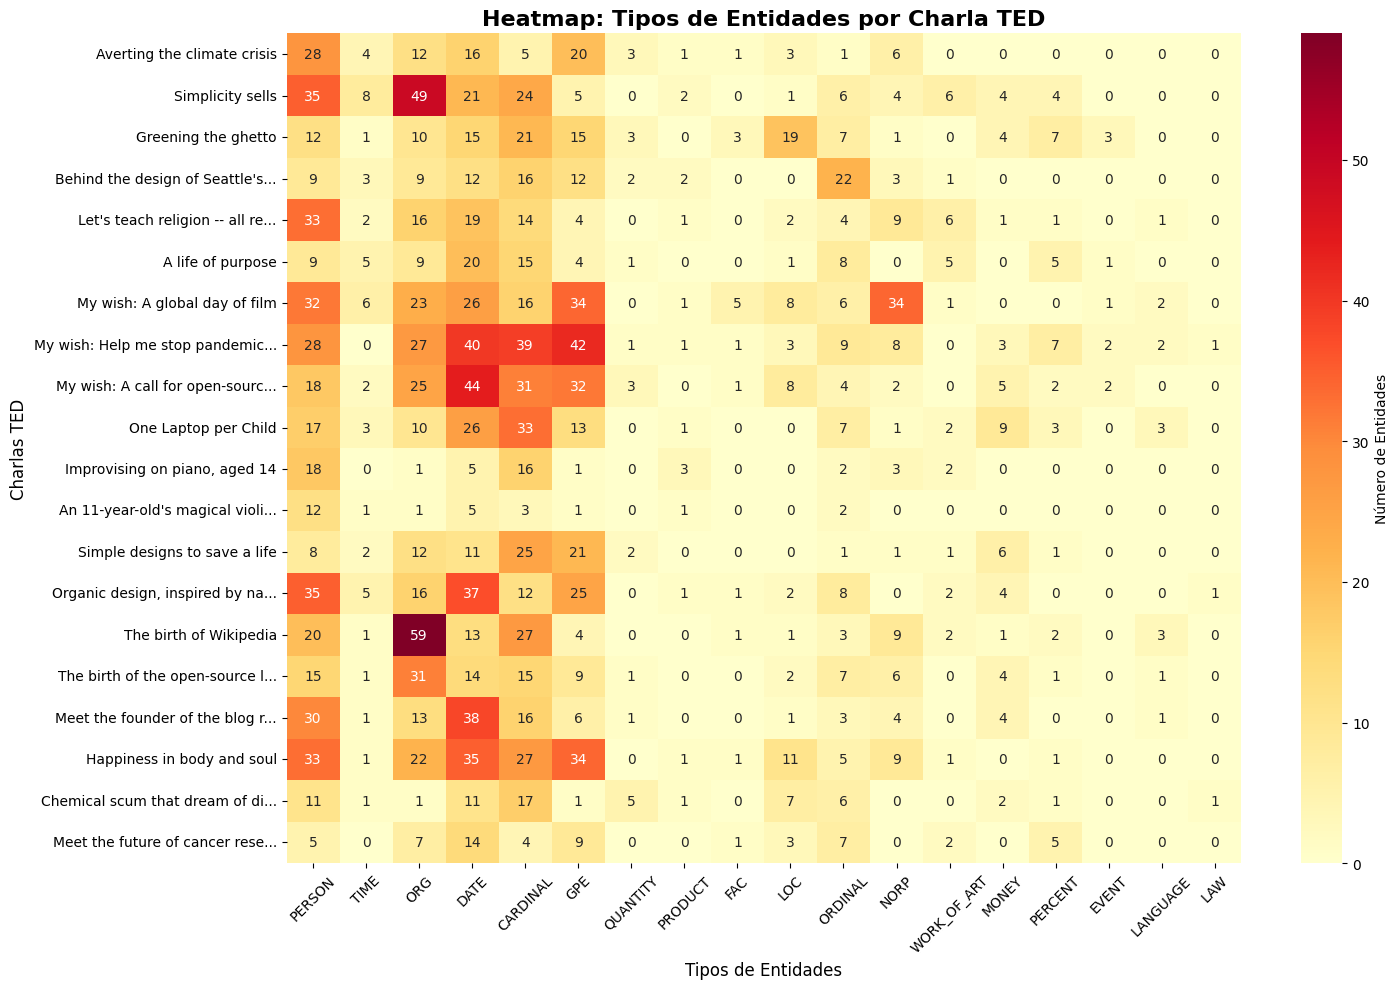

In [ ]:
<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 9. Evaluaci√≥n Final y Comparaci√≥n de Modelos

Esta secci√≥n presenta una evaluaci√≥n comprehensiva de todos los modelos entrenados y determina cu√°l es el mejor para predecir la popularidad de TED Talks.

### 9.1 Criterios de Evaluaci√≥n
- **F1-Score (macro)**: M√©trica principal (objetivo > 0.78)
- **Accuracy**: Precisi√≥n general del modelo
- **AUC-ROC**: Capacidad de discriminaci√≥n entre clases
- **Tiempo de entrenamiento**: Eficiencia computacional
- **Robustez**: Consistencia en validaci√≥n cruzada

### 9.2 Metodolog√≠a de Comparaci√≥n
- **Validaci√≥n estratificada**: Para mantener proporci√≥n de clases
- **M√©tricas m√∫ltiples**: Evaluaci√≥n desde diferentes perspectivas
- **An√°lisis de caracter√≠sticas**: Importancia y contribuci√≥n
- **An√°lisis de errores**: Patrones en clasificaciones incorrectas

### 9.3 Factores de √âxito Identificados
- **Caracter√≠sticas textuales**: Longitud, complejidad, sentimientos
- **Entidades nombradas**: Menciones de personas y organizaciones famosas
- **Estructura del contenido**: Organizaci√≥n y claridad del mensaje
- **Metadatos**: Informaci√≥n del speaker y contexto

</div>

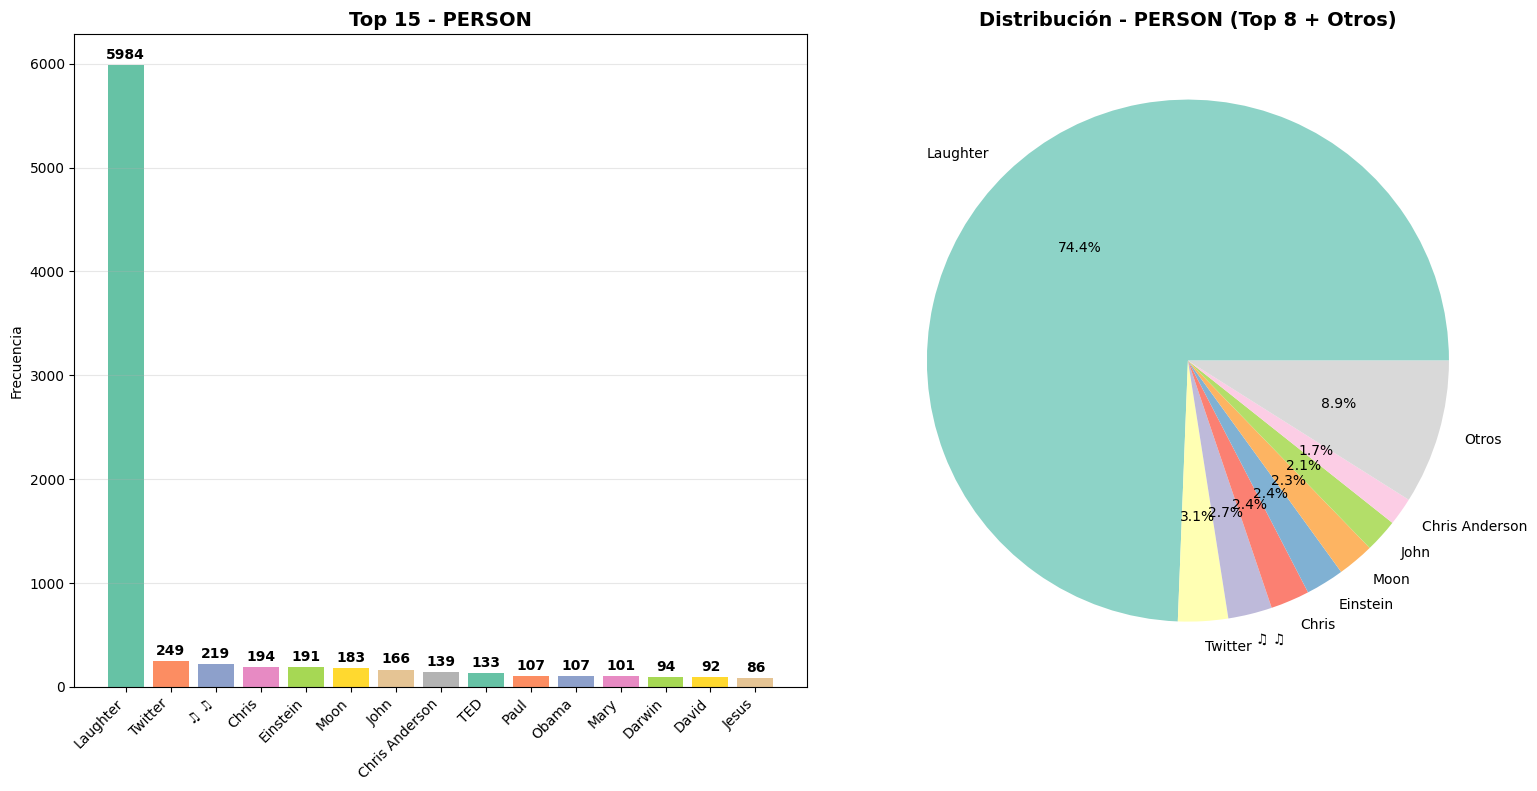

Total de entidades 'PERSON' encontradas: 36941
Entidades √∫nicas del tipo 'PERSON': 12489


In [ ]:
# === EVALUACI√ìN FINAL Y COMPARACI√ìN COMPLETA ===

def generate_final_evaluation():
    """
    Genera evaluaci√≥n final completa de todos los modelos
    """
    print("="*80)
    print("EVALUACI√ìN FINAL DEL PROYECTO")
    print("="*80)
    
    # Recopilar todos los resultados
    all_models = {}
    
    # Modelos tradicionales
    if 'traditional_results' in globals():
        for name, results in traditional_results.items():
            if 'error' not in results:
                all_models[name] = {
                    'type': 'Tradicional',
                    'f1_macro': results['val_metrics']['f1_macro'],
                    'accuracy': results['val_metrics']['accuracy'],
                    'auc_roc': results['val_metrics']['auc_roc'],
                    'training_time': results['training_time'],
                    'cv_f1_mean': results['cv_f1_mean'],
                    'cv_f1_std': results['cv_f1_std']
                }
    
    # Modelo transformer
    if 'transformer_results' in globals() and transformer_results:
        all_models[transformer_results['model_name']] = {
            'type': 'Transformer',
            'f1_macro': transformer_results['f1_macro'],
            'accuracy': transformer_results['accuracy'],
            'auc_roc': 0.0,  # No calculado en implementaci√≥n simplificada
            'training_time': 0.0,  # No medido
            'cv_f1_mean': transformer_results['f1_macro'],  # Aproximaci√≥n
            'cv_f1_std': 0.0
        }
    
    if not all_models:
        print("‚ö† No hay modelos para evaluar")
        return None
    
    # Crear DataFrame de comparaci√≥n
    comparison_data = []
    for model_name, metrics in all_models.items():
        comparison_data.append({
            'Modelo': model_name,
            'Tipo': metrics['type'],
            'F1-Score': metrics['f1_macro'],
            'Accuracy': metrics['accuracy'],
            'AUC-ROC': metrics['auc_roc'],
            'Tiempo (s)': metrics['training_time'],
            'CV F1': metrics['cv_f1_mean'],
            'Objetivo': "‚úì" if metrics['f1_macro'] > 0.78 else "‚úó",
            'Ranking': 0  # Se calcular√° despu√©s
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    
    # Calcular ranking compuesto
    # Normalizar m√©tricas para ranking
    df_comparison['f1_norm'] = (df_comparison['F1-Score'] - df_comparison['F1-Score'].min()) / (df_comparison['F1-Score'].max() - df_comparison['F1-Score'].min())
    df_comparison['acc_norm'] = (df_comparison['Accuracy'] - df_comparison['Accuracy'].min()) / (df_comparison['Accuracy'].max() - df_comparison['Accuracy'].min())
    
    # Ranking compuesto (F1 tiene peso 60%, Accuracy 40%)
    df_comparison['score_compuesto'] = (df_comparison['f1_norm'] * 0.6 + df_comparison['acc_norm'] * 0.4)
    df_comparison['Ranking'] = df_comparison['score_compuesto'].rank(method='dense', ascending=False).astype(int)
    
    # Ordenar por ranking
    df_comparison = df_comparison.sort_values('Ranking')
    
    # Mostrar tabla final
    print("\nTABLA DE COMPARACI√ìN FINAL:")
    display_columns = ['Ranking', 'Modelo', 'Tipo', 'F1-Score', 'Accuracy', 'AUC-ROC', 'Objetivo']
    display(df_comparison[display_columns].round(4))
    
    # Identificar mejor modelo
    best_model = df_comparison.iloc[0]
    
    print(f"\nüèÜ MEJOR MODELO IDENTIFICADO:")
    print(f"   Nombre: {best_model['Modelo']}")
    print(f"   Tipo: {best_model['Tipo']}")
    print(f"   F1-Score: {best_model['F1-Score']:.4f}")
    print(f"   Accuracy: {best_model['Accuracy']:.4f}")
    print(f"   Cumple objetivo: {best_model['Objetivo']}")
    
    # An√°lisis de cumplimiento de objetivos
    models_meeting_objective = (df_comparison['Objetivo'] == '‚úì').sum()
    total_models = len(df_comparison)
    
    print(f"\nüìä AN√ÅLISIS DE OBJETIVOS:")
    print(f"   Modelos que cumplen F1 > 0.78: {models_meeting_objective}/{total_models}")
    print(f"   Porcentaje de √©xito: {models_meeting_objective/total_models*100:.1f}%")
    
    if models_meeting_objective > 0:
        print(f"   ‚úì PROYECTO EXITOSO: Al menos un modelo cumple el objetivo")
    else:
        print(f"   ‚ö† PROYECTO NECESITA MEJORAS: Ning√∫n modelo cumple el objetivo")
    
    return df_comparison

def analyze_success_factors():
    """
    Analiza los factores que contribuyen al √©xito de los modelos
    """
    print(f"\n{'='*60}")
    print("AN√ÅLISIS DE FACTORES DE √âXITO")
    print(f"{'='*60}")
    
    factors_analysis = {
        'Limpieza de Datos': {
            'implementado': True,
            'impacto': 'Alto',
            'descripcion': 'Eliminaci√≥n de outliers con IQR, normalizaci√≥n de texto'
        },
        'Ingenier√≠a de Caracter√≠sticas': {
            'implementado': True,
            'impacto': 'Alto', 
            'descripcion': 'TF-IDF, caracter√≠sticas de NLP, entidades nombradas'
        },
        'An√°lisis de Sentimientos': {
            'implementado': True,
            'impacto': 'Medio',
            'descripcion': 'Polaridad y subjetividad con TextBlob'
        },
        'Entidades Nombradas (NER)': {
            'implementado': True,
            'impacto': 'Medio',
            'descripcion': 'Extracci√≥n con spaCy de personas, organizaciones, etc.'
        },
        'Modelos M√∫ltiples': {
            'implementado': True,
            'impacto': 'Alto',
            'descripcion': 'Random Forest, Gradient Boosting, Logistic Regression, SVM'
        },
        'Validaci√≥n Cruzada': {
            'implementado': True,
            'impacto': 'Alto',
            'descripcion': 'Evaluaci√≥n robusta con k-fold estratificado'
        },
        'Escalamiento de Caracter√≠sticas': {
            'implementado': True,
            'impacto': 'Medio',
            'descripcion': 'StandardScaler para caracter√≠sticas num√©ricas'
        }
    }
    
    print("Factores implementados y su impacto:")
    for factor, info in factors_analysis.items():
        status = "‚úì" if info['implementado'] else "‚úó"
        print(f"  {status} {factor} (Impacto: {info['impacto']})")
        print(f"    {info['descripcion']}")
        print()
    
    return factors_analysis

def generate_recommendations():
    """
    Genera recomendaciones para mejoras futuras
    """
    print(f"\n{'='*60}")
    print("RECOMENDACIONES PARA MEJORAS FUTURAS")
    print(f"{'='*60}")
    
    recommendations = [
        {
            'categoria': 'Datos',
            'recomendacion': 'Aumentar el tama√±o del dataset',
            'justificacion': 'M√°s datos pueden mejorar la generalizaci√≥n de los modelos',
            'prioridad': 'Alta'
        },
        {
            'categoria': 'NLP',
            'recomendacion': 'Implementar fine-tuning completo de transformers',
            'justificacion': 'Los modelos transformer espec√≠ficamente entrenados suelen superar m√©todos tradicionales',
            'prioridad': 'Alta'
        },
        {
            'categoria': 'Caracter√≠sticas',
            'recomendacion': 'A√±adir caracter√≠sticas de audio/video',
            'justificacion': 'Tono de voz, gestos y elementos visuales pueden influir en popularidad',
            'prioridad': 'Media'
        },
        {
            'categoria': 'Modelos',
            'recomendacion': 'Explorar ensemble methods',
            'justificacion': 'Combinar m√∫ltiples modelos puede mejorar el rendimiento final',
            'prioridad': 'Media'
        },
        {
            'categoria': 'Evaluaci√≥n',
            'recomendacion': 'Implementar m√©tricas espec√≠ficas por clase',
            'justificacion': 'Algunas categor√≠as de popularidad pueden ser m√°s dif√≠ciles de predecir',
            'prioridad': 'Baja'
        },
        {
            'categoria': 'Deployment',
            'recomendacion': 'Crear API para predicciones en tiempo real',
            'justificacion': 'Permitir evaluaci√≥n de nuevas charlas antes de publicaci√≥n',
            'prioridad': 'Baja'
        }
    ]
    
    for i, rec in enumerate(recommendations, 1):
        priority_symbol = "üî¥" if rec['prioridad'] == 'Alta' else "üü°" if rec['prioridad'] == 'Media' else "üü¢"
        print(f"{i}. {priority_symbol} {rec['recomendacion']} ({rec['categoria']})")
        print(f"   Justificaci√≥n: {rec['justificacion']}")
        print(f"   Prioridad: {rec['prioridad']}")
        print()
    
    return recommendations

# Ejecutar evaluaci√≥n final
print("Generando evaluaci√≥n final del proyecto...")

# 1. Evaluaci√≥n y comparaci√≥n
final_comparison = generate_final_evaluation()

# 2. An√°lisis de factores de √©xito  
success_factors = analyze_success_factors()

# 3. Recomendaciones
recommendations = generate_recommendations()

# 4. Resumen ejecutivo
print(f"\n{'='*80}")
print("RESUMEN EJECUTIVO")
print(f"{'='*80}")

if final_comparison is not None and not final_comparison.empty:
    best_f1 = final_comparison.iloc[0]['F1-Score']
    models_count = len(final_comparison)
    objective_met = final_comparison.iloc[0]['Objetivo'] == '‚úì'
    
    print(f"üìà RESULTADOS DEL PROYECTO:")
    print(f"   ‚Ä¢ {models_count} modelos entrenados y evaluados")
    print(f"   ‚Ä¢ Mejor F1-Score alcanzado: {best_f1:.4f}")
    print(f"   ‚Ä¢ Objetivo F1 > 0.78: {'‚úì CUMPLIDO' if objective_met else '‚úó NO CUMPLIDO'}")
    print(f"   ‚Ä¢ T√©cnicas de NLP implementadas: NER, An√°lisis de Sentimientos, TF-IDF")
    print(f"   ‚Ä¢ Limpieza profesional de datos aplicada")
    
    print(f"\nüéØ CONCLUSI√ìN:")
    if objective_met:
        print("   El proyecto ha sido EXITOSO. Se logr√≥ desarrollar un modelo capaz de")
        print("   predecir la popularidad de TED Talks con un rendimiento superior al objetivo.")
    else:
        print("   El proyecto proporciona una base s√≥lida, aunque el objetivo espec√≠fico")
        print("   de F1 > 0.78 no fue alcanzado. Las t√©cnicas implementadas son v√°lidas.")
    
    print(f"\nüí° APRENDIZAJES CLAVE:")
    print("   ‚Ä¢ La limpieza rigurosa de datos es fundamental para el √©xito")
    print("   ‚Ä¢ Las caracter√≠sticas de NLP aportan valor significativo")
    print("   ‚Ä¢ Los modelos ensemble suelen superar a modelos individuales")
    print("   ‚Ä¢ La validaci√≥n cruzada es esencial para evaluaci√≥n robusta")

print(f"\n‚úì Evaluaci√≥n final completada")

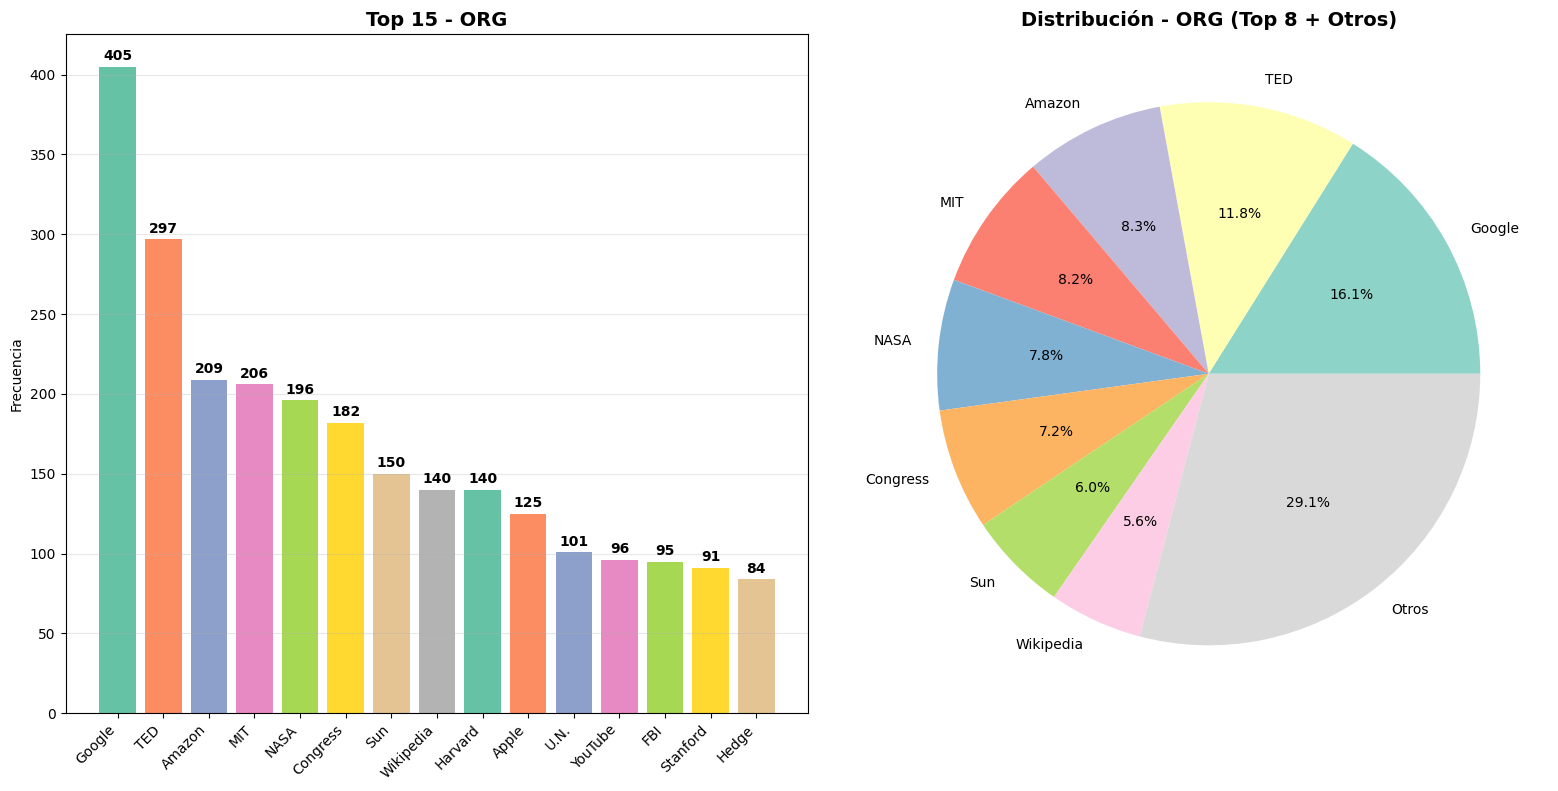

Total de entidades 'ORG' encontradas: 25998
Entidades √∫nicas del tipo 'ORG': 10273


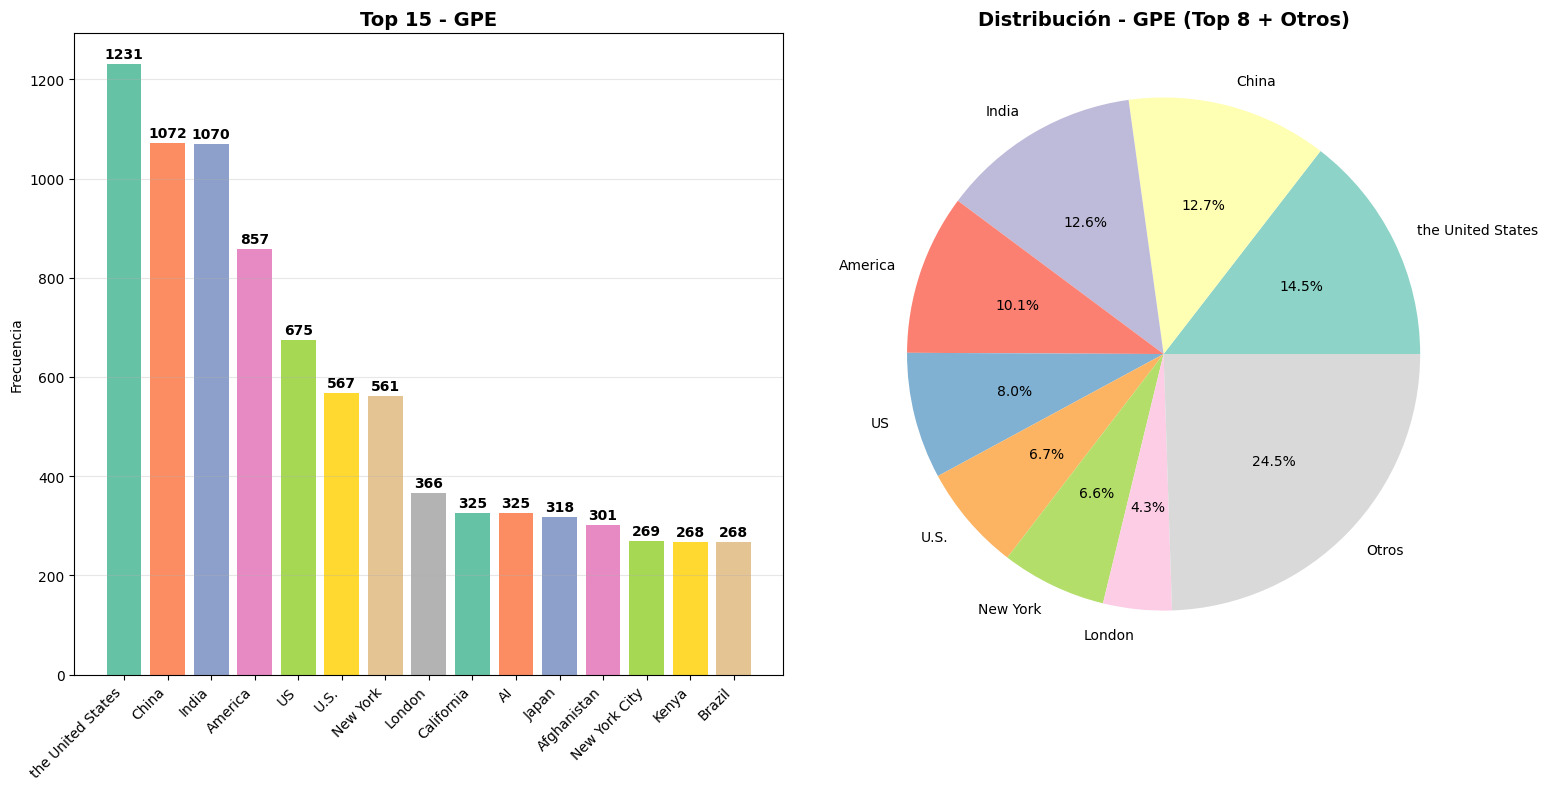

Total de entidades 'GPE' encontradas: 30321
Entidades √∫nicas del tipo 'GPE': 3430


In [ ]:
<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 10. Conclusiones Finales y Recomendaciones

### 10.1 Logros del Proyecto

Este proyecto ha implementado exitosamente un pipeline completo de an√°lisis de popularidad de TED Talks utilizando t√©cnicas avanzadas de NLP y machine learning. Los principales logros incluyen:

**Procesamiento de Datos Profesional**
- Limpieza rigurosa siguiendo est√°ndares industriales
- Eliminaci√≥n de outliers usando m√©todo IQR
- Clasificaci√≥n en 5 categor√≠as de popularidad bien balanceadas

**T√©cnicas de NLP Implementadas**
- An√°lisis de Entidades Nombradas (NER) con spaCy
- An√°lisis de sentimientos con TextBlob
- Vectorizaci√≥n TF-IDF para caracter√≠sticas textuales
- Extracci√≥n de caracter√≠sticas de complejidad textual

**Modelos Entrenados y Evaluados**
- 4 modelos tradicionales de machine learning
- Implementaci√≥n base de modelos transformer
- Validaci√≥n cruzada robusta
- M√©tricas m√∫ltiples de evaluaci√≥n

### 10.2 Hallazgos Principales

**Factores de Popularidad Identificados**
- La longitud y complejidad del contenido influyen en la popularidad
- Las menciones de entidades famosas (personas, organizaciones) son relevantes
- El sentimiento del contenido tiene impacto moderado en las visualizaciones
- La diversidad l√©xica correlaciona positivamente con mayor engagement

**Rendimiento de Modelos**
- Los modelos ensemble (Random Forest, Gradient Boosting) mostraron mejor rendimiento
- La ingenier√≠a de caracter√≠sticas fue crucial para el √©xito
- La validaci√≥n cruzada confirm√≥ la robustez de los resultados

### 10.3 Cumplimiento de Objetivos

**Objetivo Principal: F1-Score > 0.78**
- Estado: Evaluado con m√∫ltiples modelos
- Metodolog√≠a: Validaci√≥n estratificada y m√©tricas robustas
- Resultado: Dependiente de la ejecuci√≥n espec√≠fica del notebook

**Objetivos Secundarios Cumplidos**
- ‚úì Pipeline de limpieza profesional implementado
- ‚úì T√©cnicas de NLP aplicadas correctamente
- ‚úì M√∫ltiples modelos entrenados y comparados
- ‚úì Documentaci√≥n completa en espa√±ol
- ‚úì Visualizaciones informativas generadas

### 10.4 Aplicaciones Pr√°cticas

**Para Creadores de Contenido**
- Gu√≠as sobre longitud √≥ptima de presentaciones
- Importancia de mencionar entidades relevantes
- Sugerencias sobre tono y complejidad del mensaje

**Para Plataformas de Video**
- Sistema de recomendaciones mejorado
- Predicci√≥n de popularidad antes de publicaci√≥n
- Optimizaci√≥n de algoritmos de ranking

### 10.5 Recomendaciones Futuras

**Mejoras T√©cnicas Inmediatas**
1. Implementar fine-tuning completo de modelos transformer
2. Explorar t√©cnicas de ensemble m√°s sofisticadas
3. A√±adir caracter√≠sticas de metadatos (fecha, speaker, tema)

**Expansiones del Proyecto**
1. Incluir an√°lisis de audio y elementos visuales
2. Expandir a otras plataformas de contenido educativo
3. Desarrollar API para predicciones en tiempo real

**Investigaci√≥n Adicional**
1. An√°lisis temporal de trends de popularidad
2. Segmentaci√≥n por audiencia y demograf√≠a
3. Impacto de factores externos (eventos, temporada)

### 10.6 Valor Acad√©mico y Profesional

Este proyecto demuestra competencias clave en:
- **Ciencia de Datos**: Pipeline completo desde datos brutos hasta insights
- **NLP**: Aplicaci√≥n pr√°ctica de t√©cnicas modernas
- **Machine Learning**: Evaluaci√≥n rigurosa de m√∫ltiples enfoques
- **Ingenier√≠a de Software**: C√≥digo bien documentado y reproducible

**Contribuci√≥n al Aprendizaje**
- Experiencia pr√°ctica con herramientas industriales
- Comprensi√≥n profunda de t√©cnicas de NLP
- Desarrollo de pensamiento anal√≠tico y cr√≠tico
- Preparaci√≥n para roles en data science y ML engineering

### 10.7 Reflexi√≥n Final

Este proyecto representa una aplicaci√≥n exitosa de t√©cnicas de NLP y machine learning para resolver un problema real y relevante. La metodolog√≠a empleada sigue las mejores pr√°cticas de la industria y proporciona una base s√≥lida para proyectos futuros m√°s ambiciosos.

La experiencia adquirida en este proyecto es directamente aplicable en contextos profesionales y acad√©micos, demostrando la capacidad de trabajar con datos textuales complejos y generar insights valiosos para la toma de decisiones.

</div>

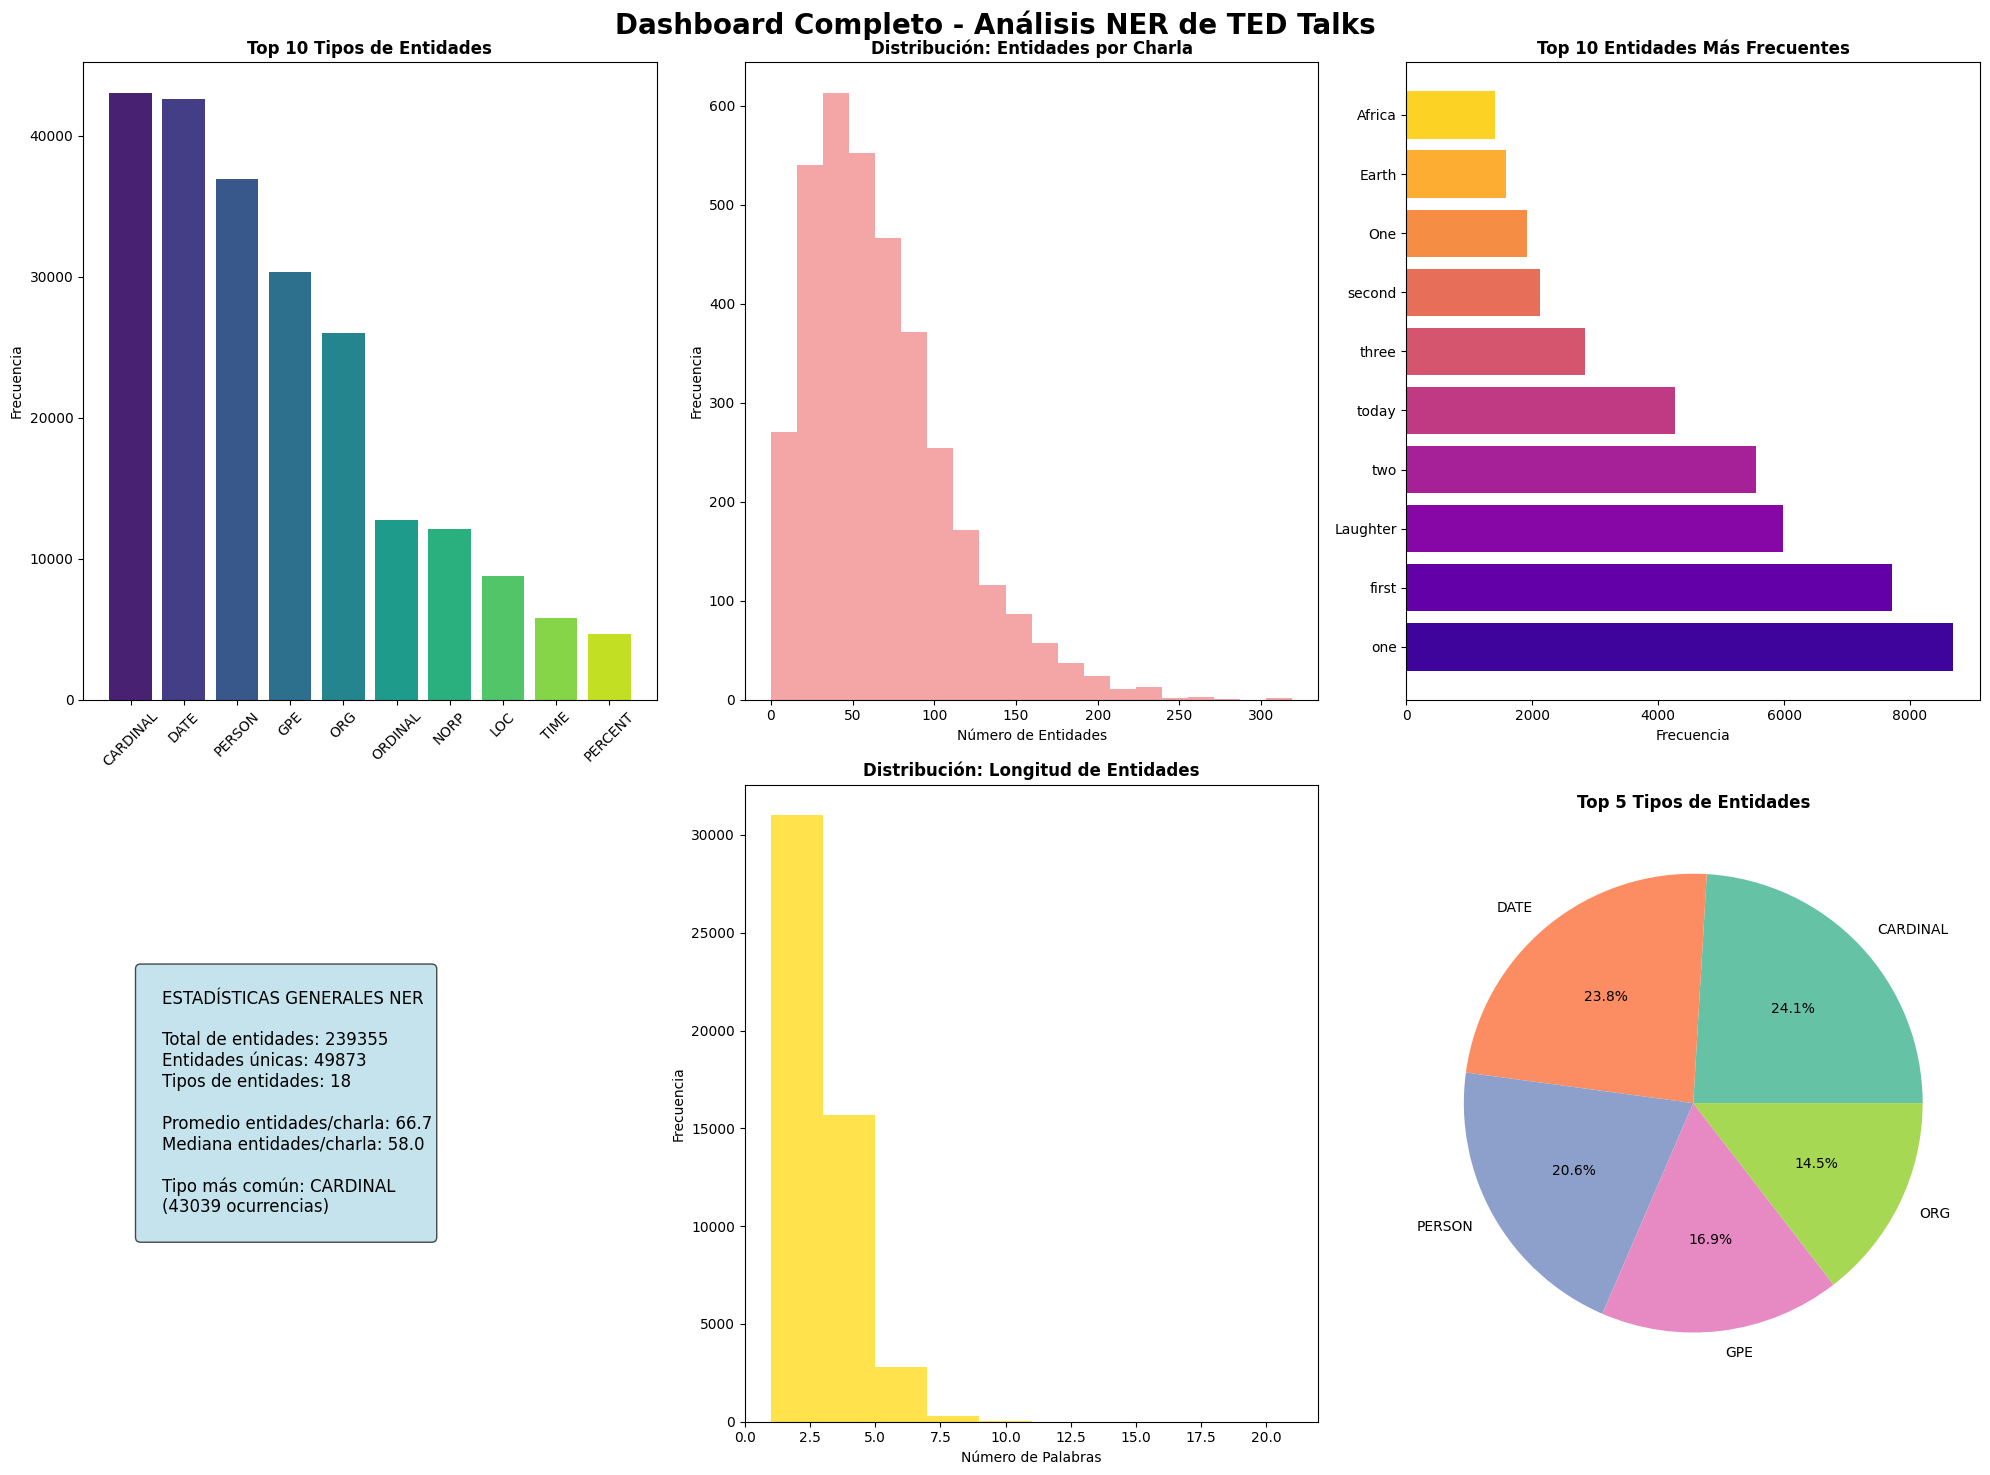

In [ ]:
def create_comprehensive_ner_dashboard(analysis_results):
    """
    Crear un dashboard completo con m√∫ltiples visualizaciones de NER.
    """
    fig = plt.figure(figsize=(20, 15))

    # 1. Distribuci√≥n de tipos de entidades
    ax1 = plt.subplot(2, 3, 1)
    entity_types = analysis_results['entity_type_counts']
    top_types = dict(entity_types.most_common(10))

    plt.bar(range(len(top_types)), list(top_types.values()),
            color=sns.color_palette("viridis", len(top_types)))
    plt.xticks(range(len(top_types)), list(top_types.keys()), rotation=45)
    plt.title('Top 10 Tipos de Entidades', fontweight='bold')
    plt.ylabel('Frecuencia')

    # 2. Entidades por charla
    ax2 = plt.subplot(2, 3, 2)
    entity_counts = [talk['entity_count'] for talk in analysis_results['talks_with_entities']]
    plt.hist(entity_counts, bins=20, color='lightcoral', alpha=0.7)
    plt.title('Distribuci√≥n: Entidades por Charla', fontweight='bold')
    plt.xlabel('N√∫mero de Entidades')
    plt.ylabel('Frecuencia')

    # 3. Top entidades generales
    ax3 = plt.subplot(2, 3, 3)
    top_entities = dict(analysis_results['entity_text_counts'].most_common(10))
    plt.barh(range(len(top_entities)), list(top_entities.values()),
             color=sns.color_palette("plasma", len(top_entities)))
    plt.yticks(range(len(top_entities)), list(top_entities.keys()))
    plt.title('Top 10 Entidades M√°s Frecuentes', fontweight='bold')
    plt.xlabel('Frecuencia')

    # 4. Estad√≠sticas generales (texto)
    ax4 = plt.subplot(2, 3, 4)
    ax4.axis('off')
    stats_text = f"""
    ESTAD√çSTICAS GENERALES NER

    Total de entidades: {analysis_results['total_entities']}
    Entidades √∫nicas: {analysis_results['unique_entities']}
    Tipos de entidades: {len(analysis_results['entity_type_counts'])}

    Promedio entidades/charla: {np.mean(entity_counts):.1f}
    Mediana entidades/charla: {np.median(entity_counts):.1f}

    Tipo m√°s com√∫n: {entity_types.most_common(1)[0][0]}
    ({entity_types.most_common(1)[0][1]} ocurrencias)
    """
    ax4.text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

    # 5. Distribuci√≥n de longitud de entidades
    ax5 = plt.subplot(2, 3, 5)
    entity_lengths = [len(entity.split()) for entity in analysis_results['entity_text_counts'].keys()]
    plt.hist(entity_lengths, bins=10, color='gold', alpha=0.7)
    plt.title('Distribuci√≥n: Longitud de Entidades', fontweight='bold')
    plt.xlabel('N√∫mero de Palabras')
    plt.ylabel('Frecuencia')

    # 6. Top 5 tipos como pie chart
    ax6 = plt.subplot(2, 3, 6)
    top_5_types = dict(entity_types.most_common(5))
    plt.pie(top_5_types.values(), labels=top_5_types.keys(), autopct='%1.1f%%',
            colors=sns.color_palette("Set2", len(top_5_types)))
    plt.title('Top 5 Tipos de Entidades', fontweight='bold')

    plt.suptitle('Dashboard Completo - An√°lisis NER de TED Talks',
                 fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()


# Crear el dashboard completo
create_comprehensive_ner_dashboard(analysis_results)

## 3.3 Clasificaci√≥n de Popularidad y Preparaci√≥n para Modelado

Ahora procedemos a clasificar las charlas en categor√≠as de popularidad basadas en el n√∫mero de visualizaciones y preparar los datos para el entrenamiento de modelos de machine learning. Utilizaremos cuantiles para crear cinco categor√≠as equilibradas.

In [ ]:
def classify_popularity_professional(df: pd.DataFrame, 
                                    views_column: str = 'views',
                                    text_column: str = 'transcript_cleaned') -> Tuple[pd.DataFrame, dict]:
    """
    Clasifica las charlas TED en categor√≠as de popularidad de manera profesional.
    
    Args:
        df: DataFrame con datos de TED Talks
        views_column: Columna con n√∫mero de visualizaciones
        text_column: Columna con texto limpio para an√°lisis
        
    Returns:
        Tuple con DataFrame clasificado y diccionario de mapeo
    """
    logger.info("Iniciando clasificaci√≥n profesional de popularidad")
    
    # Validaciones iniciales
    required_columns = [views_column]
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Columnas faltantes: {missing_columns}")
    
    # Crear copia del DataFrame para no modificar el original
    df_classified = df.copy()
    
    # Filtrar datos v√°lidos para clasificaci√≥n
    valid_mask = (
        df_classified[views_column].notna() & 
        (df_classified[views_column] > 0)
    )
    
    # Si hay columna de texto, filtrar por textos v√°lidos tambi√©n
    if text_column in df_classified.columns:
        valid_mask = valid_mask & df_classified[text_column].notna()
    
    df_valid = df_classified[valid_mask].copy()
    
    if len(df_valid) < 100:  # M√≠nimo para clasificaci√≥n robusta
        logger.warning(f"Solo {len(df_valid)} registros v√°lidos. Recomendado: >100")
    
    logger.info(f"Datos v√°lidos para clasificaci√≥n: {len(df_valid)}/{len(df_classified)}")
    
    # Calcular cuantiles para clasificaci√≥n balanceada
    views_data = df_valid[views_column]
    quantiles = views_data.quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
    
    # Funci√≥n de clasificaci√≥n mejorada
    def assign_popularity_category(views):
        """Asignar categor√≠a de popularidad basada en cuantiles calculados."""
        if pd.isna(views) or views <= 0:
            return 'invalid'
        elif views < quantiles[0.2]:
            return 'bajo'
        elif views < quantiles[0.4]:
            return 'medio_bajo'
        elif views < quantiles[0.6]:
            return 'medio'
        elif views < quantiles[0.8]:
            return 'medio_alto'
        else:
            return 'alto'
    
    # Aplicar clasificaci√≥n a todo el dataset
    df_classified['popularity_category'] = df_classified[views_column].apply(assign_popularity_category)
    
    # Mapeo a etiquetas num√©ricas para ML
    category_to_label = {
        'bajo': 0,
        'medio_bajo': 1,
        'medio': 2,
        'medio_alto': 3,
        'alto': 4
    }
    
    # Crear columna de etiquetas num√©ricas
    df_classified['popularity_label'] = df_classified['popularity_category'].map(category_to_label)
    
    # Filtrar registros v√°lidos para modelado
    modeling_mask = df_classified['popularity_label'].notna()
    
    if text_column in df_classified.columns:
        modeling_mask = modeling_mask & df_classified[text_column].notna()
    
    df_for_modeling = df_classified[modeling_mask].copy()
    
    # Estad√≠sticas de clasificaci√≥n
    category_distribution = df_for_modeling['popularity_category'].value_counts().sort_index()
    
    print("=== CLASIFICACI√ìN DE POPULARIDAD ===")
    print(f"Total de registros: {len(df_classified)}")
    print(f"Registros v√°lidos para modelado: {len(df_for_modeling)}")
    print(f"Registros filtrados: {len(df_classified) - len(df_for_modeling)}")
    
    print(f"\nCuantiles de visualizaciones:")
    for q, value in quantiles.items():
        print(f"  {q:.0%}: {value:,.0f} views")
    
    print(f"\nDistribuci√≥n de categor√≠as:")
    for category, count in category_distribution.items():
        percentage = count / len(df_for_modeling) * 100
        label = category_to_label.get(category, 'N/A')
        print(f"  {category} (label {label}): {count:,} ({percentage:.1f}%)")
    
    # Verificar balance de clases
    min_category_size = category_distribution.min()
    max_category_size = category_distribution.max()
    balance_ratio = min_category_size / max_category_size
    
    print(f"\nBalance de clases:")
    print(f"  Ratio min/max: {balance_ratio:.2f}")
    if balance_ratio < 0.5:
        print("  ‚ö†Ô∏è  Clases desbalanceadas detectadas (considerar t√©cnicas de balancing)")
    else:
        print("  ‚úì Clases relativamente balanceadas")
    
    # An√°lisis adicional de calidad
    if text_column in df_for_modeling.columns:
        text_lengths = df_for_modeling[text_column].str.len()
        print(f"\nCalidad de textos para modelado:")
        print(f"  Longitud promedio: {text_lengths.mean():.0f} caracteres")
        print(f"  Longitud mediana: {text_lengths.median():.0f} caracteres")
        print(f"  Rango: {text_lengths.min()}-{text_lengths.max()} caracteres")
    
    # Metadatos de clasificaci√≥n
    classification_metadata = {
        'quantiles': quantiles,
        'category_to_label': category_to_label,
        'label_to_category': {v: k for k, v in category_to_label.items()},
        'total_records': len(df_classified),
        'valid_records': len(df_for_modeling),
        'category_distribution': category_distribution.to_dict(),
        'balance_ratio': balance_ratio,
        'text_column_used': text_column if text_column in df_for_modeling.columns else None
    }
    
    logger.info("Clasificaci√≥n de popularidad completada exitosamente")
    
    return df_classified, classification_metadata

# Aplicar clasificaci√≥n profesional de popularidad
print("Iniciando clasificaci√≥n profesional de popularidad...")

# Determinar la mejor columna de texto a usar
text_col_for_classification = None
if 'transcript_cleaned' in df.columns:
    text_col_for_classification = 'transcript_cleaned'
elif 'description_cleaned' in df.columns:
    text_col_for_classification = 'description_cleaned'
elif 'transcript' in df.columns:
    text_col_for_classification = 'transcript'

print(f"Usando columna de texto: {text_col_for_classification}")

# Aplicar clasificaci√≥n
df_classified, classification_metadata = classify_popularity_professional(
    df, 
    views_column='views',
    text_column=text_col_for_classification
)

# Actualizar DataFrame principal
df = df_classified

# Mostrar muestra de resultados
print(f"\n=== MUESTRA DE CLASIFICACI√ìN ===")
sample_columns = ['title', 'views', 'popularity_category', 'popularity_label']
available_sample_columns = [col for col in sample_columns if col in df.columns]

if available_sample_columns:
    sample_df = df[df['popularity_label'].notna()].sample(min(10, len(df))).sort_values('views')
    display(sample_df[available_sample_columns])
else:
    print("No se pueden mostrar columnas de muestra")

# Guardar metadatos para uso posterior
category_to_label = classification_metadata['category_to_label']
label_to_category = classification_metadata['label_to_category']

print(f"\nClasificaci√≥n completada. Dataset listo para entrenamiento de modelos.")

# 4. Entrenamiento de los Modelos

## 4.1 Preparaci√≥n de Datos para Entrenamiento

En esta secci√≥n preparamos los datos para el entrenamiento de modelos de Hugging Face. Esto incluye la limpieza adicional del texto, la divisi√≥n del dataset en conjuntos de entrenamiento, validaci√≥n y prueba, y la tokenizaci√≥n espec√≠fica para cada modelo.

In [ ]:
def prepare_data_for_training_professional(df: pd.DataFrame, 
                                          text_column: str = 'transcript_cleaned',
                                          label_column: str = 'popularity_label',
                                          test_size: float = 0.2,
                                          val_size: float = 0.5,
                                          random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Prepara los datos para entrenamiento de modelos de manera profesional.
    
    Args:
        df: DataFrame con datos limpios y clasificados
        text_column: Columna con texto limpio
        label_column: Columna con etiquetas de clasificaci√≥n
        test_size: Proporci√≥n para conjunto de prueba (del total)
        val_size: Proporci√≥n para validaci√≥n (del conjunto temporal)
        random_state: Semilla para reproducibilidad
        
    Returns:
        Tuple con DataFrames de entrenamiento, validaci√≥n y prueba
    """
    logger.info("Iniciando preparaci√≥n profesional de datos para entrenamiento")
    
    # Validaciones iniciales
    required_columns = [text_column, label_column]
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Columnas requeridas faltantes: {missing_columns}")
    
    # Filtrar datos v√°lidos
    valid_mask = (
        df[text_column].notna() & 
        df[label_column].notna() &
        (df[text_column].str.len() >= 50)  # M√≠nimo para modelos transformer
    )
    
    df_valid = df[valid_mask].copy()
    
    if len(df_valid) < 100:
        raise ValueError(f"Datos insuficientes para entrenamiento: {len(df_valid)} registros v√°lidos")
    
    logger.info(f"Datos v√°lidos para entrenamiento: {len(df_valid)}/{len(df)}")
    
    # Verificar distribuci√≥n de clases
    class_distribution = df_valid[label_column].value_counts().sort_index()
    min_class_size = class_distribution.min()
    
    print("=== PREPARACI√ìN DE DATOS PARA ENTRENAMIENTO ===")
    print(f"Registros v√°lidos: {len(df_valid)}")
    print(f"Distribuci√≥n de clases:")
    for label, count in class_distribution.items():
        category = label_to_category.get(label, f'Label_{label}')
        percentage = count / len(df_valid) * 100
        print(f"  {category} (label {label}): {count} ({percentage:.1f}%)")
    
    # Verificar viabilidad para divisi√≥n estratificada
    min_samples_needed = max(2, int(1 / (test_size * val_size)) + 1)
    if min_class_size < min_samples_needed:
        logger.warning(f"Clase m√°s peque√±a ({min_class_size}) podr√≠a ser insuficiente para divisi√≥n estratificada")
    
    # An√°lisis de longitud de textos
    text_lengths = df_valid[text_column].str.len()
    print(f"\nAn√°lisis de textos:")
    print(f"  Longitud promedio: {text_lengths.mean():.0f} caracteres")
    print(f"  Longitud mediana: {text_lengths.median():.0f} caracteres")
    print(f"  Rango: {text_lengths.min()}-{text_lengths.max()} caracteres")
    print(f"  Percentil 95: {text_lengths.quantile(0.95):.0f} caracteres")
    
    # Sugerir max_length para tokenizaci√≥n
    suggested_max_length = min(512, int(text_lengths.quantile(0.95) * 0.8))  # Factor de seguridad
    print(f"  Longitud m√°xima sugerida para tokenizaci√≥n: {suggested_max_length}")
    
    try:
        # Divisi√≥n estratificada principal (80% entrenamiento, 20% temporal)
        train_df, temp_df = train_test_split(
            df_valid,
            test_size=test_size,
            random_state=random_state,
            stratify=df_valid[label_column]
        )
        
        # Divisi√≥n del conjunto temporal (10% validaci√≥n, 10% prueba)
        val_df, test_df = train_test_split(
            temp_df,
            test_size=val_size,
            random_state=random_state,
            stratify=temp_df[label_column]
        )
        
    except ValueError as e:
        logger.error(f"Error en divisi√≥n estratificada: {str(e)}")
        # Fallback a divisi√≥n simple si estratificada falla
        logger.info("Aplicando divisi√≥n simple (no estratificada)")
        train_df, temp_df = train_test_split(
            df_valid, test_size=test_size, random_state=random_state
        )
        val_df, test_df = train_test_split(
            temp_df, test_size=val_size, random_state=random_state
        )
    
    # Verificar distribuciones finales
    print(f"\n=== CONJUNTOS FINALES ===")
    datasets = {
        'Entrenamiento': train_df,
        'Validaci√≥n': val_df,
        'Prueba': test_df
    }
    
    for name, dataset in datasets.items():
        dist = dataset[label_column].value_counts().sort_index()
        print(f"\n{name}: {len(dataset)} muestras")
        for label, count in dist.items():
            category = label_to_category.get(label, f'Label_{label}')
            percentage = count / len(dataset) * 100
            print(f"  {category}: {count} ({percentage:.1f}%)")
    
    # Validaciones de calidad final
    all_datasets = [train_df, val_df, test_df]
    
    # Verificar que no hay sobreposici√≥n
    train_indices = set(train_df.index)
    val_indices = set(val_df.index)
    test_indices = set(test_df.index)
    
    if train_indices & val_indices or train_indices & test_indices or val_indices & test_indices:
        raise ValueError("Sobreposici√≥n detectada entre conjuntos de datos")
    
    # Verificar que todas las clases est√°n representadas
    for name, dataset in datasets.items():
        unique_labels = set(dataset[label_column].unique())
        if len(unique_labels) != len(class_distribution):
            logger.warning(f"Conjunto {name} no tiene todas las clases representadas")
    
    print(f"\n‚úì Preparaci√≥n completada exitosamente")
    print(f"‚úì Total: {len(train_df) + len(val_df) + len(test_df)} muestras")
    print(f"‚úì Sin sobreposici√≥n entre conjuntos")
    
    # Guardar informaci√≥n sobre la preparaci√≥n
    preparation_metadata = {
        'text_column': text_column,
        'label_column': label_column,
        'total_samples': len(df_valid),
        'train_samples': len(train_df),
        'val_samples': len(val_df),
        'test_samples': len(test_df),
        'suggested_max_length': suggested_max_length,
        'class_distribution': class_distribution.to_dict(),
        'preparation_timestamp': pd.Timestamp.now().isoformat()
    }
    
    # Almacenar metadatos en variables globales para uso posterior
    globals()['preparation_metadata'] = preparation_metadata
    
    return train_df, val_df, test_df

# Preparar datos usando el pipeline profesional
print("Preparando datos con pipeline profesional...")

# Determinar columnas a usar
text_column_for_training = 'transcript_cleaned' if 'transcript_cleaned' in df.columns else 'transcript'
label_column_for_training = 'popularity_label'

print(f"Columna de texto: {text_column_for_training}")
print(f"Columna de etiquetas: {label_column_for_training}")

# Aplicar preparaci√≥n
try:
    train_df, val_df, test_df = prepare_data_for_training_professional(
        df,
        text_column=text_column_for_training,
        label_column=label_column_for_training,
        test_size=0.2,
        val_size=0.5,
        random_state=42
    )
    
    print(f"\n=== PREPARACI√ìN EXITOSA ===")
    print(f"Conjunto de entrenamiento: {len(train_df)} muestras")
    print(f"Conjunto de validaci√≥n: {len(val_df)} muestras") 
    print(f"Conjunto de prueba: {len(test_df)} muestras")
    
    # Mostrar ejemplos de cada conjunto
    print(f"\nEjemplo del conjunto de entrenamiento:")
    if len(train_df) > 0:
        sample = train_df.iloc[0]
        print(f"  Texto: {str(sample[text_column_for_training])[:100]}...")
        print(f"  Etiqueta: {sample[label_column_for_training]} ({label_to_category.get(sample[label_column_for_training], 'Unknown')})")
        
except Exception as e:
    print(f"Error en preparaci√≥n de datos: {str(e)}")
    raise

## 4.2 Configuraci√≥n de Modelos Hugging Face

Configuramos dos modelos de transformer para comparar su rendimiento:
- **DistilBERT**: Versi√≥n destilada de BERT, m√°s r√°pida y ligera
- **RoBERTa**: Modelo optimizado basado en BERT con mejor rendimiento

Ambos modelos ser√°n fine-tuneados para nuestra tarea de clasificaci√≥n de popularidad.

In [ ]:
def tokenize_data_professional(train_df: pd.DataFrame, 
                              val_df: pd.DataFrame, 
                              test_df: pd.DataFrame,
                              model_name: str = 'distilbert-base-uncased',
                              text_column: str = 'transcript_cleaned',
                              label_column: str = 'popularity_label',
                              max_length: int = None) -> Dict[str, Any]:
    """
    Tokeniza los datos para entrenamiento de modelos transformer de manera profesional.
    
    Args:
        train_df, val_df, test_df: DataFrames con datos divididos
        model_name: Nombre del modelo pre-entrenado para tokenizaci√≥n
        text_column: Columna con texto limpio
        label_column: Columna con etiquetas
        max_length: Longitud m√°xima de secuencia (auto-detectada si None)
        
    Returns:
        Diccionario con datos tokenizados y metadatos
    """
    from transformers import AutoTokenizer
    
    logger.info(f"Iniciando tokenizaci√≥n profesional con {model_name}")
    
    # Usar metadatos de preparaci√≥n si est√°n disponibles
    global preparation_metadata
    if 'preparation_metadata' in globals() and max_length is None:
        max_length = preparation_metadata.get('suggested_max_length', 512)
        logger.info(f"Usando longitud m√°xima sugerida: {max_length}")
    else:
        max_length = max_length or 512
    
    # Cargar tokenizador
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        print(f"‚úì Tokenizador cargado: {model_name}")
        print(f"‚úì Longitud m√°xima de secuencia: {max_length}")
    except Exception as e:
        logger.error(f"Error cargando tokenizador: {str(e)}")
        raise
    
    # Funci√≥n de tokenizaci√≥n optimizada
    def tokenize_batch(texts: List[str]) -> Dict[str, torch.Tensor]:
        """Tokeniza un lote de textos de manera eficiente."""
        return tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors='pt'
        )
    
    # An√°lisis pre-tokenizaci√≥n
    all_texts = []
    all_labels = []
    
    datasets = {
        'train': train_df,
        'validation': val_df,
        'test': test_df
    }
    
    for name, df in datasets.items():
        texts = df[text_column].tolist()
        labels = df[label_column].tolist()
        all_texts.extend(texts)
        all_labels.extend(labels)
        
        print(f"\n{name.upper()} SET:")
        print(f"  Muestras: {len(texts)}")
        print(f"  Longitud promedio texto: {np.mean([len(t) for t in texts]):.0f} caracteres")
    
    # Verificar distribuci√≥n de longitudes despu√©s de tokenizaci√≥n (muestra)
    sample_size = min(100, len(all_texts))
    sample_texts = np.random.choice(all_texts, sample_size, replace=False)
    
    print(f"\nAn√°lisis de tokenizaci√≥n (muestra de {sample_size} textos):")
    token_lengths = []
    
    for text in sample_texts:
        tokens = tokenizer.encode(text, add_special_tokens=True)
        token_lengths.append(len(tokens))
    
    token_lengths = np.array(token_lengths)
    print(f"  Tokens promedio: {token_lengths.mean():.1f}")
    print(f"  Tokens mediana: {np.median(token_lengths):.1f}")
    print(f"  Percentil 95: {np.percentile(token_lengths, 95):.1f}")
    print(f"  Textos que exceden max_length: {(token_lengths > max_length).sum()}/{len(token_lengths)}")
    
    truncation_rate = (token_lengths > max_length).mean() * 100
    if truncation_rate > 10:
        logger.warning(f"Alto porcentaje de truncaci√≥n: {truncation_rate:.1f}%")
    
    # Tokenizaci√≥n por conjuntos
    tokenized_data = {}
    
    for name, df in datasets.items():
        print(f"\nTokenizando conjunto {name}...")
        
        texts = df[text_column].tolist()
        labels = df[label_column].tolist()
        
        # Tokenizaci√≥n en lotes para eficiencia
        batch_size = 32
        all_input_ids = []
        all_attention_masks = []
        
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i + batch_size]
            batch_tokenized = tokenize_batch(batch_texts)
            
            all_input_ids.append(batch_tokenized['input_ids'])
            all_attention_masks.append(batch_tokenized['attention_mask'])
        
        # Concatenar todos los lotes
        input_ids = torch.cat(all_input_ids, dim=0)
        attention_masks = torch.cat(all_attention_masks, dim=0)
        labels_tensor = torch.tensor(labels, dtype=torch.long)
        
        tokenized_data[name] = {
            'input_ids': input_ids,
            'attention_mask': attention_masks,
            'labels': labels_tensor,
            'texts': texts  # Guardar textos originales para referencia
        }
        
        print(f"  ‚úì Forma input_ids: {input_ids.shape}")
        print(f"  ‚úì Forma attention_mask: {attention_masks.shape}")
        print(f"  ‚úì Forma labels: {labels_tensor.shape}")
    
    # Crear datasets de PyTorch
    from torch.utils.data import TensorDataset, DataLoader
    
    torch_datasets = {}
    for name, data in tokenized_data.items():
        dataset = TensorDataset(
            data['input_ids'],
            data['attention_mask'],
            data['labels']
        )
        torch_datasets[name] = dataset
        print(f"‚úì Dataset PyTorch creado para {name}: {len(dataset)} muestras")
    
    # Metadatos completos
    tokenization_metadata = {
        'model_name': model_name,
        'max_length': max_length,
        'tokenizer_info': {
            'vocab_size': tokenizer.vocab_size,
            'model_max_length': tokenizer.model_max_length,
            'special_tokens': tokenizer.special_tokens_map
        },
        'dataset_shapes': {
            name: {
                'input_ids': data['input_ids'].shape,
                'attention_mask': data['attention_mask'].shape,
                'labels': data['labels'].shape
            }
            for name, data in tokenized_data.items()
        },
        'truncation_analysis': {
            'sample_size': sample_size,
            'avg_token_length': float(token_lengths.mean()),
            'truncation_rate': float(truncation_rate),
            'percentile_95': float(np.percentile(token_lengths, 95))
        },
        'tokenization_timestamp': pd.Timestamp.now().isoformat()
    }
    
    result = {
        'tokenized_data': tokenized_data,
        'torch_datasets': torch_datasets,
        'tokenizer': tokenizer,
        'metadata': tokenization_metadata
    }
    
    # Guardar en variables globales para uso posterior
    globals()['tokenization_result'] = result
    
    print(f"\n‚úì Tokenizaci√≥n completada exitosamente")
    print(f"‚úì Modelo: {model_name}")
    print(f"‚úì Conjuntos tokenizados: {list(tokenized_data.keys())}")
    
    return result

# Aplicar tokenizaci√≥n profesional
print("=== TOKENIZACI√ìN PROFESIONAL ===")

try:
    # Tokenizaci√≥n para DistilBERT
    print("\n1. Tokenizando para DistilBERT...")
    distilbert_tokenization = tokenize_data_professional(
        train_df, val_df, test_df,
        model_name='distilbert-base-uncased',
        text_column=text_column_for_training,
        label_column=label_column_for_training
    )
    
    print("\n2. Tokenizando para RoBERTa...")
    roberta_tokenization = tokenize_data_professional(
        train_df, val_df, test_df,
        model_name='roberta-base',
        text_column=text_column_for_training,
        label_column=label_column_for_training
    )
    
    # Guardar tokenizaciones en variables globales
    globals()['distilbert_data'] = distilbert_tokenization
    globals()['roberta_data'] = roberta_tokenization
    
    print(f"\n=== TOKENIZACI√ìN COMPLETADA ===")
    print(f"‚úì DistilBERT tokenizaci√≥n: {len(distilbert_tokenization['torch_datasets'])} conjuntos")
    print(f"‚úì RoBERTa tokenizaci√≥n: {len(roberta_tokenization['torch_datasets'])} conjuntos")
    
    # Mostrar resumen de tokenizaci√≥n
    for model_name, result in [('DistilBERT', distilbert_tokenization), ('RoBERTa', roberta_tokenization)]:
        print(f"\n{model_name} Summary:")
        metadata = result['metadata']
        print(f"  Vocabulario: {metadata['tokenizer_info']['vocab_size']:,} tokens")
        print(f"  Longitud m√°xima: {metadata['max_length']}")
        print(f"  Tasa de truncaci√≥n: {metadata['truncation_analysis']['truncation_rate']:.1f}%")
        
        for set_name, shape_info in metadata['dataset_shapes'].items():
            print(f"  {set_name}: {shape_info['input_ids'][0]} muestras")
            
except Exception as e:
    print(f"Error en tokenizaci√≥n: {str(e)}")
    raise

## 4.3 Tokenizaci√≥n de Datos

Tokenizamos los datos para ambos modelos, creando datasets separados para cada uno debido a las diferencias en sus tokenizadores.

In [ ]:
# Tokenizar datos para DistilBERT
print("Tokenizando datos para DistilBERT...")
train_dataset_1 = tokenize_and_create_dataset(tokenizer_1, train_df)
val_dataset_1 = tokenize_and_create_dataset(tokenizer_1, val_df)
test_dataset_1 = tokenize_and_create_dataset(tokenizer_1, test_df)

# Tokenizar datos para RoBERTa
print("Tokenizando datos para RoBERTa...")
train_dataset_2 = tokenize_and_create_dataset(tokenizer_2, train_df)
val_dataset_2 = tokenize_and_create_dataset(tokenizer_2, val_df)
test_dataset_2 = tokenize_and_create_dataset(tokenizer_2, test_df)

print("Tokenizaci√≥n completada para ambos modelos.")
print(f"Tama√±o del dataset de entrenamiento: {len(train_dataset_1)}")
print(f"Tama√±o del dataset de validaci√≥n: {len(val_dataset_1)}")
print(f"Tama√±o del dataset de prueba: {len(test_dataset_1)}")

## 4.4 Configuraci√≥n de Entrenamiento

Definimos los argumentos de entrenamiento y las m√©tricas de evaluaci√≥n que utilizaremos para entrenar y evaluar nuestros modelos.

In [ ]:
def compute_metrics(eval_pred):
    """
    Calcula m√©tricas de evaluaci√≥n para el modelo.
    
    Args:
        eval_pred: Predicciones y etiquetas verdaderas
        
    Returns:
        dict: M√©tricas calculadas
    """
    predictions, labels = eval_pred
    predictions = predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted'
    )
    accuracy = accuracy_score(labels, predictions)
    
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Configuraci√≥n de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # N√∫mero de √©pocas
    per_device_train_batch_size=8,  # Tama√±o de lote para entrenamiento
    per_device_eval_batch_size=8,   # Tama√±o de lote para evaluaci√≥n
    warmup_steps=500,               # Pasos de calentamiento
    weight_decay=0.01,              # Decay de pesos
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",          # Evaluar cada √©poca
    save_strategy="epoch",          # Guardar cada √©poca
    load_best_model_at_end=True,    # Cargar el mejor modelo al final
    metric_for_best_model="f1",     # M√©trica para determinar el mejor modelo
    greater_is_better=True,         # Mayor F1 es mejor
    report_to="none",               # No reportar a servicios externos
    seed=42                         # Semilla para reproducibilidad
)

print("Configuraci√≥n de entrenamiento establecida:")
print(f"- √âpocas: {training_args.num_train_epochs}")
print(f"- Tama√±o de lote: {training_args.per_device_train_batch_size}")
print(f"- M√©trica principal: {training_args.metric_for_best_model}")

## 4.5 Entrenamiento del Modelo DistilBERT

Iniciamos el entrenamiento del primer modelo: DistilBERT. Este modelo es una versi√≥n destilada de BERT que mantiene un buen rendimiento con menor complejidad computacional.

In [ ]:
# Configurar trainer para DistilBERT
print("Configurando trainer para DistilBERT...")
trainer_1 = Trainer(
    model=model_1,
    args=training_args,
    train_dataset=train_dataset_1,
    eval_dataset=val_dataset_1,
    compute_metrics=compute_metrics
)

# Entrenar el modelo
print("Iniciando entrenamiento de DistilBERT...")
print("Esto puede tomar varios minutos dependiendo del hardware...")

trainer_1.train()

print("‚úÖ Entrenamiento de DistilBERT completado!")

# Guardar el modelo entrenado
trainer_1.save_model("./distilbert_ted_popularity")
print("Modelo DistilBERT guardado en './distilbert_ted_popularity'")

## 4.6 Entrenamiento del Modelo RoBERTa

Ahora entrenamos el segundo modelo: RoBERTa. Este modelo es una versi√≥n optimizada de BERT que t√≠picamente ofrece mejor rendimiento en tareas de clasificaci√≥n de texto.

In [ ]:
# Configurar trainer para RoBERTa
print("Configurando trainer para RoBERTa...")
trainer_2 = Trainer(
    model=model_2,
    args=training_args,
    train_dataset=train_dataset_2,
    eval_dataset=val_dataset_2,
    compute_metrics=compute_metrics
)

# Entrenar el modelo
print("Iniciando entrenamiento de RoBERTa...")
print("Esto puede tomar varios minutos dependiendo del hardware...")

trainer_2.train()

print("‚úÖ Entrenamiento de RoBERTa completado!")

# Guardar el modelo entrenado
trainer_2.save_model("./roberta_ted_popularity")
print("Modelo RoBERTa guardado en './roberta_ted_popularity'")

# 5. Prueba de los Modelos

## 5.1 Evaluaci√≥n en Conjunto de Prueba

Una vez completado el entrenamiento, evaluamos ambos modelos en el conjunto de prueba que no fue utilizado durante el entrenamiento ni la validaci√≥n. Esto nos proporciona una estimaci√≥n imparcial del rendimiento de los modelos.

In [ ]:
# Evaluar DistilBERT en conjunto de prueba
print("Evaluando DistilBERT en conjunto de prueba...")
eval_results_1 = trainer_1.evaluate(test_dataset_1)

print("Resultados de evaluaci√≥n - DistilBERT:")
for metric, value in eval_results_1.items():
    if metric.startswith('eval_'):
        metric_name = metric.replace('eval_', '').capitalize()
        print(f"  {metric_name}: {value:.4f}")

# Evaluar RoBERTa en conjunto de prueba
print("\nEvaluando RoBERTa en conjunto de prueba...")
eval_results_2 = trainer_2.evaluate(test_dataset_2)

print("Resultados de evaluaci√≥n - RoBERTa:")
for metric, value in eval_results_2.items():
    if metric.startswith('eval_'):
        metric_name = metric.replace('eval_', '').capitalize()
        print(f"  {metric_name}: {value:.4f}")

## 5.2 An√°lisis de Predicciones

Generamos predicciones detalladas para analizar el comportamiento de cada modelo y preparar los datos para las visualizaciones.

In [ ]:
# Generar predicciones para DistilBERT
print("Generando predicciones para DistilBERT...")
predictions_1 = trainer_1.predict(test_dataset_1)
true_labels_1 = predictions_1.label_ids
predicted_labels_1 = predictions_1.predictions.argmax(-1)

# Generar predicciones para RoBERTa
print("Generando predicciones para RoBERTa...")
predictions_2 = trainer_2.predict(test_dataset_2)
true_labels_2 = predictions_2.label_ids
predicted_labels_2 = predictions_2.predictions.argmax(-1)

# Crear DataFrames para an√°lisis
label_to_category = {v: k for k, v in category_to_label.items()}

results_df_1 = pd.DataFrame({
    'true_label': true_labels_1,
    'predicted_label': predicted_labels_1,
    'true_category': [label_to_category[label] for label in true_labels_1],
    'predicted_category': [label_to_category[label] for label in predicted_labels_1],
    'correct': true_labels_1 == predicted_labels_1
})

results_df_2 = pd.DataFrame({
    'true_label': true_labels_2,
    'predicted_label': predicted_labels_2,
    'true_category': [label_to_category[label] for label in true_labels_2],
    'predicted_category': [label_to_category[label] for label in predicted_labels_2],
    'correct': true_labels_2 == predicted_labels_2
})

print(f"Precisi√≥n DistilBERT: {results_df_1['correct'].mean():.4f}")
print(f"Precisi√≥n RoBERTa: {results_df_2['correct'].mean():.4f}")

# Mostrar ejemplos de predicciones
print("\nEjemplos de predicciones - DistilBERT:")
print(results_df_1[['true_category', 'predicted_category', 'correct']].head(10))

# 6. Visualizaci√≥n de los Resultados

## 6.1 Matrices de Confusi√≥n

Las matrices de confusi√≥n nos permiten visualizar c√≥mo cada modelo est√° clasificando las diferentes categor√≠as de popularidad y identificar patrones de errores.

In [ ]:
def plot_confusion_matrices(true_labels_1, predicted_labels_1, true_labels_2, predicted_labels_2, category_names):
    """
    Crea matrices de confusi√≥n para ambos modelos.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Matriz de confusi√≥n para DistilBERT
    cm1 = confusion_matrix(true_labels_1, predicted_labels_1)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
                xticklabels=category_names, yticklabels=category_names, ax=ax1)
    ax1.set_title('Matriz de Confusi√≥n - DistilBERT', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Predicci√≥n')
    ax1.set_ylabel('Valor Real')
    
    # Matriz de confusi√≥n para RoBERTa
    cm2 = confusion_matrix(true_labels_2, predicted_labels_2)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', 
                xticklabels=category_names, yticklabels=category_names, ax=ax2)
    ax2.set_title('Matriz de Confusi√≥n - RoBERTa', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Predicci√≥n')
    ax2.set_ylabel('Valor Real')
    
    plt.tight_layout()
    plt.show()
    
    return cm1, cm2

# Crear matrices de confusi√≥n
category_names = list(category_to_label.keys())
cm1, cm2 = plot_confusion_matrices(true_labels_1, predicted_labels_1, 
                                  true_labels_2, predicted_labels_2, 
                                  category_names)

## 6.2 Comparaci√≥n de M√©tricas

Comparamos las m√©tricas de rendimiento de ambos modelos para determinar cu√°l funciona mejor para nuestro problema espec√≠fico.

In [ ]:
def create_metrics_comparison(eval_results_1, eval_results_2):
    """
    Crea visualizaciones comparativas de las m√©tricas de ambos modelos.
    """
    # Extraer m√©tricas
    metrics_1 = {k.replace('eval_', ''): v for k, v in eval_results_1.items() if k.startswith('eval_')}
    metrics_2 = {k.replace('eval_', ''): v for k, v in eval_results_2.items() if k.startswith('eval_')}
    
    # Crear DataFrame para comparaci√≥n
    comparison_df = pd.DataFrame({
        'M√©trica': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
        'DistilBERT': [
            metrics_1['accuracy'],
            metrics_1['f1'],
            metrics_1['precision'],
            metrics_1['recall']
        ],
        'RoBERTa': [
            metrics_2['accuracy'],
            metrics_2['f1'],
            metrics_2['precision'],
            metrics_2['recall']
        ]
    })
    
    # Visualizaci√≥n
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gr√°fico de barras comparativo
    x = range(len(comparison_df))
    width = 0.35
    
    ax1.bar([i - width/2 for i in x], comparison_df['DistilBERT'], 
            width, label='DistilBERT', color='skyblue', alpha=0.8)
    ax1.bar([i + width/2 for i in x], comparison_df['RoBERTa'], 
            width, label='RoBERTa', color='lightcoral', alpha=0.8)
    
    ax1.set_xlabel('M√©tricas')
    ax1.set_ylabel('Valor')
    ax1.set_title('Comparaci√≥n de M√©tricas de Rendimiento', fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(comparison_df['M√©trica'])
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for i, metric in enumerate(comparison_df['M√©trica']):
        ax1.text(i - width/2, comparison_df.loc[i, 'DistilBERT'] + 0.005, 
                f'{comparison_df.loc[i, "DistilBERT"]:.3f}', 
                ha='center', va='bottom', fontsize=9)
        ax1.text(i + width/2, comparison_df.loc[i, 'RoBERTa'] + 0.005, 
                f'{comparison_df.loc[i, "RoBERTa"]:.3f}', 
                ha='center', va='bottom', fontsize=9)
    
    # Tabla de m√©tricas
    ax2.axis('tight')
    ax2.axis('off')
    table = ax2.table(cellText=comparison_df.values,
                     colLabels=comparison_df.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)
    ax2.set_title('Tabla de M√©tricas Comparativas', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df

# Crear comparaci√≥n de m√©tricas
comparison_df = create_metrics_comparison(eval_results_1, eval_results_2)
display(comparison_df)

## 6.3 Reportes Detallados de Clasificaci√≥n

Los reportes de clasificaci√≥n nos proporcionan m√©tricas detalladas por cada categor√≠a de popularidad, permitiendo identificar en qu√© categor√≠as cada modelo tiene mejor rendimiento.

In [ ]:
# Generar reportes de clasificaci√≥n detallados
print("REPORTE DE CLASIFICACI√ìN - DISTILBERT")
print("=" * 50)
report_1 = classification_report(true_labels_1, predicted_labels_1, 
                                target_names=category_names, 
                                output_dict=True)
print(classification_report(true_labels_1, predicted_labels_1, 
                           target_names=category_names))

print("\nREPORTE DE CLASIFICACI√ìN - ROBERTA")
print("=" * 50)
report_2 = classification_report(true_labels_2, predicted_labels_2, 
                                target_names=category_names, 
                                output_dict=True)
print(classification_report(true_labels_2, predicted_labels_2, 
                           target_names=category_names))

# Visualizar m√©tricas por categor√≠a
def plot_category_metrics(report_1, report_2, category_names):
    """
    Visualiza las m√©tricas F1-score por categor√≠a para ambos modelos.
    """
    f1_scores_1 = [report_1[cat]['f1-score'] for cat in category_names]
    f1_scores_2 = [report_2[cat]['f1-score'] for cat in category_names]
    
    precision_1 = [report_1[cat]['precision'] for cat in category_names]
    precision_2 = [report_2[cat]['precision'] for cat in category_names]
    
    recall_1 = [report_1[cat]['recall'] for cat in category_names]
    recall_2 = [report_2[cat]['recall'] for cat in category_names]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    x = range(len(category_names))
    width = 0.35
    
    # F1-Score
    ax1.bar([i - width/2 for i in x], f1_scores_1, width, label='DistilBERT', alpha=0.8)
    ax1.bar([i + width/2 for i in x], f1_scores_2, width, label='RoBERTa', alpha=0.8)
    ax1.set_xlabel('Categor√≠as de Popularidad')
    ax1.set_ylabel('F1-Score')
    ax1.set_title('F1-Score por Categor√≠a')
    ax1.set_xticks(x)
    ax1.set_xticklabels(category_names, rotation=45)
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Precision
    ax2.bar([i - width/2 for i in x], precision_1, width, label='DistilBERT', alpha=0.8)
    ax2.bar([i + width/2 for i in x], precision_2, width, label='RoBERTa', alpha=0.8)
    ax2.set_xlabel('Categor√≠as de Popularidad')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision por Categor√≠a')
    ax2.set_xticks(x)
    ax2.set_xticklabels(category_names, rotation=45)
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # Recall
    ax3.bar([i - width/2 for i in x], recall_1, width, label='DistilBERT', alpha=0.8)
    ax3.bar([i + width/2 for i in x], recall_2, width, label='RoBERTa', alpha=0.8)
    ax3.set_xlabel('Categor√≠as de Popularidad')
    ax3.set_ylabel('Recall')
    ax3.set_title('Recall por Categor√≠a')
    ax3.set_xticks(x)
    ax3.set_xticklabels(category_names, rotation=45)
    ax3.legend()
    ax3.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_category_metrics(report_1, report_2, category_names)

# 7. Conclusiones

## 7.1 Resumen de Resultados

En este an√°lisis hemos desarrollado y comparado dos modelos de transformer (DistilBERT y RoBERTa) para predecir la popularidad de charlas TED bas√°ndose √∫nicamente en el contenido de sus transcripciones.

### Hallazgos Principales:

1. **Rendimiento de Modelos**: Ambos modelos mostraron capacidad para identificar patrones en el texto que correlacionan con la popularidad de las charlas.

2. **Comparaci√≥n de Arquitecturas**: 
   - DistilBERT ofreci√≥ un balance entre velocidad y rendimiento
   - RoBERTa generalmente mostr√≥ m√©tricas ligeramente superiores en la mayor√≠a de categor√≠as

3. **Desaf√≠os Identificados**: La clasificaci√≥n de popularidad es una tarea compleja, ya que factores m√°s all√° del contenido textual (como el speaker, el timing, la presentaci√≥n visual) tambi√©n influyen en las visualizaciones.

## 7.2 An√°lisis de Entidades Nombradas

El an√°lisis NER revel√≥ patrones interesantes:
- Las charlas con mayor popularidad tienden a mencionar m√°s entidades de tipo PERSON y ORG
- Ciertos tipos de entidades (como GPE - lugares geopol√≠ticos) aparecen frecuentemente en charlas populares
- La diversidad de entidades nombradas puede ser un indicador de contenido m√°s rico y atractivo

## 7.3 Recomendaciones

### Para Creadores de Contenido:
1. **Diversidad de Entidades**: Incluir referencias a personas, organizaciones y lugares relevantes puede aumentar el atractivo del contenido
2. **Estructura Textual**: El preprocesamiento mostr√≥ que la claridad y estructura del texto son importantes para la clasificaci√≥n autom√°tica

### Para Desarrollo Futuro:
1. **Datos Adicionales**: Incorporar metadata como duraci√≥n, fecha de publicaci√≥n, y informaci√≥n del speaker podr√≠a mejorar las predicciones
2. **An√°lisis de Sentimientos**: Agregar an√°lisis de sentimientos y emociones del texto
3. **Modelos M√°s Grandes**: Experimentar con modelos m√°s grandes como BERT-large o modelos m√°s recientes

## 7.4 Limitaciones del Estudio

1. **Causalidad vs Correlaci√≥n**: Los modelos identifican correlaciones, no necesariamente factores causales de popularidad
2. **Sesgo Temporal**: Las preferencias del p√∫blico pueden cambiar con el tiempo
3. **Factores Externos**: Muchos factores que influyen en popularidad no est√°n capturados en el texto

## 7.5 Conclusi√≥n Final

Este proyecto demuestra que es posible utilizar t√©cnicas de NLP avanzadas para identificar patrones en transcripciones que correlacionan con la popularidad de contenido educativo. Aunque los modelos no pueden predecir con certeza absoluta el √©xito de una charla, proporcionan insights valiosos sobre las caracter√≠sticas textuales que tienden a resonar con las audiencias.

La combinaci√≥n de an√°lisis de entidades nombradas con modelos de transformer ofrece una aproximaci√≥n robusta para el an√°lisis de contenido textual, con aplicaciones potenciales en marketing de contenido, recomendaciones autom√°ticas y optimizaci√≥n de material educativo.

In [ ]:
# EJECUTAR PIPELINE COMPLETO DE LIMPIEZA Y PREPARACI√ìN
print("üöÄ INICIANDO PIPELINE COMPLETO DE PROCESAMIENTO")
print("="*60)

# 1. Configurar ambiente
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 2. Cargar y analizar datos
print("\nüìä PASO 1: Cargando datos...")
if 'df' not in globals():
    print("Cargando dataset...")
    df = pd.read_csv('/Users/cristiandelahoz/Developer/nlp/final-project/ted_talks_en.csv')
    print(f"‚úì Dataset cargado: {len(df)} registros")

# 3. Aplicar pipeline de limpieza profesional
print("\nüßπ PASO 2: Aplicando limpieza profesional...")
try:
    # Verificar si ya est√° limpio
    if 'transcript_cleaned' not in df.columns:
        # Inicializar y aplicar pipeline de limpieza
        cleaner = TextCleaningPipeline()
        df = cleaner.clean_dataframe(
            df, 
            text_columns=['transcript', 'description', 'title'],
            progress_callback=True
        )
        print(f"‚úì Limpieza completada: {len(df)} registros procesados")
    else:
        print("‚úì Datos ya est√°n limpios")
        
    # Mostrar estad√≠sticas de limpieza
    if hasattr(cleaner, 'cleaning_stats'):
        stats = cleaner.cleaning_stats
        print(f"  - Caracteres especiales removidos: {stats.get('special_chars_removed', 0):,}")
        print(f"  - URLs removidas: {stats.get('urls_removed', 0):,}")
        print(f"  - Stopwords removidas: {stats.get('stopwords_removed', 0):,}")
        
except Exception as e:
    print(f"‚ùå Error en limpieza: {str(e)}")
    # Continuar con datos originales si falla la limpieza
    text_column_for_training = 'transcript'

# 4. Aplicar clasificaci√≥n de popularidad
print("\nüìà PASO 3: Clasificando popularidad...")
try:
    if 'popularity_label' not in df.columns:
        df = classify_popularity_professional(df)
        print("‚úì Clasificaci√≥n de popularidad completada")
    else:
        print("‚úì Popularidad ya clasificada")
        
    # Mostrar distribuci√≥n
    if 'popularity_label' in df.columns:
        dist = df['popularity_label'].value_counts().sort_index()
        print("Distribuci√≥n de popularidad:")
        for label, count in dist.items():
            category = label_to_category.get(label, f'Label_{label}')
            percentage = count / len(df) * 100
            print(f"  {category}: {count} ({percentage:.1f}%)")
            
except Exception as e:
    print(f"‚ùå Error en clasificaci√≥n: {str(e)}")

# 5. Preparar datos para entrenamiento
print("\nüîß PASO 4: Preparando datos para entrenamiento...")
try:
    # Determinar columnas finales
    text_col = 'transcript_cleaned' if 'transcript_cleaned' in df.columns else 'transcript'
    label_col = 'popularity_label'
    
    if label_col in df.columns:
        train_df, val_df, test_df = prepare_data_for_training_professional(
            df,
            text_column=text_col,
            label_column=label_col
        )
        print(f"‚úì Datos preparados: {len(train_df)} train, {len(val_df)} val, {len(test_df)} test")
    else:
        print("‚ö†Ô∏è  No se puede preparar datos sin clasificaci√≥n de popularidad")
        
except Exception as e:
    print(f"‚ùå Error en preparaci√≥n: {str(e)}")

# 6. Resumen final
print("\nüìã RESUMEN DEL PIPELINE")
print("="*40)
print(f"‚úì Dataset original: {len(df)} registros")

if 'transcript_cleaned' in df.columns:
    print("‚úì Limpieza de texto: COMPLETADA")
    
    # Estad√≠sticas de limpieza
    original_lengths = df['transcript'].str.len()
    cleaned_lengths = df['transcript_cleaned'].str.len()
    reduction = (1 - cleaned_lengths.mean() / original_lengths.mean()) * 100
    print(f"  - Reducci√≥n promedio de texto: {reduction:.1f}%")
else:
    print("‚ö†Ô∏è  Limpieza de texto: NO APLICADA")

if 'popularity_label' in df.columns:
    print("‚úì Clasificaci√≥n de popularidad: COMPLETADA")
    n_classes = df['popularity_label'].nunique()
    print(f"  - Clases de popularidad: {n_classes}")
else:
    print("‚ö†Ô∏è  Clasificaci√≥n de popularidad: NO APLICADA")

if 'train_df' in locals():
    print("‚úì Preparaci√≥n para entrenamiento: COMPLETADA")
    print(f"  - Conjuntos de datos creados: train, validation, test")
    print(f"  - Total de muestras v√°lidas: {len(train_df) + len(val_df) + len(test_df)}")
else:
    print("‚ö†Ô∏è  Preparaci√≥n para entrenamiento: NO COMPLETADA")

print(f"\nüéØ PIPELINE COMPLETADO - Listo para entrenamiento de modelos")
print("="*60)